In [2]:
# Import libraries and modules
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter

from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.utils import shuffle
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Import training and test data
train = pd.read_csv('HR_TRAIN.csv')
test = pd.read_csv('HR_TEST.csv')
test['target'] = np.load('jobchange_test_target_values.npy')

In [4]:
# Preview the five rows of the data
train.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [5]:
# Gather basic information about the original dataset

# How many columns?
print("There are {} features in the original dataset.\n".format(len(train.columns)))
print("Features are:", train.columns,"\n")

# How many rows?
print("There are {} rows in the original dataset".format(train['enrollee_id'].count()))

There are 14 features in the original dataset.

Features are: Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object') 

There are 19158 rows in the original dataset


In [6]:
# Separate the dependent variable from the independent variable to create a train and validation set
y = train['target']
X = train.drop(['target'], axis = 1)

y_test = test['target']
test = test.drop(['target'], axis = 1)

In [7]:
# Split into train and validation datasets - will stratify based on y because there are more 0's than 1's
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 25, stratify = y)

In [8]:
# Train and test size
print("Train Dataset Size: {}".format(X_train.shape))
print("Validation Dataset Size: {}".format(X_val.shape))
print("Test Dataset Size: {}".format(test.shape))

Train Dataset Size: (17242, 13)
Validation Dataset Size: (1916, 13)
Test Dataset Size: (2129, 13)


# Visualization/Data Exploration

In [9]:
# Obtain the character columns to create countplots from
char_col = ['city', 'gender', 'relevent_experience', 'enrolled_university',
           'education_level', 'major_discipline', 'experience', 'company_size',
           'company_type', 'last_new_job']

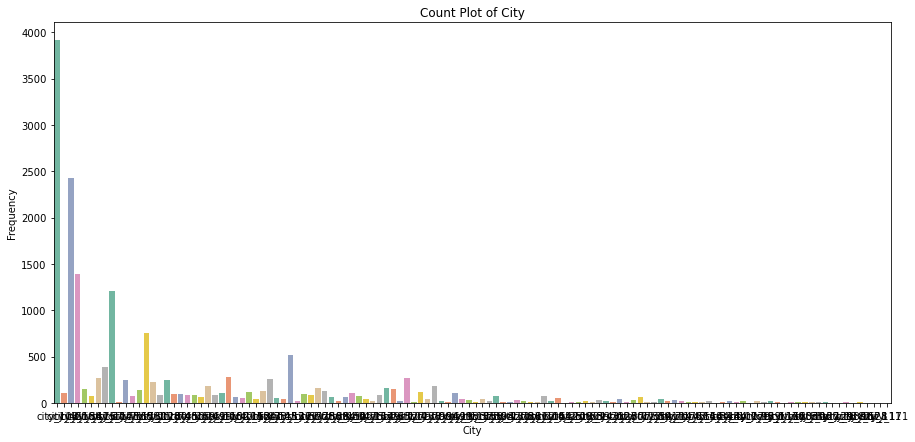

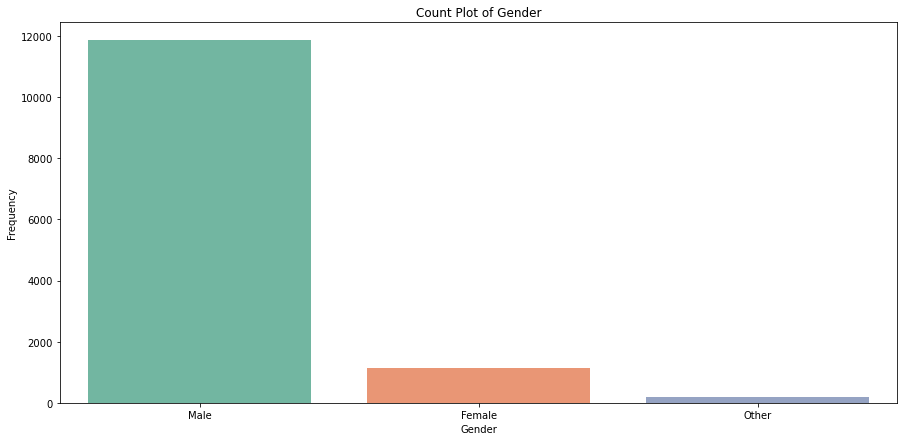

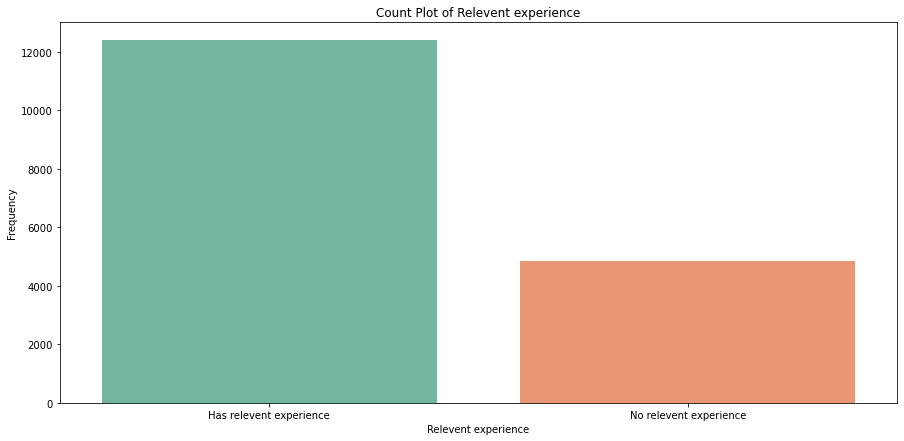

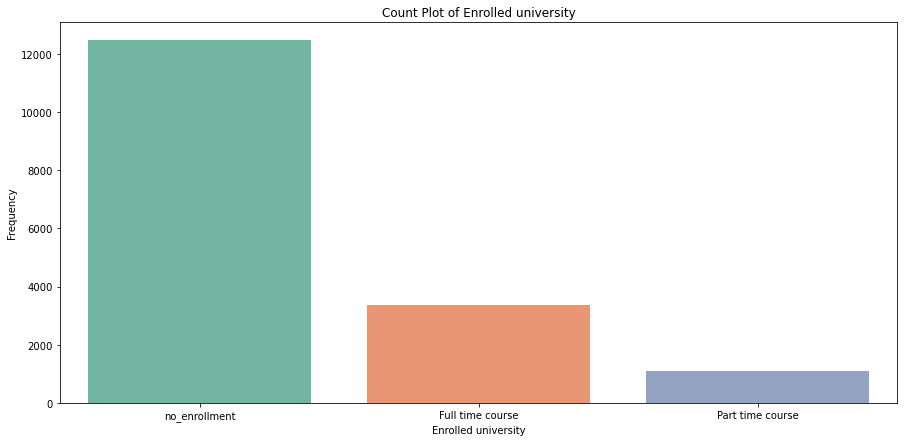

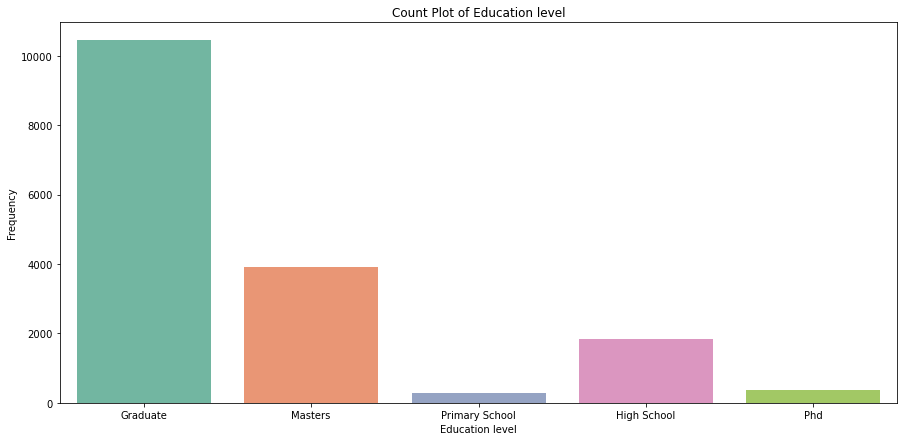

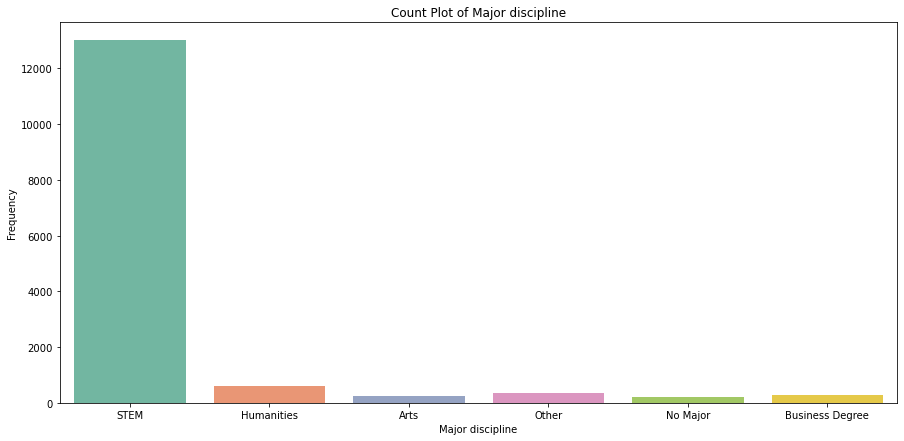

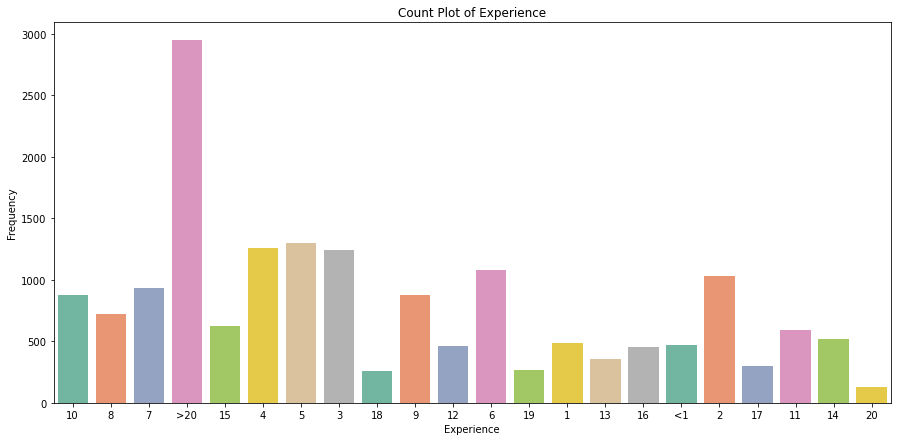

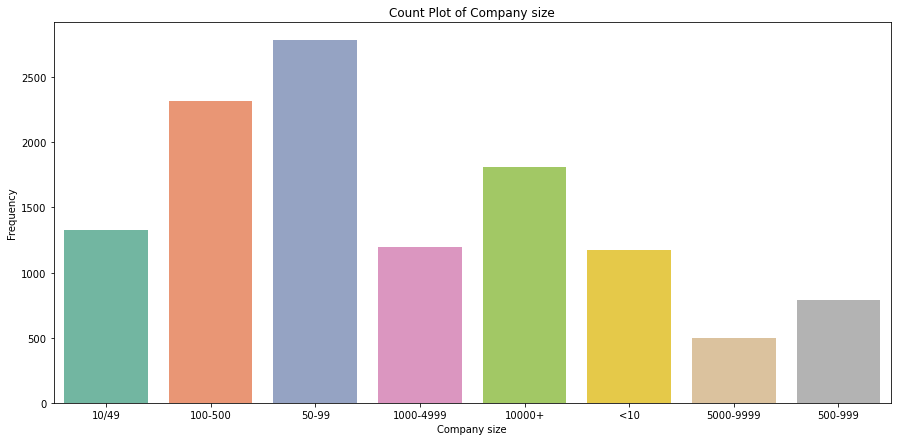

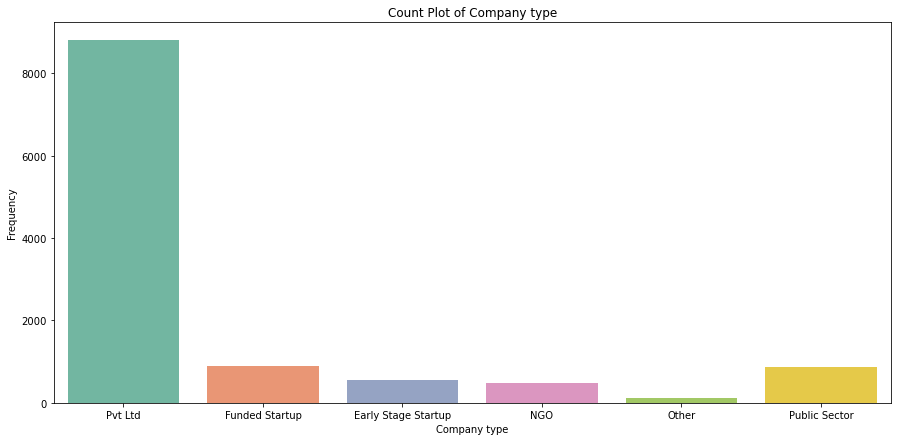

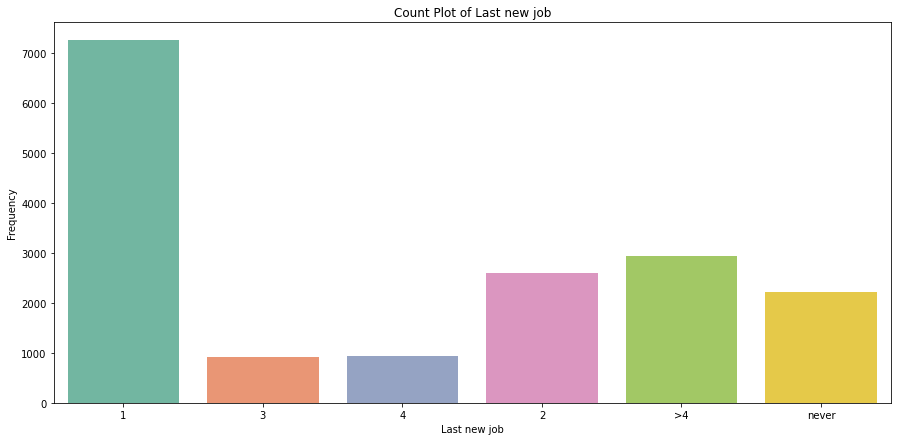

In [10]:
# In a loop, create the count plots for the categorical features

for c in char_col:
    # Figure size
    plt.figure(figsize=(15,7))
    
    # Create the countplot
    sns.countplot(x = c, data = X_train, palette='Set2')
    
    # Axis titles
    plt.title("Count Plot of {}".format(str.capitalize(c.replace("_", " "))))
    plt.ylabel('Frequency')
    plt.xlabel("{}".format(str.capitalize(c.replace("_", " "))))
        
    plt.show()

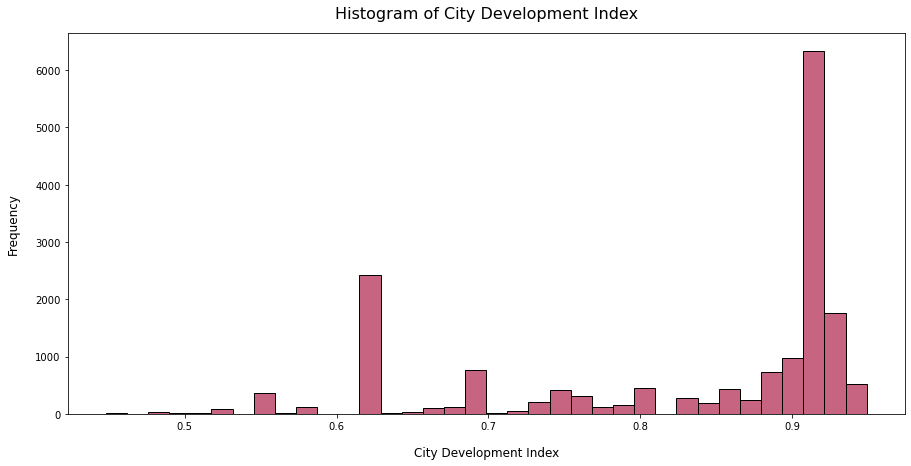

In [11]:
# Histogram for city_development_index
plt.figure(figsize=(15,7))

sns.histplot(data = X_train, x = 'city_development_index', color='#B43058')
plt.title("Histogram of City Development Index", size = 16, pad = 15)
plt.xlabel("City Development Index", size = 12, labelpad = 15)
plt.xticks(fontsize=10)
plt.ylabel("Frequency", size = 12, labelpad = 15)
plt.yticks(fontsize=10)

plt.savefig('hist_city_dev_index.jpeg', dpi = 500, pad_inches = 0.5)
plt.show()

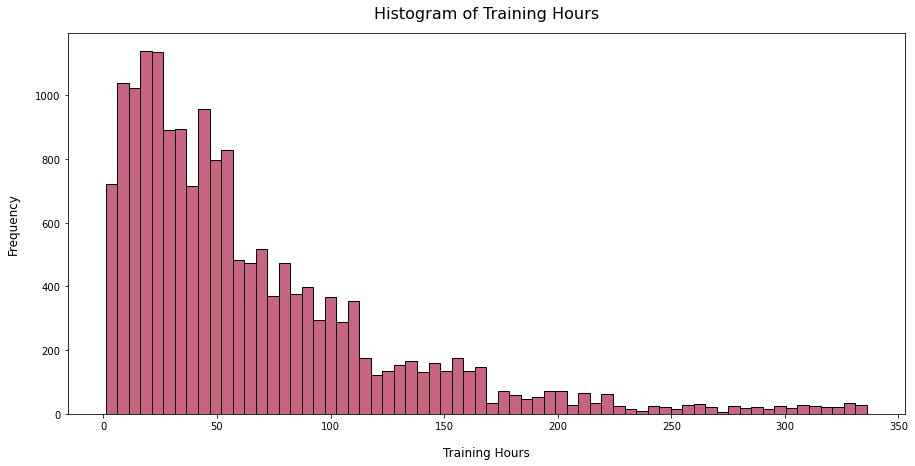

In [12]:
# Histogram for training_hours
plt.figure(figsize=(15,7))

sns.histplot(data = X_train, x = 'training_hours', color='#B43058')

plt.title("Histogram of Training Hours", size = 16, pad = 15)
plt.xlabel("Training Hours", size = 12, labelpad = 15)
plt.xticks(fontsize=10)
plt.ylabel("Frequency", size = 12, labelpad = 15)
plt.yticks(fontsize=10)

plt.savefig('hist_training_hrs.jpeg', dpi = 500)
plt.show()

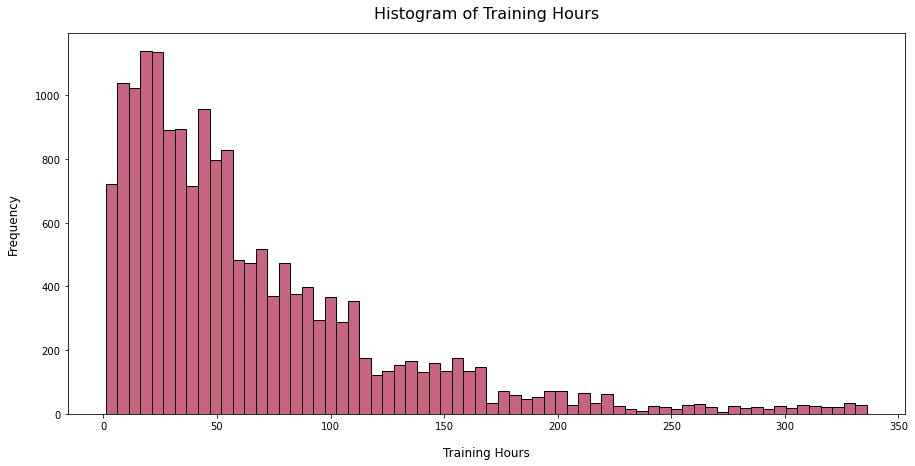

In [13]:
# Histogram for training_hours
plt.figure(figsize=(15,7))

sns.histplot(data = X_train, x = 'training_hours', color='#B43058')
plt.title("Histogram of Training Hours", size = 16, pad = 15)
plt.xlabel("Training Hours", size = 12, labelpad = 15)
plt.xticks(fontsize=10)
plt.ylabel("Frequency", size = 12, labelpad = 15)
plt.yticks(fontsize=10)

plt.savefig('hist_training_hrs.jpeg', dpi = 500)
plt.show()

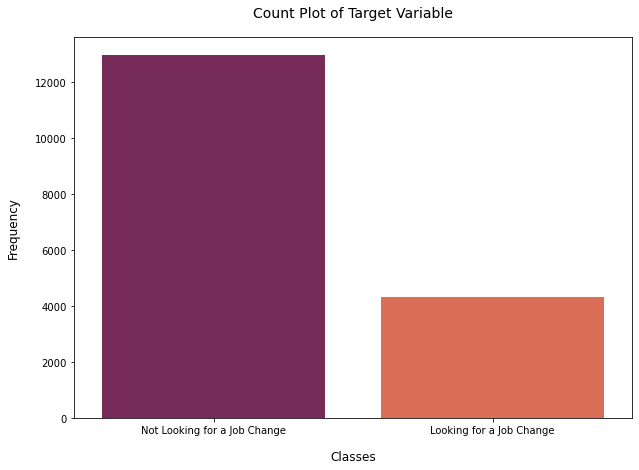

In [14]:
# Count plot of Target
plt.figure(figsize=(10,7))

sns.countplot(x = y_train, palette='rocket')

plt.xlabel('Classes', size = 12, labelpad=15)
plt.ylabel('Frequency', size = 12, labelpad=15)
plt.title("Count Plot of Target Variable", size = 14, pad=20)
plt.xticks(ticks = [0,1], labels = ['Not Looking for a Job Change', 'Looking for a Job Change'])

plt.savefig('target_count_plot.jpeg', dpi = 500)
plt.show()

# Handling Missing Data

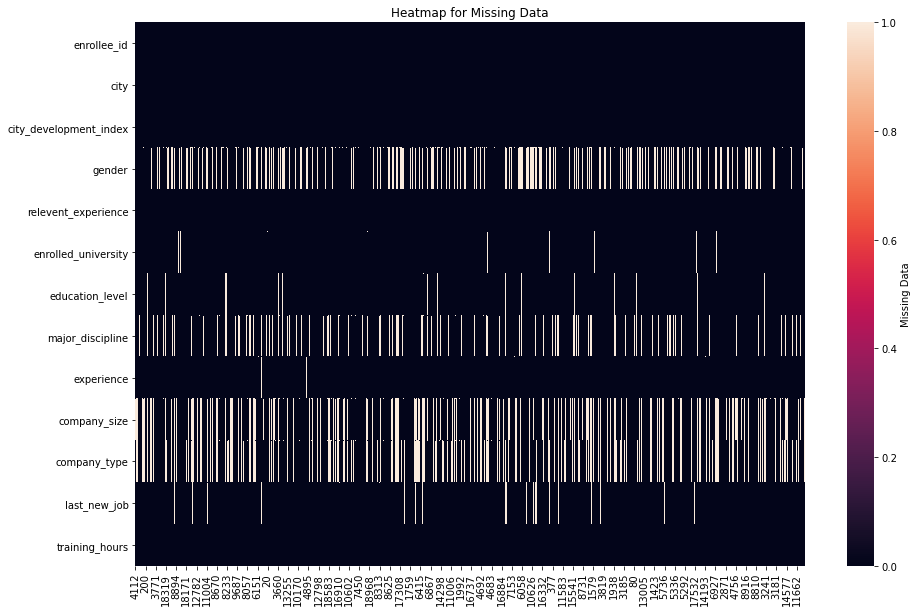

In [15]:
# Heatmap plot to display the features that have missing data. The more "cream" or "white" to more missing data that
# feature has

plt.figure(figsize=(15,10))
plt.title("Heatmap for Missing Data")
sns.heatmap(X_train.isna().transpose(),
            cmap="rocket",
            cbar_kws={'label': 'Missing Data'})
plt.show()

In [16]:
# Create data frame that summarizes the number of missing values per features
missing_cols = pd.DataFrame(X_train.isna().sum()*100/len(X_train))
missing_cols.reset_index(inplace = True)
missing_cols.columns = ['feature', 'percent_missing']
missing_cols.sort_values(by = 'percent_missing', ascending = False, inplace = True)

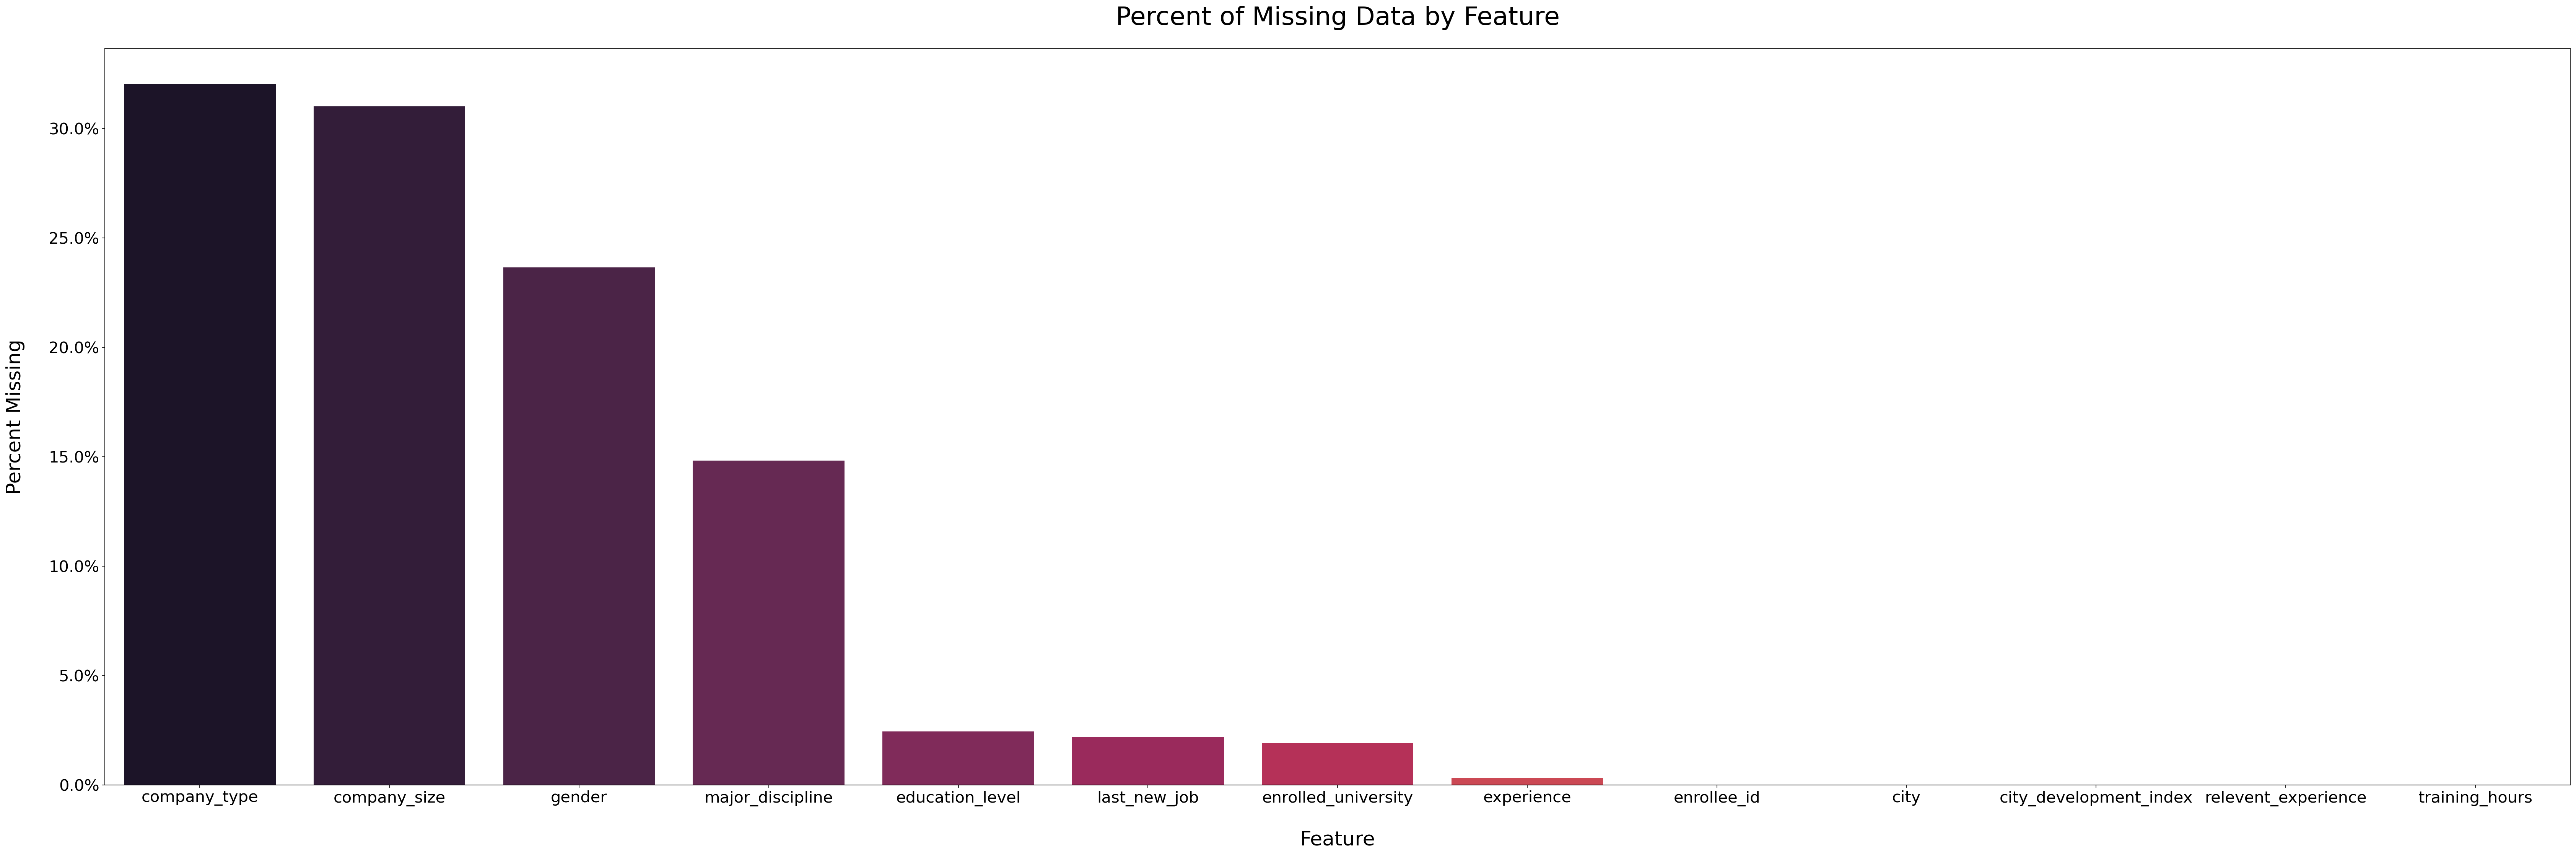

In [17]:
# Create bar plot of feature by percent of missing data - company_type has the most missing data
plt.figure(figsize=(45,15), dpi = 150)
g = sns.barplot(x = 'feature', y = 'percent_missing', data = missing_cols, palette = 'rocket')
g.yaxis.set_major_formatter(PercentFormatter())
plt.title("Percent of Missing Data by Feature", size = 32, pad = 30)

plt.ylabel('Percent Missing', size = 25, labelpad=30)
plt.yticks(fontsize=20)

plt.xlabel("Feature", size = 25, labelpad=30)
plt.xticks(fontsize=20)

plt.tight_layout()
plt.savefig('data_missing_bar_chart.jpeg', dpi = 500, pad_inches = 0.5)
plt.show()

In [18]:
# Since all of the missing values are missing less than 50%, we will just impute using the mode
print("Percent Missing by Feature:\n\n{}".format(round(X_train.isna().sum()*100/len(X_train),1)))

Percent Missing by Feature:

enrollee_id                0.0
city                       0.0
city_development_index     0.0
gender                    23.7
relevent_experience        0.0
enrolled_university        1.9
education_level            2.4
major_discipline          14.8
experience                 0.3
company_size              31.0
company_type              32.0
last_new_job               2.2
training_hours             0.0
dtype: float64


In [19]:
impute_col = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size',
             'company_type', 'last_new_job']

for c in impute_col:
    X_train[c].fillna(X_train[c].mode()[0], inplace=True)
    X_val[c].fillna(X_train[c].mode()[0], inplace=True)
    test[c].fillna(X_train[c].mode()[0], inplace=True)

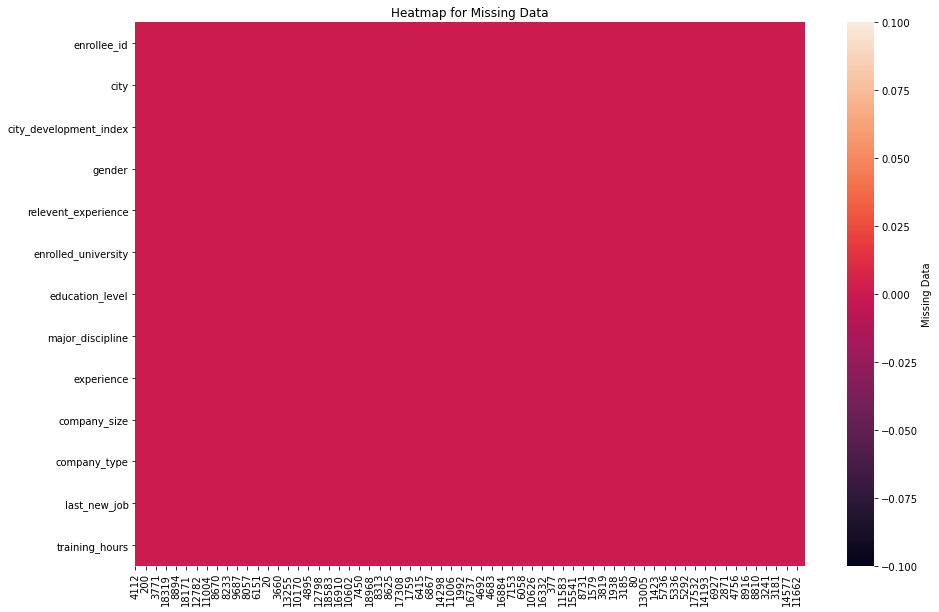

Percent Missing by Feature:

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
dtype: float64


In [20]:
# Check heatmap for missing data - no black with cream/white lines = no missing data
plt.figure(figsize=(15,10))
plt.title("Heatmap for Missing Data")
sns.heatmap(X_train.isna().transpose(),
            cmap="rocket",
            cbar_kws={'label': 'Missing Data'})
plt.show()
print("Percent Missing by Feature:\n\n{}".format(round(X_train.isna().sum()*100/len(X_train),1)))

# Encoding Values as Numeric
In this section, we will be changing character columns into numeric columns. We will also manage any columns with high cardinality.

In [21]:
for c in char_col:
    print("There are {} unique categories for {}.\n".format(len(X_train[c].sort_values().unique()),c))

There are 122 unique categories for city.

There are 3 unique categories for gender.

There are 2 unique categories for relevent_experience.

There are 3 unique categories for enrolled_university.

There are 5 unique categories for education_level.

There are 6 unique categories for major_discipline.

There are 22 unique categories for experience.

There are 8 unique categories for company_size.

There are 6 unique categories for company_type.

There are 6 unique categories for last_new_job.



In [22]:
# Create a list to hold the number of unique values per feature
unique_values = []

for c in char_col:
    uv = len(X_train[c].sort_values().unique())
    unique_values.append(uv)

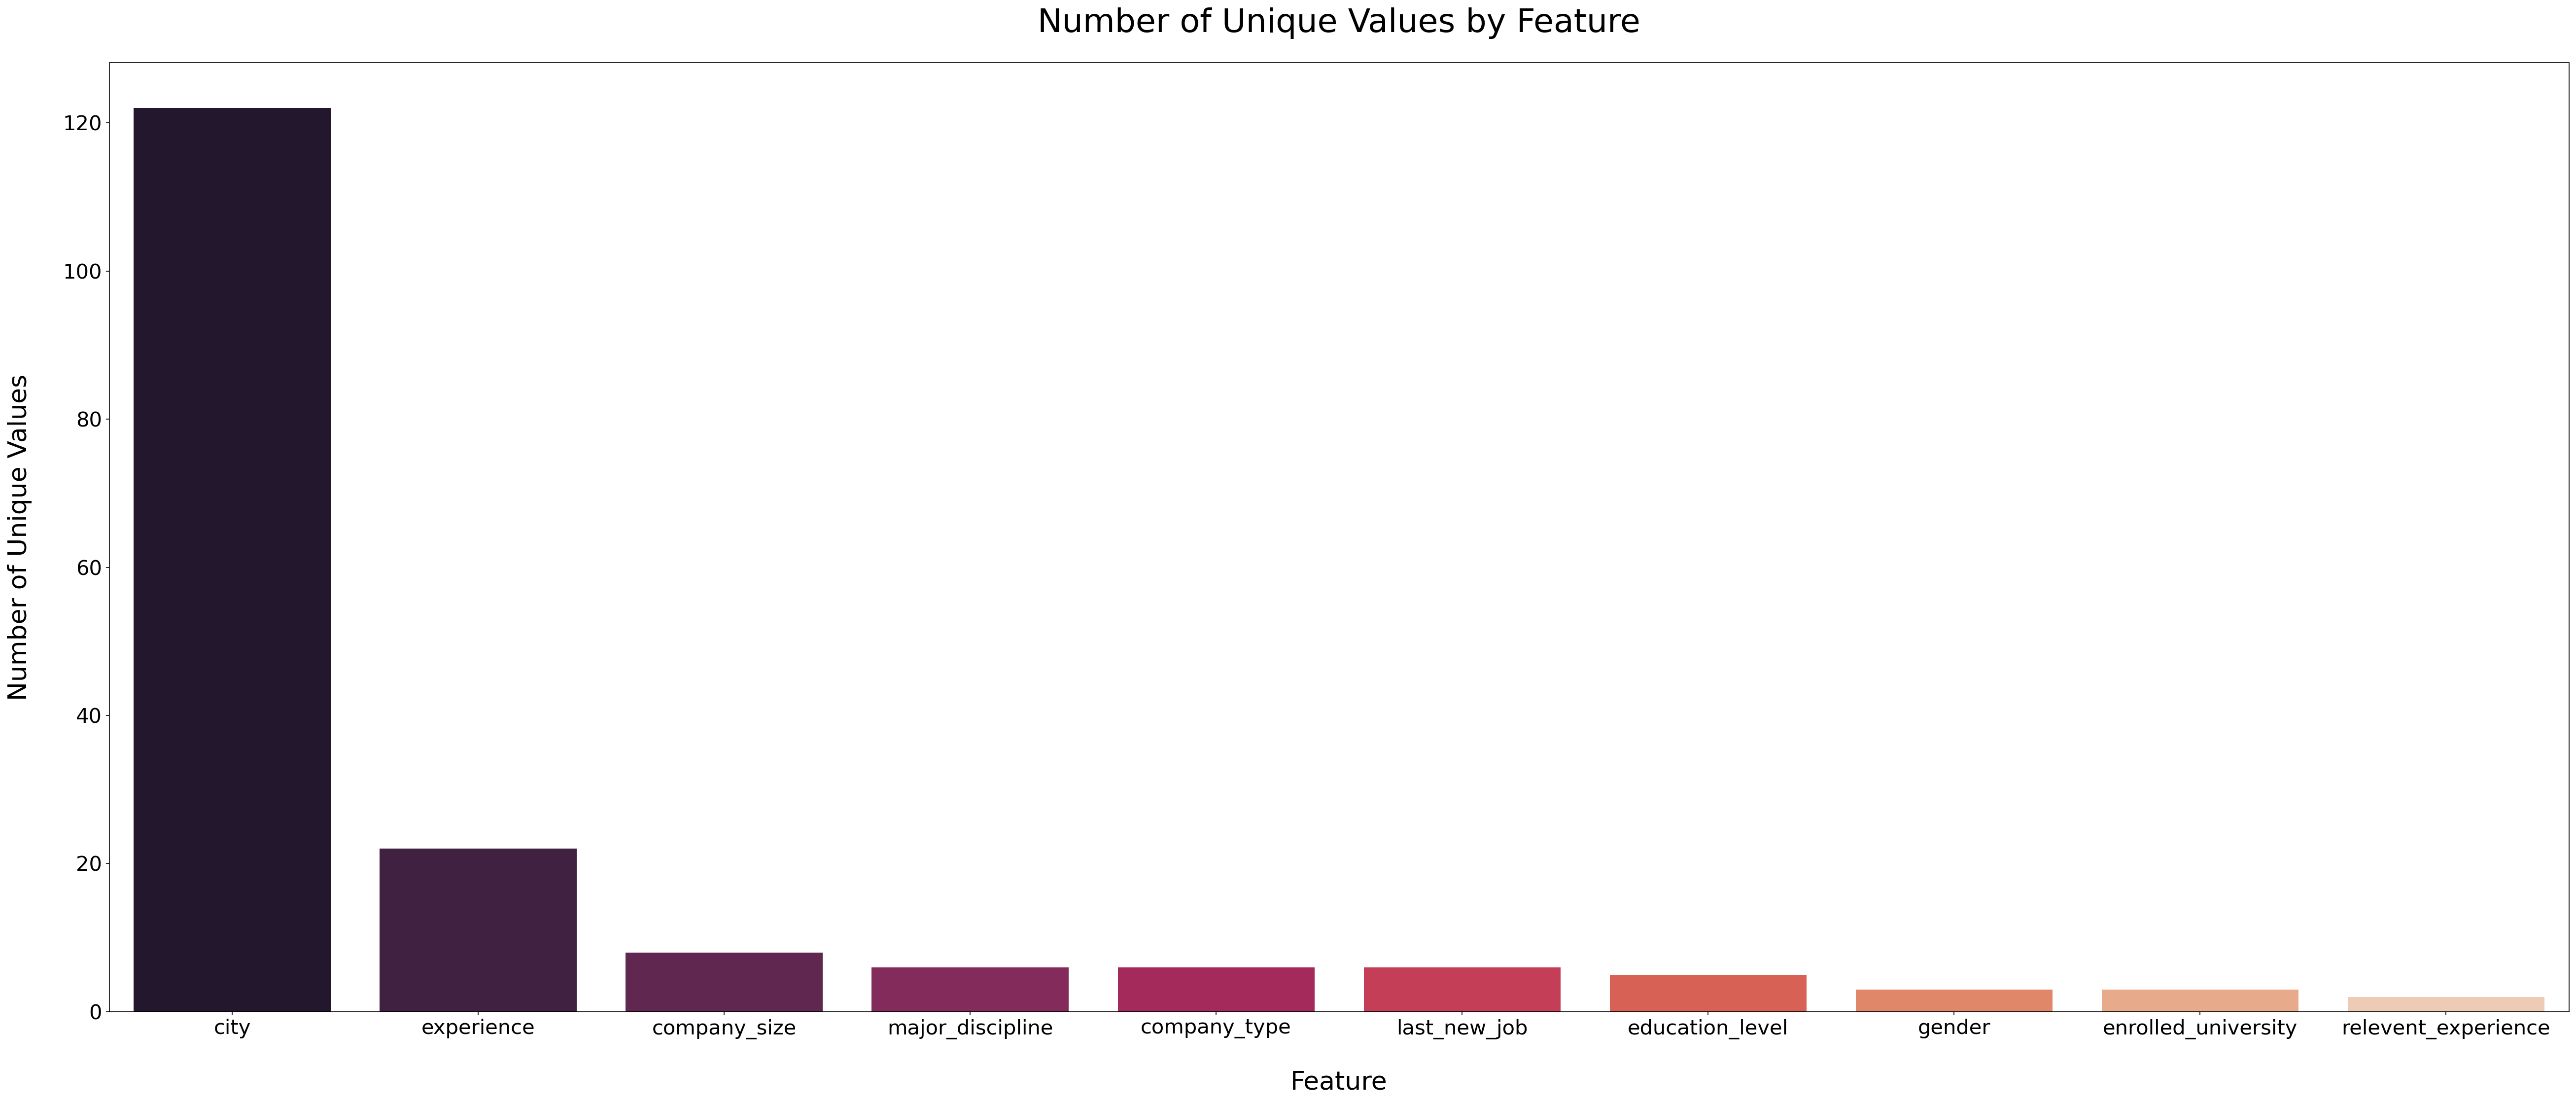

In [23]:
# Bar plot of number of unique values by feature - the city feature has the most unique values 
# compared to the other features
uv_df = pd.DataFrame([char_col, unique_values]).transpose()
uv_df.columns = ['Feature', 'Num_Unique_Val']
uv_df.sort_values(by = 'Num_Unique_Val', ascending = False, inplace = True)

plt.figure(figsize=(35,15), dpi = 150)
g = sns.barplot(x = 'Feature', y = 'Num_Unique_Val', data = uv_df, palette = 'rocket')
plt.title("Number of Unique Values by Feature", size = 32, pad = 30)

plt.ylabel('Number of Unique Values', size = 25, labelpad=30)
plt.yticks(fontsize=20)

plt.xlabel("Feature", size = 25, labelpad=30)
plt.xticks(fontsize=20)

plt.tight_layout()
plt.savefig('data_unique_values.jpeg', dpi = 500, pad_inches = 0.5)
plt.show()

### City: Nominal
Will one-hot encode later

In [24]:
# Let's deal with the high cardinality first. There are two "big" cities, CITY 103 and 21. We will preserve those
# as their own category and then everything else will be placed in "OTHER"
X_train['city'].value_counts().head(2)

def city_card(row):
    if row["city"] == "city_103":
        return "city_103"
    if row["city"] == "city_21":
        return "city_21"
    else:
        return "other"


X_train = X_train.assign(city = X_train.apply(city_card, axis=1))
X_val = X_val.assign(city = X_val.apply(city_card, axis=1))
test = test.assign(city = test.apply(city_card, axis=1))

print(X_train['city'].value_counts())

other       10907
city_103     3911
city_21      2424
Name: city, dtype: int64


### Gender: Nominal
Will one-hot encode

In [25]:
X_train['gender'].value_counts()

Male      15938
Female     1130
Other       174
Name: gender, dtype: int64

### Relevant Experience: Binary

In [26]:
# Will convert to binary
X_train['relevent_experience'].value_counts()

relevant_exp_map = {'No relevent experience': 0, 
          'Has relevent experience': 1}

X_train['relevent_experience'] = X_train['relevent_experience'].map(relevant_exp_map)
X_val['relevent_experience'] = X_val['relevent_experience'].map(relevant_exp_map)
test['relevent_experience'] = test['relevent_experience'].map(relevant_exp_map)

X_train['relevent_experience'].value_counts()

1    12397
0     4845
Name: relevent_experience, dtype: int64

### Enrolled University: Nominal
Will one-hot encode later

In [27]:
X_train['enrolled_university'].value_counts()

no_enrollment       12787
Full time course     3367
Part time course     1088
Name: enrolled_university, dtype: int64

### Education Level: Ordinal

I am assuming that "graduate" and "masters" are the same thing, so I will first combine these two together into one category, "Masters"

In [28]:
# Find the unique values of education level and their counts
X_train['education_level'].value_counts()

Graduate          10860
Masters            3900
High School        1826
Phd                 375
Primary School      281
Name: education_level, dtype: int64

In [29]:
# Combine Graduate and Masters into one category
X_train.loc[(X_train['education_level'] == 'Graduate'), 'education_level'] = "Masters"
X_val.loc[(X_val['education_level'] == 'Graduate'), 'education_level'] = "Masters"
test.loc[(test['education_level'] == 'Graduate'), 'education_level'] = "Masters"

In [30]:
# Make education level ordinal
edu_map = {'Primary School': 0, 
          'High School': 1,
          'Masters': 2,
          'Phd': 3}

X_train['education_level'] = X_train['education_level'].map(edu_map)
X_val['education_level'] = X_val['education_level'].map(edu_map)
test['education_level'] = test['education_level'].map(edu_map)

X_train['education_level'].value_counts()

2    14760
1     1826
3      375
0      281
Name: education_level, dtype: int64

### Major Discipline: Nominal
Will Keep STEM and Humanities their own category and then put everything else into other. Will one-hot encode later.

In [31]:
X_train['major_discipline'].value_counts()

STEM               15560
Humanities           607
Other                352
Business Degree      288
Arts                 232
No Major             203
Name: major_discipline, dtype: int64

In [32]:
def major_card(row):
    if row["major_discipline"] == "STEM":
        return "STEM"
    if row["major_discipline"] == "Humanities":
        return "Humanities"
    else:
        return "Other"


X_train = X_train.assign(major_discipline = X_train.apply(major_card, axis=1))
X_val = X_val.assign(major_discipline = X_val.apply(major_card, axis=1))
test = test.assign(major_discipline = test.apply(major_card, axis=1))

print(X_train['major_discipline'].value_counts())

STEM          15560
Other          1075
Humanities      607
Name: major_discipline, dtype: int64


### Experience: Turn into Numerical

In [33]:
X_train['experience'].value_counts()

>20    3004
5      1298
4      1261
3      1243
6      1076
2      1029
7       932
9       880
10      873
8       723
15      624
11      590
14      520
1       483
<1      473
12      461
16      457
13      357
17      298
19      269
18      259
20      132
Name: experience, dtype: int64

In [34]:
# Make experience level numerical
exp_lvl_map = {'<1': 0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8,
               '9':9, '10':10, '11':11, '12':12, '13':13, '14':14, '15':15, '16':16,
               '17':17, '18':18, '19':19, '20': 20, '>20': 21}

X_train['experience'] = X_train['experience'].map(exp_lvl_map)
X_val['experience'] = X_val['experience'].map(exp_lvl_map)
test['experience'] = test['experience'].map(exp_lvl_map)

X_train['experience'].value_counts()

21    3004
5     1298
4     1261
3     1243
6     1076
2     1029
7      932
9      880
10     873
8      723
15     624
11     590
14     520
1      483
0      473
12     461
16     457
13     357
17     298
19     269
18     259
20     132
Name: experience, dtype: int64

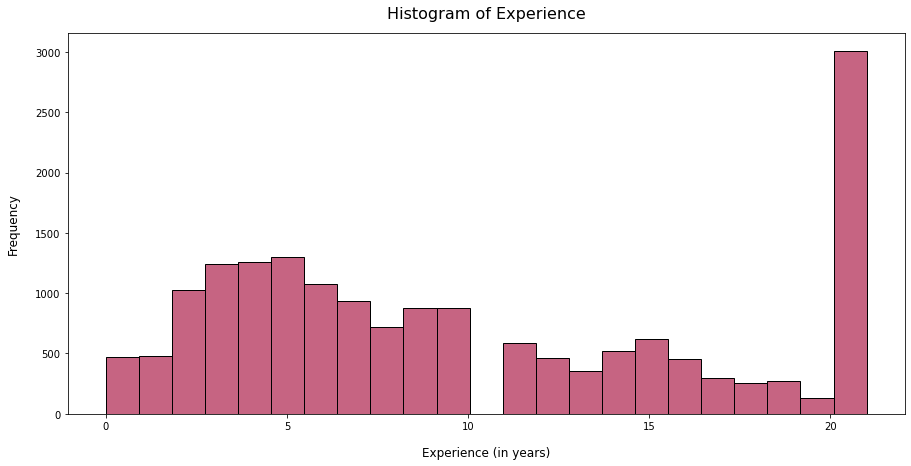

In [35]:
# Histogram for experience
plt.figure(figsize=(15,7))

sns.histplot(data = X_train, x = 'experience', color='#B43058')

plt.title("Histogram of Experience", size = 16, pad = 15)
plt.xlabel("Experience (in years)", size = 12, labelpad = 15)
plt.xticks(fontsize=10)
plt.ylabel("Frequency", size = 12, labelpad = 15)
plt.yticks(fontsize=10)

plt.savefig('hist_experience_yrs.jpeg', dpi = 500)
plt.show()

### Company Size: Nominal
Will group and then one-hot encode later

In [36]:
# Obtain the counts of company size
X_train['company_size'].value_counts()

50-99        8130
100-500      2317
10000+       1810
10/49        1326
1000-4999    1198
<10          1172
500-999       793
5000-9999     496
Name: company_size, dtype: int64

In [37]:
# Create a data frame to hold the company size values and their counts
org_counts_comp_sze = pd.DataFrame(X_train['company_size'].value_counts()).reset_index()
org_counts_comp_sze.columns = ['company_size', 'frequency']

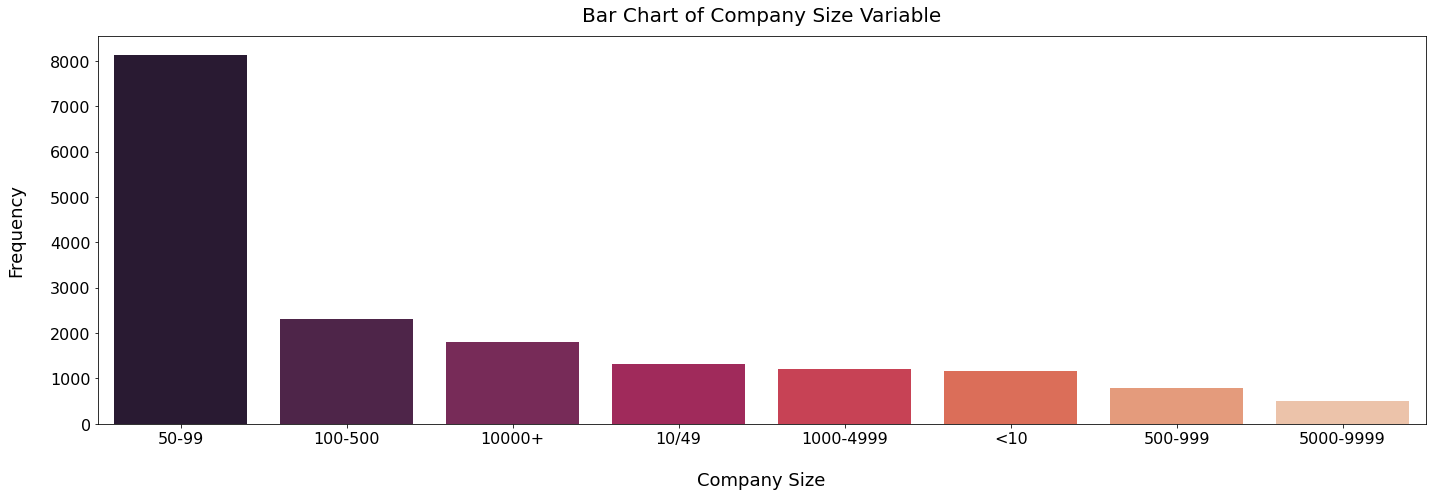

In [38]:
# Create a bar plot of company size variable before reducing the number of values
plt.figure(figsize=(20,7))

sns.barplot(x = 'company_size', y = 'frequency', data = org_counts_comp_sze, palette='rocket')

plt.title('Bar Chart of Company Size Variable', pad = 15, size = 20)
plt.ylabel('Frequency', labelpad = 25, size = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Company Size', labelpad = 25, size = 18)
plt.xticks(fontsize = 16)
plt.tight_layout()

plt.savefig('original_company_size_bchart.jpeg', dpi = 500, pad_inches = 0.5)
plt.show()

In [39]:
# Reduce high cardinality of company size by keeping "50-99" and "100-500" their own categories and then putting everything
# else into other
def comp_size_card(row):
    if row["company_size"] == "50-99":
        return "50-99"
    if row["company_size"] == "100-500":
        return "100-500"
    else:
        return "Other"


X_train = X_train.assign(company_size = X_train.apply(comp_size_card, axis=1))
X_val = X_val.assign(company_size = X_val.apply(comp_size_card, axis=1))
test = test.assign(company_size = test.apply(comp_size_card, axis=1))

print(X_train['company_size'].value_counts())

50-99      8130
Other      6795
100-500    2317
Name: company_size, dtype: int64


In [1467]:
# Create a new data frame with the company size variable with reduced cardinality
new_counts_comp_sze = pd.DataFrame(X_train['company_size'].value_counts()).reset_index()
new_counts_comp_sze.columns = ['company_size', 'frequency']

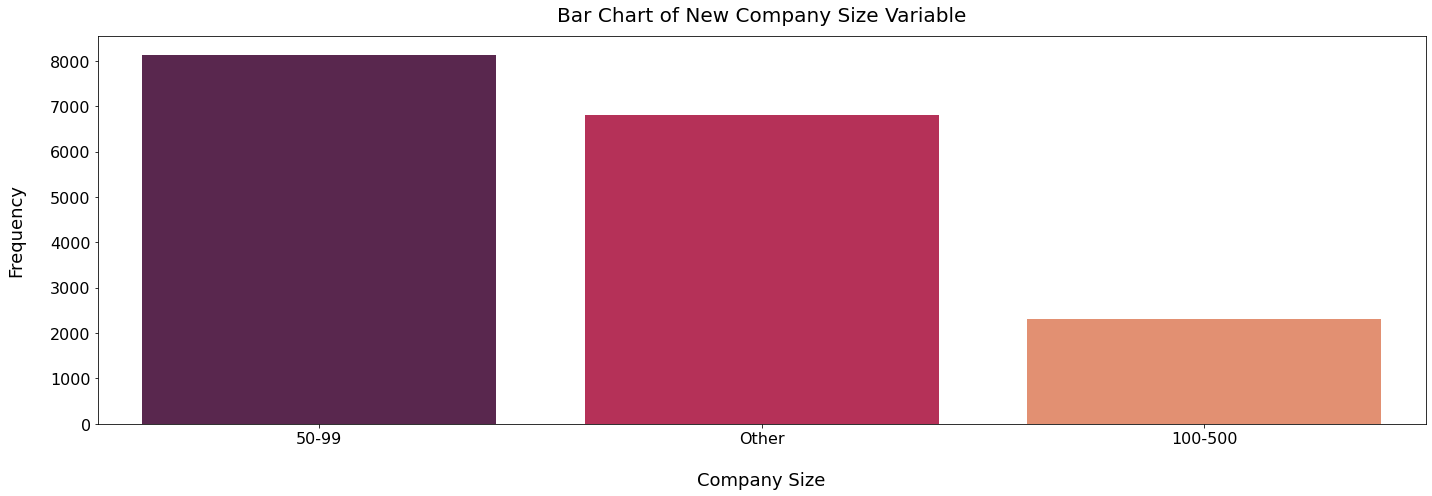

In [1468]:
# Plot the company size variable with reduced cardinality
plt.figure(figsize=(20,7))
sns.barplot(x = 'company_size', y = 'frequency', data = new_counts_comp_sze, palette='rocket')
plt.title('Bar Chart of New Company Size Variable', pad = 15, size = 20)
plt.ylabel('Frequency', labelpad = 25, size = 18)
plt.yticks(fontsize = 16)
plt.xlabel('Company Size', labelpad = 25, size = 18)
plt.xticks(fontsize = 16)
plt.tight_layout()
plt.savefig('new_company_size_bchart.jpeg', dpi = 500, pad_inches = 0.5)
plt.show()

### Company Type: Nominal
Will one-hot encode, there aren't too many categories.

In [1469]:
X_train['company_type'].value_counts().head()

Pvt Ltd                14329
Funded Startup           903
Public Sector            871
Early Stage Startup      556
NGO                      472
Name: company_type, dtype: int64

### Last New Job: Ordinal

In [1471]:
X_train['last_new_job'].value_counts()

1        7642
>4       2942
2        2595
never    2211
4         933
3         919
Name: last_new_job, dtype: int64

In [1472]:
# Make last new job ordinal
last_new_job_map = {'never': 0, '1': 1, '2':2, '3':3, '4': 4, '>4':5}

X_train['last_new_job'] = X_train['last_new_job'].map(last_new_job_map)
X_val['last_new_job'] = X_val['last_new_job'].map(last_new_job_map)
test['last_new_job'] = test['last_new_job'].map(last_new_job_map)

X_train['last_new_job'].value_counts()

1    7642
5    2942
2    2595
0    2211
4     933
3     919
Name: last_new_job, dtype: int64

# Handling Outliers

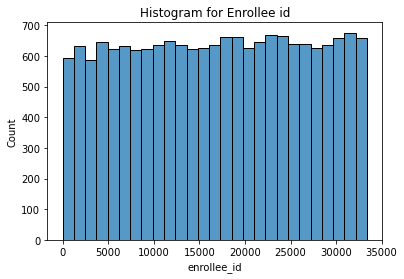

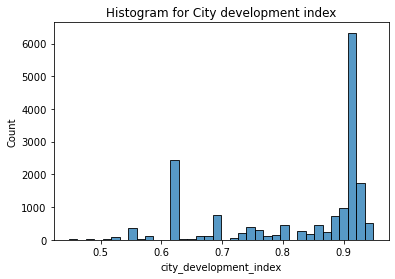

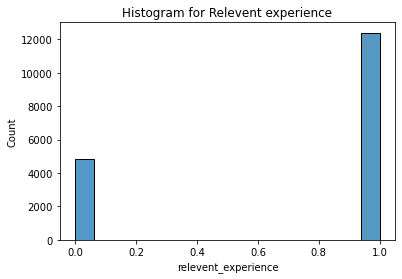

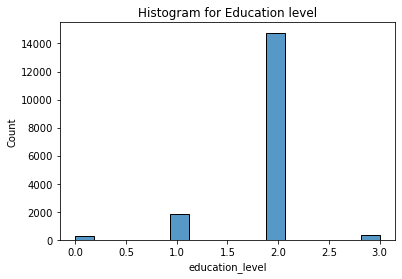

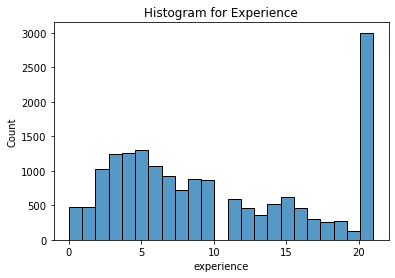

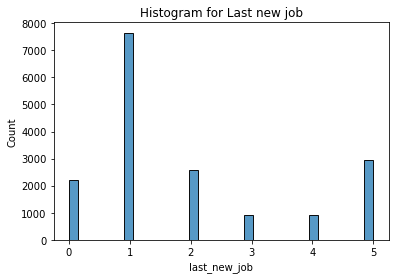

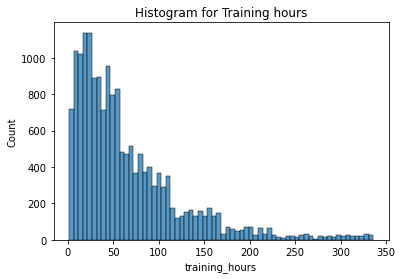

In [1473]:
# Identify the numeric variables
numerics = ['int16', 'int32', 'int64', 'float64']
num_col = X_train.select_dtypes(include=numerics)

# Create a histogram for each numerical variable to help identify outliers
for n in num_col:
    sns.histplot(x = n, data = X_train)
    plt.title("Histogram for {}".format(str.capitalize(n.replace("_", " "))))
    plt.show()

## Experience

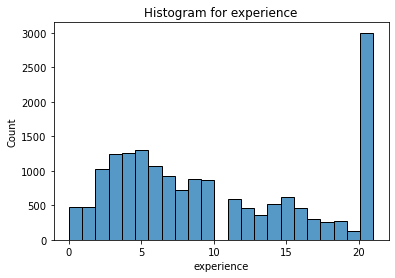

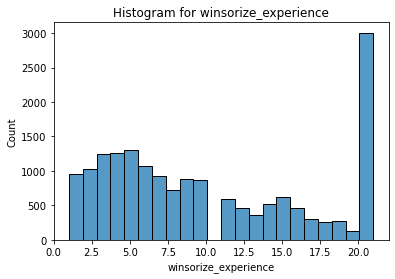

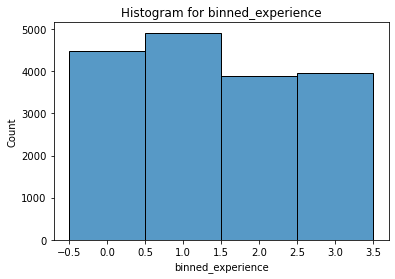

In [1475]:
# Winsorize City Development Index to the 5th and 95th percentile and bin
X_train['winsorize_experience'] = winsorize(X_train['experience'], limits = [0.05, 0.05])
X_train['binned_experience'] = pd.qcut(X_train['experience'], q=4, labels=[0, 1, 2, 3])

X_val['winsorize_experience'] = winsorize(X_val['experience'], limits = [0.05, 0.05])
X_val['binned_experience'] = pd.qcut(X_val['experience'], q=4, labels=[0, 1, 2, 3])

test['winsorize_experience'] = winsorize(test['experience'], limits = [0.05, 0.05])
test['binned_experience'] = pd.qcut(test['experience'], q=4, labels=[0, 1, 2, 3])

col = ['experience', 'winsorize_experience', 'binned_experience']
for c in col:
    sns.histplot(x = c, data = X_train)
    plt.title('Histogram for {}'.format(c))
    plt.show()

## City Development Index

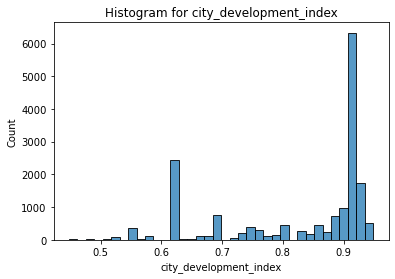

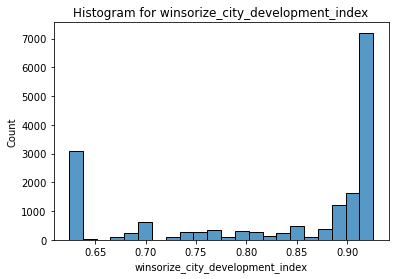

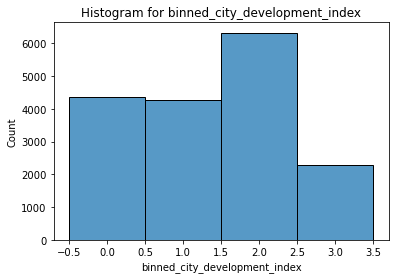

In [1476]:
# Winsorize City Development Index to the 5th and 95th percentile and binning
X_train['winsorize_city_development_index'] = winsorize(X_train['city_development_index'], limits = [0.05, 0.05])
X_train['binned_city_development_index'] = pd.qcut(X_train['city_development_index'], q=4, labels=[0, 1, 2, 3])

X_val['winsorize_city_development_index'] = winsorize(X_val['city_development_index'], limits = [0.05, 0.05])
X_val['binned_city_development_index'] = pd.qcut(X_val['city_development_index'], q=4, labels=[0, 1, 2, 3])

test['winsorize_city_development_index'] = winsorize(test['city_development_index'], limits = [0.05, 0.05])
test['binned_city_development_index'] = pd.qcut(test['city_development_index'], q=4, labels=[0, 1, 2, 3])

col = ['city_development_index', 'winsorize_city_development_index', 'binned_city_development_index']
for c in col:
    sns.histplot(x = c, data = X_train)
    plt.title('Histogram for {}'.format(c))
    plt.show()

## Training Hours

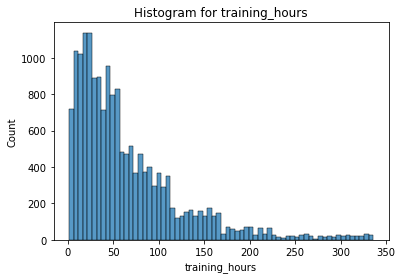

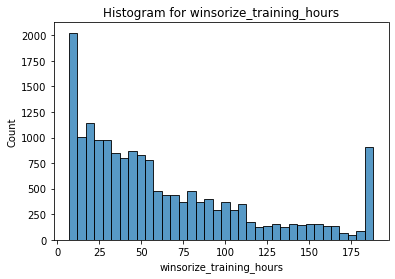

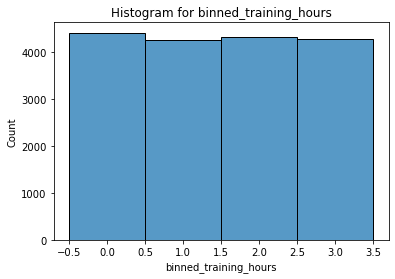

In [1477]:
# Winsorize Training to the 5th and 95th percentile and bin
X_train['winsorize_training_hours'] = winsorize(X_train['training_hours'], limits = [0.05, 0.05])
X_train['binned_training_hours'] = pd.qcut(X_train['training_hours'], q=4, labels=[0, 1, 2, 3])

X_val['winsorize_training_hours'] = winsorize(X_val['training_hours'], limits = [0.05, 0.05])
X_val['binned_training_hours'] = pd.qcut(X_val['training_hours'], q=4, labels=[0, 1, 2, 3])

test['winsorize_training_hours'] = winsorize(test['training_hours'], limits = [0.05, 0.05])
test['binned_training_hours'] = pd.qcut(test['training_hours'], q=4, labels=[0, 1, 2, 3])

col = ['training_hours', 'winsorize_training_hours', 'binned_training_hours']
for c in col:
    sns.histplot(x = c, data = X_train)
    plt.title('Histogram for {}'.format(c))
    plt.show()

In [1481]:
# Drop the original numeric columns that were winsorized and enrolleeID
drop_col = ['city_development_index', 'experience', 'training_hours', 'enrollee_id']
X_train.drop(drop_col, axis = 1, inplace = True)
X_val.drop(drop_col, axis = 1, inplace = True)
test.drop(drop_col, axis = 1, inplace = True)

# Feature Engineering

## Check Relationship with Independent Variables

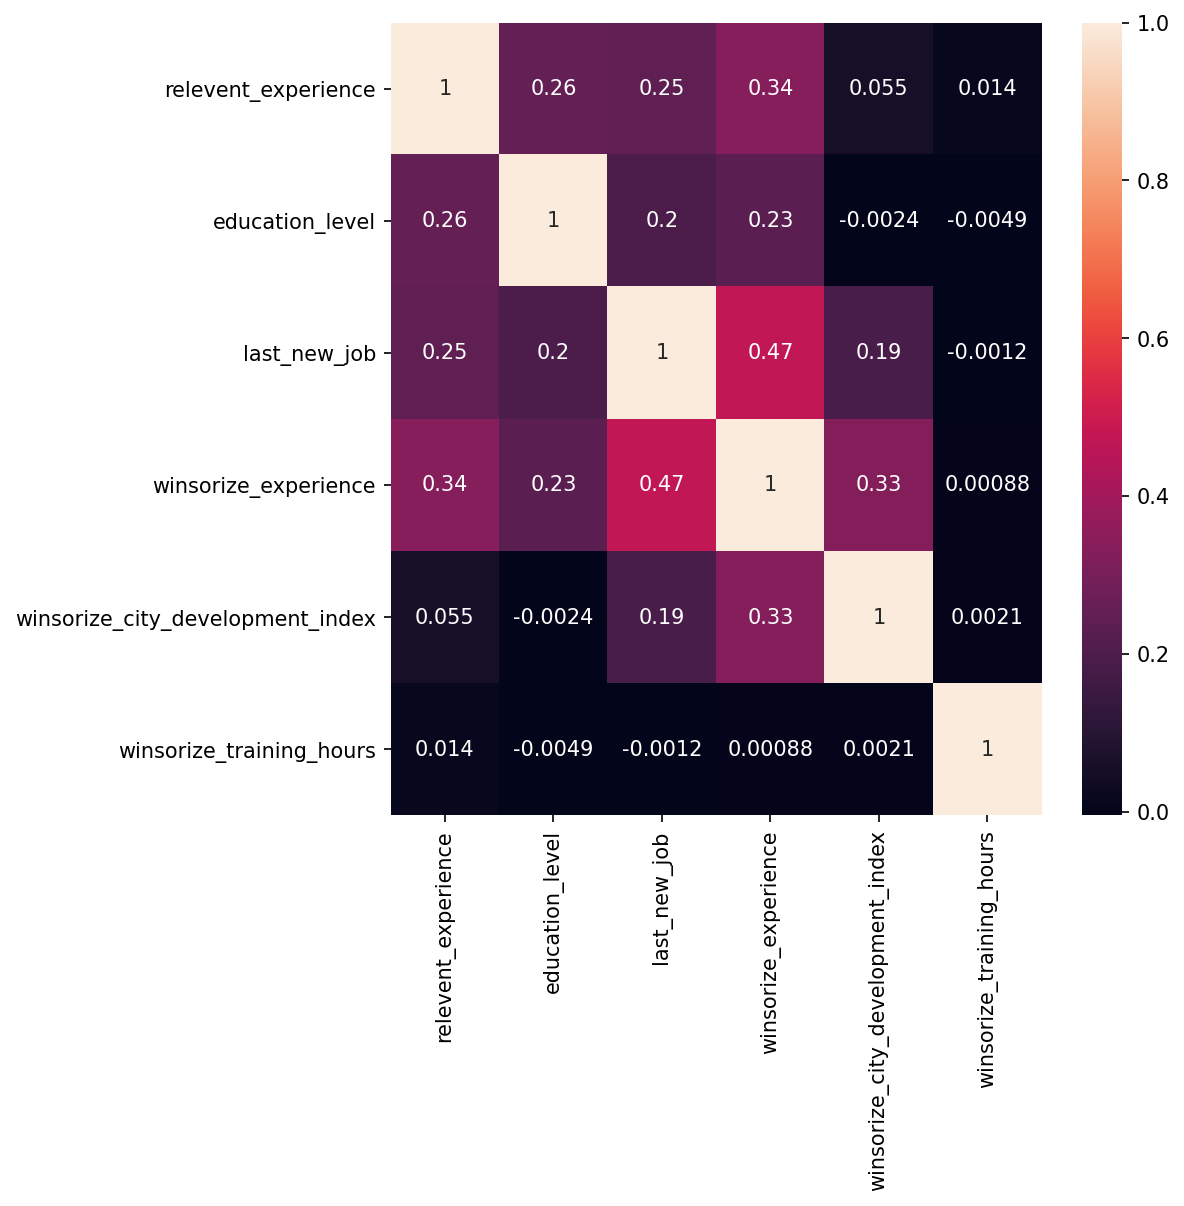

In [1482]:
corr_matrix = X_train.corr()
plt.figure(figsize = (7,7), dpi = 150)
ax = sns.heatmap(corr_matrix, annot = True)
plt.savefig('corr_matrix.jpeg', dpi = 500)
plt.show()

## Interactions Based on Correlation Matrix

In [1483]:
# Interaction between Experience and Relevant Experience
X_train['experience_rel_exp_int'] = X_train['winsorize_experience']*X_train['relevent_experience']
X_val['experience_rel_exp_int'] = X_val['winsorize_experience']*X_val['relevent_experience']
test['experience_rel_exp_int'] = test['winsorize_experience']*test['relevent_experience']

# Interaction between Experience and Last New Job
X_train['experience_last_new_job_int'] = X_train['winsorize_experience']*X_train['last_new_job']
X_val['experience_last_new_job_int'] = X_val['winsorize_experience']*X_val['last_new_job']
test['experience_last_new_job_int'] = test['winsorize_experience']*test['last_new_job']

# Interaction between Experience and City Development Index - was created below

## Training Hours
Employees who receive more training may be more likely to stay at a company than employees who receive less training.
https://www.cnbc.com/2019/02/27/94percent-of-employees-would-stay-at-a-company-for-this-one-reason.html

In [1484]:
# Percentile of Training Hours by Employee
X_train['training_hours_pct'] = X_train['winsorize_training_hours'].rank(pct=True)
X_val['training_hours_pct'] = X_val['winsorize_training_hours'].rank(pct=True)
test['training_hours_pct'] = test['winsorize_training_hours'].rank(pct=True)

In [1485]:
# Rank employees by their training hours
X_train['training_hours_rank'] = X_train['winsorize_training_hours'].rank(method = 'max')
X_val['training_hours_rank'] = X_val['winsorize_training_hours'].rank(method = 'max')
test['training_hours_rank'] = test['winsorize_training_hours'].rank(method = 'max')

In [1486]:
# Binned training hours (either average, below average, or above average)
t_hr_mean = round(X_train['winsorize_training_hours'].mean(),0)

X_train.loc[(X_train['winsorize_training_hours'] == t_hr_mean), "training_hours_cat"] = "Average_Training_Hrs"
X_train.loc[(X_train['winsorize_training_hours'] > t_hr_mean), "training_hours_cat"] = "Above_Avg_Training_Hrs"
X_train.loc[(X_train['winsorize_training_hours'] < t_hr_mean), "training_hours_cat"] = "Below_Avg_TraningHrs"

X_val.loc[(X_val['winsorize_training_hours'] == t_hr_mean), "training_hours_cat"] = "Average_Training_Hrs"
X_val.loc[(X_val['winsorize_training_hours'] > t_hr_mean), "training_hours_cat"] = "Above_Avg_Training_Hrs"
X_val.loc[(X_val['winsorize_training_hours'] < t_hr_mean), "training_hours_cat"] = "Below_Avg_TraningHrs"

test.loc[(test['winsorize_training_hours'] == t_hr_mean), "training_hours_cat"] = "Average_Training_Hrs"
test.loc[(test['winsorize_training_hours'] > t_hr_mean), "training_hours_cat"] = "Above_Avg_Training_Hrs"
test.loc[(test['winsorize_training_hours'] < t_hr_mean), "training_hours_cat"] = "Below_Avg_TraningHrs"

In [1488]:
# Interaction between Training Hours and Experience
X_train['int_train_hrs_exp'] = X_train['winsorize_training_hours']*X_train['winsorize_experience']
X_val['int_train_hrs_exp'] = X_val['winsorize_training_hours']*X_val['winsorize_experience']
test['int_train_hrs_exp'] = test['winsorize_training_hours']*test['winsorize_experience']

# Interaction between Training Hours and City Development Index
X_train['int_train_hrs_city_dev_idx'] = X_train['winsorize_training_hours']*X_train['winsorize_city_development_index']
X_val['int_train_hrs_city_dev_idx'] = X_val['winsorize_training_hours']*X_val['winsorize_city_development_index']
test['int_train_hrs_city_dev_idx'] = test['winsorize_training_hours']*test['winsorize_city_development_index']

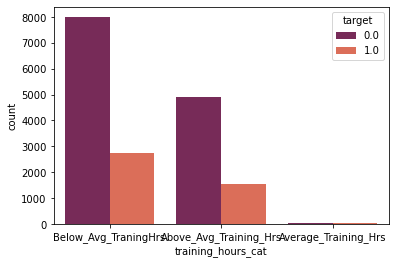

In [1489]:
# Count plot of new training hours categorized variable
sns.countplot(x = 'training_hours_cat', hue = y_train, data = X_train, palette='rocket')
plt.show()

## Experience

In [1492]:
# Binned experience (either average, below average, or above average)
exp_mean = round(X_train['winsorize_experience'].mean(),0)

X_train.loc[(X_train['winsorize_experience'] == exp_mean), "experience_cat"] = "Average_Experience"
X_train.loc[(X_train['winsorize_experience'] > exp_mean), "experience_cat"] = "Above_Avg_Experience"
X_train.loc[(X_train['winsorize_experience'] < exp_mean), "experience_cat"] = "Below_Avg_Experience"

X_val.loc[(X_val['winsorize_experience'] == exp_mean), "experience_cat"] = "Average_Experience"
X_val.loc[(X_val['winsorize_experience'] > exp_mean), "experience_cat"] = "Above_Avg_Experience"
X_val.loc[(X_val['winsorize_experience'] < exp_mean), "experience_cat"] = "Below_Avg_Experience"

test.loc[(test['winsorize_experience'] == exp_mean), "experience_cat"] = "Average_Training_Hrs"
test.loc[(test['winsorize_experience'] > exp_mean), "experience_cat"] = "Above_Avg_Experience"
test.loc[(test['winsorize_experience'] < exp_mean), "experience_cat"] = "Below_Avg_Experience"

In [1493]:
# Percentile of Experience by Employee
X_train['experience_pct'] = X_train['winsorize_experience'].rank(pct=True)
X_val['experience_pct'] = X_val['winsorize_experience'].rank(pct=True)
test['experience_pct'] = test['winsorize_experience'].rank(pct=True)

In [1494]:
# Interaction between Experience and City Development Index
X_train['int_experience_city_dev_idx'] = X_train['winsorize_experience']*X_train['winsorize_city_development_index']
X_val['int_experience_city_dev_idx'] = X_val['winsorize_experience']*X_val['winsorize_city_development_index']
test['int_experience_city_dev_idx'] = test['winsorize_experience']*test['winsorize_city_development_index']

## City

In [1495]:
# Concatenate City with other categorical variables
X_train['city_gender_concat'] = X_train['city'] + '_' + X_train['gender']
X_val['city_gender_concat'] = X_val['city'] + '_' + X_val['gender']
test['city_gender_concat'] = test['city'] + '_' + test['gender']

X_train['city_enrolled_university_concat'] = X_train['city'] + '_' + X_train['enrolled_university']
X_val['city_enrolled_university_concat'] = X_val['city'] + '_' + X_val['enrolled_university']
test['city_enrolled_university_concat'] = test['city'] + '_' + test['enrolled_university']

X_train['city_major_discipline_concat'] = X_train['city'] + '_' + X_train['major_discipline']
X_val['city_major_discipline_concat'] = X_val['city'] + '_' + X_val['major_discipline']
test['city_major_discipline_concat'] = test['city'] + '_' + test['major_discipline']

X_train['city_company_size_concat'] = X_train['city'] + '_' + X_train['company_size']
X_val['city_company_size_concat'] = X_val['city'] + '_' + X_val['company_size']
test['city_company_size_concat'] = test['city'] + '_' + test['company_size']

X_train['city_company_type_concat'] = X_train['city'] + '_' + X_train['company_type']
X_val['city_company_type_concat'] = X_val['city'] + '_' + X_val['company_type']
test['city_company_type_concat'] = test['city'] + '_' + test['company_type']

## Gender

In [1496]:
# Concat Gender with other categorical columns
X_train['gender_enrolled_university_concat'] = X_train['gender'] + '_' + X_train['enrolled_university']
X_val['gender_enrolled_university_concat'] = X_val['gender'] + '_' + X_val['enrolled_university']
test['gender_enrolled_university_concat'] = test['gender'] + '_' + test['enrolled_university']

X_train['gender_major_discipline_concat'] = X_train['gender'] + '_' + X_train['major_discipline']
X_val['gender_major_discipline_concat'] = X_val['gender'] + '_' + X_val['major_discipline']
test['gender_major_discipline_concat'] = test['gender'] + '_' + test['major_discipline']

X_train['gender_company_size_concat'] = X_train['gender'] + '_' + X_train['company_size']
X_val['gender_company_size_concat'] = X_val['gender'] + '_' + X_val['company_size']
test['gender_company_size_concat'] = test['gender'] + '_' + test['company_size']

X_train['gender_company_type_concat'] = X_train['gender'] + '_' + X_train['company_type']
X_val['gender_company_type_concat'] = X_val['gender'] + '_' + X_val['company_type']
test['gender_company_type_concat'] = test['gender'] + '_' + test['company_type']

## Enrolled University

In [1497]:
X_train['enrolled_university_major_discipline_concat'] = X_train['enrolled_university'] + '_' + X_train['major_discipline']
X_val['enrolled_university_major_discipline_concat'] = X_val['enrolled_university'] + '_' + X_val['major_discipline']
test['enrolled_university_major_discipline_concat'] = test['enrolled_university'] + '_' + test['major_discipline']

X_train['enrolled_university_company_size_concat'] = X_train['enrolled_university'] + '_' + X_train['company_size']
X_val['enrolled_university_company_size_concat'] = X_val['enrolled_university'] + '_' + X_val['company_size']
test['enrolled_university_company_size_concat'] = test['enrolled_university'] + '_' + test['company_size']

X_train['enrolled_university_company_type_concat'] = X_train['enrolled_university'] + '_' + X_train['company_type']
X_val['enrolled_university_company_type_concat'] = X_val['enrolled_university'] + '_' + X_val['company_type']
test['enrolled_university_company_type_concat'] = test['enrolled_university'] + '_' + test['company_type']

## Major Discipline

In [1498]:
X_train['major_discipline_company_size_concat'] = X_train['major_discipline'] + '_' + X_train['company_size']
X_val['major_discipline_company_size_concat'] = X_val['major_discipline'] + '_' + X_val['company_size']
test['major_discipline_company_size_concat'] = test['major_discipline'] + '_' + test['company_size']

X_train['major_discipline_company_type_concat'] = X_train['enrolled_university'] + '_' + X_train['company_type']
X_val['major_discipline_company_type_concat'] = X_val['enrolled_university'] + '_' + X_val['company_type']
test['major_discipline_company_type_concat'] = test['enrolled_university'] + '_' + test['company_type']

## Company Size

In [1499]:
X_train['company_size_company_type_concat'] = X_train['company_size'] + '_' + X_train['company_type']
X_val['company_size_company_type_concat'] = X_val['company_size'] + '_' + X_val['company_type']
test['company_size_company_type_concat'] = test['company_size'] + '_' + test['company_type']

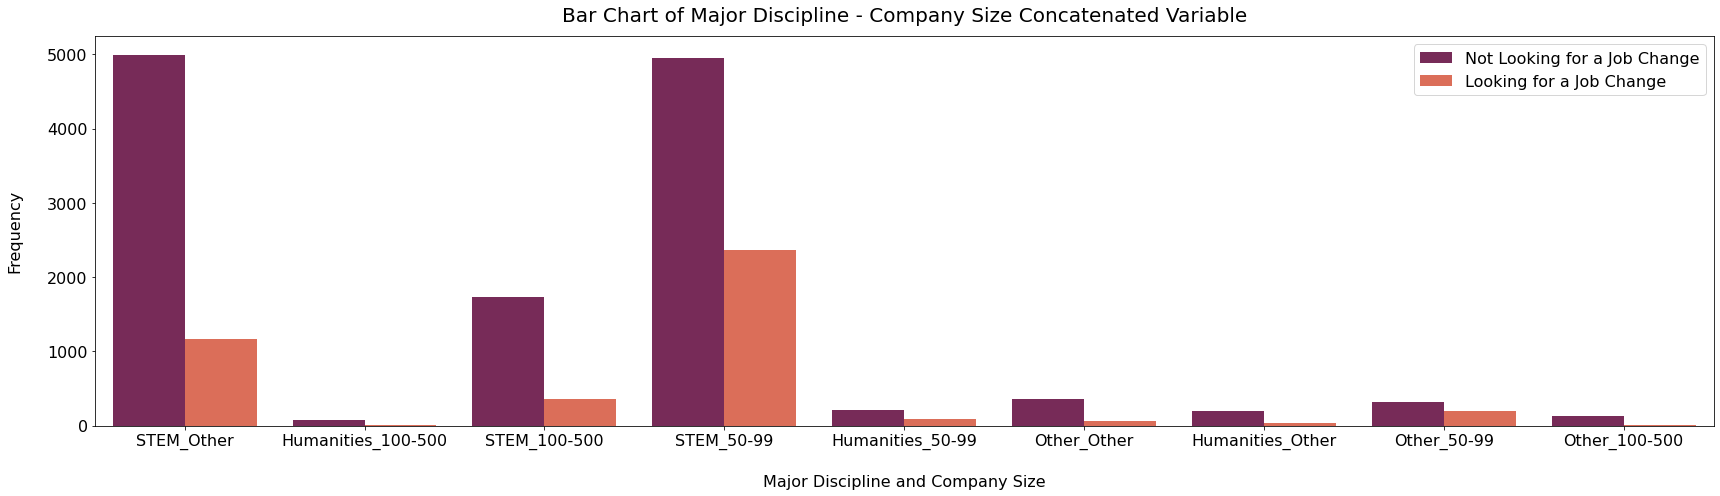

In [1500]:
# Plot of company size concatenated variable stratified by the target variable
plt.figure(figsize = (24, 7))
sns.countplot(x = 'major_discipline_company_size_concat', data = X_train, hue = y_train, palette = 'rocket')

plt.title('Bar Chart of Major Discipline - Company Size Concatenated Variable', pad = 15, size = 20)
plt.ylabel('Frequency', labelpad = 25, size = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Major Discipline and Company Size', labelpad = 25, size = 16)
plt.xticks(fontsize = 16)
plt.legend(labels = ['Not Looking for a Job Change', 'Looking for a Job Change'], prop={'size': 16})
plt.tight_layout()
plt.savefig('major_discipline_comp_sze_concat.jpeg', dpi = 500, pad_inches = 0.5)
plt.show()

## Correlations

In [1501]:
# Check the correlation matrix with the current numerical variables with y_train
corr_matrix = X_train.corrwith(y_train).sort_values()
corr_matrix

winsorize_city_development_index   -0.339925
int_experience_city_dev_idx        -0.202848
experience_pct                     -0.179547
experience_rel_exp_int             -0.178714
winsorize_experience               -0.171800
relevent_experience                -0.132716
experience_last_new_job_int        -0.120886
int_train_hrs_exp                  -0.108119
last_new_job                       -0.082945
int_train_hrs_city_dev_idx         -0.077310
winsorize_training_hours           -0.019700
training_hours_rank                -0.015315
training_hours_pct                 -0.015097
education_level                     0.038288
dtype: float64

## Chi-Square

In [1502]:
# Obtain the categorical features and their names
numerics = ['int16', 'int32', 'int64', 'float64']
cat_col = X_train.select_dtypes(exclude=numerics)
cat_col = cat_col.columns

In [1503]:
# Perform chi-square against the target/dependent variable and each categorical variable
for c in cat_col:
    tab = pd.crosstab(X_train[c], y_train)
    print("\nChi-Square Between {} and Dependent Variable\n----------------------".format(str.capitalize(c)))
    print(chi2_contingency(tab))


Chi-Square Between City and Dependent Variable
----------------------
(1779.643121139677, 0.0, 2, array([[2935.85854309,  975.14145691],
       [1819.6167498 ,  604.3832502 ],
       [8187.52470711, 2719.47529289]]))

Chi-Square Between Gender and Dependent Variable
----------------------
(0.5483730443679096, 0.7601902696870272, 2, array([[  848.25368287,   281.74631713],
       [11964.13026331,  3973.86973669],
       [  130.61605382,    43.38394618]]))

Chi-Square Between Enrolled_university and Dependent Variable
----------------------
(421.50612754100507, 2.9587437958143252e-92, 2, array([[2527.49570815,  839.50429185],
       [ 816.72566988,  271.27433012],
       [9598.77862197, 3188.22137803]]))

Chi-Square Between Major_discipline and Dependent Variable
----------------------
(3.416962585794128, 0.18114068346755574, 2, array([[  455.65485443,   151.34514557],
       [  806.96699919,   268.03300081],
       [11680.37814639,  3879.62185361]]))

Chi-Square Between Company_size an

# List of All Variables

In [1504]:
variables_lists = []
for v in X_train.columns:
    variables_lists.append(v.replace("_", " "))

# One-Hot Encoding

In [1506]:
# Using pd.get_dummies
X_train_dummy = pd.get_dummies(data = X_train, drop_first=True, prefix_sep="_")
X_val_dummy = pd.get_dummies(data = X_val, drop_first=True)
test_dummy = pd.get_dummies(data = test, drop_first=True)

# Shape of new train, validation, and test datasets
data = [X_train_dummy, X_val_dummy, test_dummy]

for d in data:
    print(d.shape)

(17242, 207)
(1916, 198)
(2129, 204)


In [1507]:
# From get dummies, we had less columns in the validation and testing dataset, so we need to add them columns into the
# validating and testing dataset and have them filled in as 0's

# Get missing columns in the training test
missing_cols = set(X_train_dummy.columns ) - set(X_val_dummy.columns )
# Add a missing column in validation set with default value equal to 0
for c in missing_cols:
    X_val_dummy[c] = 0
# Ensure the order of column in the validation set is in the same order than in train set
X_val_dummy = X_val_dummy[X_train_dummy.columns]



# Get missing columns in the training test
missing_cols = set(X_train_dummy.columns ) - set(test_dummy.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_dummy[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_dummy = test_dummy[X_train_dummy.columns]

In [1508]:
# Shape of new train, validation, and test datasets
data = [X_train_dummy, X_val_dummy, test_dummy]

for d in data:
    print(d.shape)

(17242, 207)
(1916, 207)
(2129, 207)


# Multicollinearity

<AxesSubplot:>

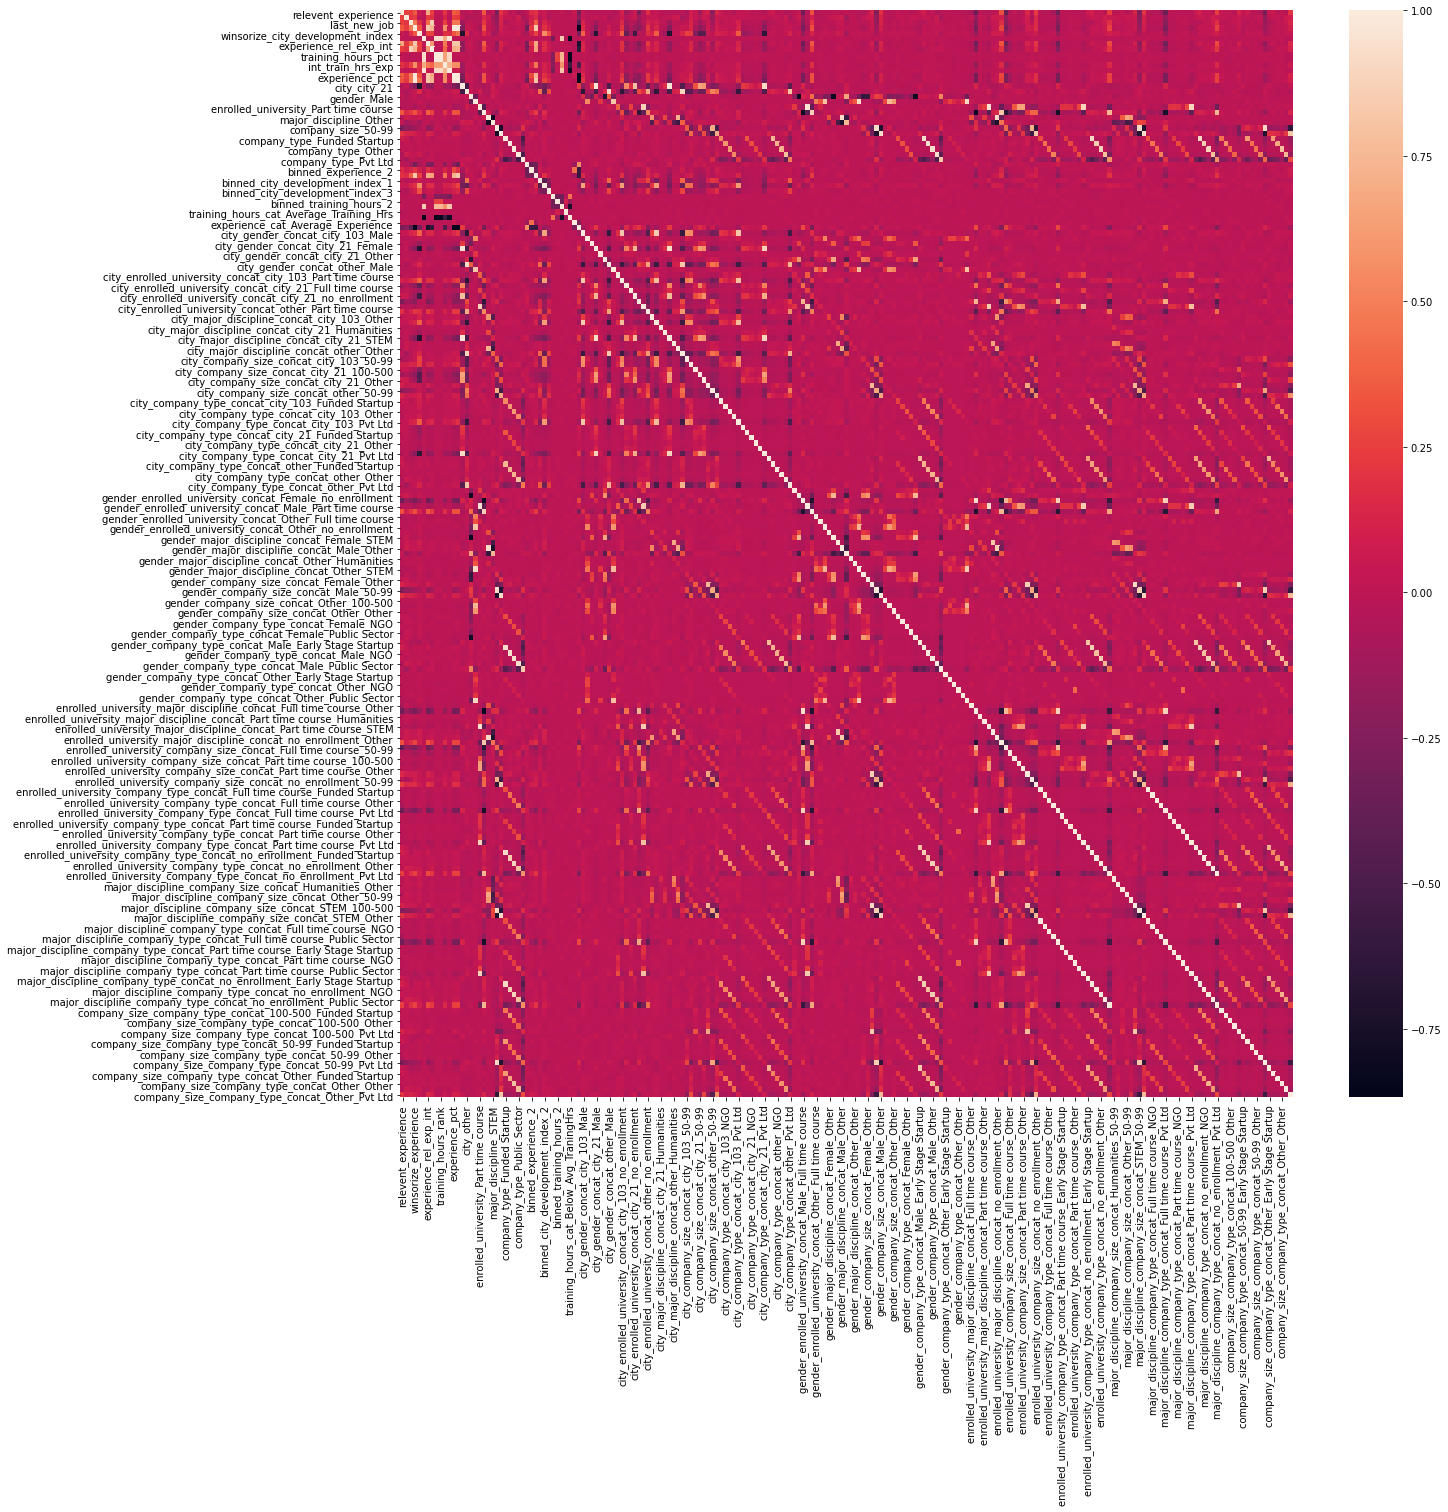

In [1509]:
corr_matrix = X_train_dummy.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix)

In [ ]:
def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [ ]:
calculate_vif(X_train_dummy)

In [1510]:
# Variables to keep after multicollinearity check - these had a VIF of 5 or less
keep_col = ['relevent_experience', 'last_new_job', 'binned_experience_1',
       'binned_experience_2', 'binned_experience_3',
       'binned_city_development_index_1', 'binned_city_development_index_2',
       'binned_city_development_index_3', 'binned_training_hours_1',
       'binned_training_hours_2', 'binned_training_hours_3',
       'training_hours_cat_Average_Training_Hrs',
       'experience_cat_Average_Experience', 'city_gender_concat_city_21_Other',
       'city_gender_concat_other_Other',
       'city_enrolled_university_concat_city_21_Part time course',
       'city_enrolled_university_concat_city_21_no_enrollment',
       'city_enrolled_university_concat_other_Part time course',
       'city_major_discipline_concat_city_21_Other',
       'city_major_discipline_concat_other_Other',
       'city_company_size_concat_city_21_50-99',
       'city_company_size_concat_city_21_Other',
       'city_company_size_concat_other_50-99',
       'city_company_size_concat_other_Other',
       'city_company_type_concat_city_21_Early Stage Startup',
       'city_company_type_concat_city_21_Funded Startup',
       'city_company_type_concat_city_21_NGO',
       'city_company_type_concat_city_21_Other',
       'city_company_type_concat_city_21_Public Sector',
       'city_company_type_concat_other_Early Stage Startup',
       'city_company_type_concat_other_Funded Startup',
       'city_company_type_concat_other_NGO',
       'city_company_type_concat_other_Other',
       'city_company_type_concat_other_Public Sector',
       'gender_enrolled_university_concat_Other_Part time course',
       'gender_enrolled_university_concat_Other_no_enrollment',
       'gender_major_discipline_concat_Other_Other',
       'gender_company_size_concat_Other_50-99',
       'gender_company_size_concat_Other_Other',
       'gender_company_type_concat_Other_Early Stage Startup',
       'gender_company_type_concat_Other_Funded Startup',
       'gender_company_type_concat_Other_NGO',
       'gender_company_type_concat_Other_Other',
       'gender_company_type_concat_Other_Public Sector',
       'enrolled_university_major_discipline_concat_Part time course_Other',
       'enrolled_university_major_discipline_concat_no_enrollment_Other',
       'enrolled_university_company_size_concat_Part time course_50-99',
       'enrolled_university_company_size_concat_Part time course_Other',
       'enrolled_university_company_size_concat_no_enrollment_50-99',
       'major_discipline_company_size_concat_Other_100-500',
       'major_discipline_company_size_concat_Other_Other',
       'major_discipline_company_type_concat_Part time course_Early Stage Startup',
       'major_discipline_company_type_concat_Part time course_Funded Startup',
       'major_discipline_company_type_concat_Part time course_NGO',
       'major_discipline_company_type_concat_Part time course_Other',
       'major_discipline_company_type_concat_Part time course_Public Sector',
       'major_discipline_company_type_concat_no_enrollment_Early Stage Startup',
       'major_discipline_company_type_concat_no_enrollment_NGO',
       'major_discipline_company_type_concat_no_enrollment_Other',
       'major_discipline_company_type_concat_no_enrollment_Public Sector',
       'company_size_company_type_concat_100-500_Funded Startup',
       'company_size_company_type_concat_100-500_NGO',
       'company_size_company_type_concat_100-500_Other',
       'company_size_company_type_concat_100-500_Public Sector',
       'company_size_company_type_concat_100-500_Pvt Ltd',
       'company_size_company_type_concat_50-99_Early Stage Startup',
       'company_size_company_type_concat_50-99_Funded Startup',
       'company_size_company_type_concat_50-99_NGO',
       'company_size_company_type_concat_50-99_Other',
       'company_size_company_type_concat_50-99_Public Sector',
       'company_size_company_type_concat_Other_Funded Startup',
       'company_size_company_type_concat_Other_NGO',
       'company_size_company_type_concat_Other_Public Sector']

In [1511]:
# Create dataframe with the remaining variables
X_train_vif = X_train_dummy[keep_col]
X_val_vif = X_val_dummy[keep_col]
test_vif = test_dummy[keep_col]

<AxesSubplot:>

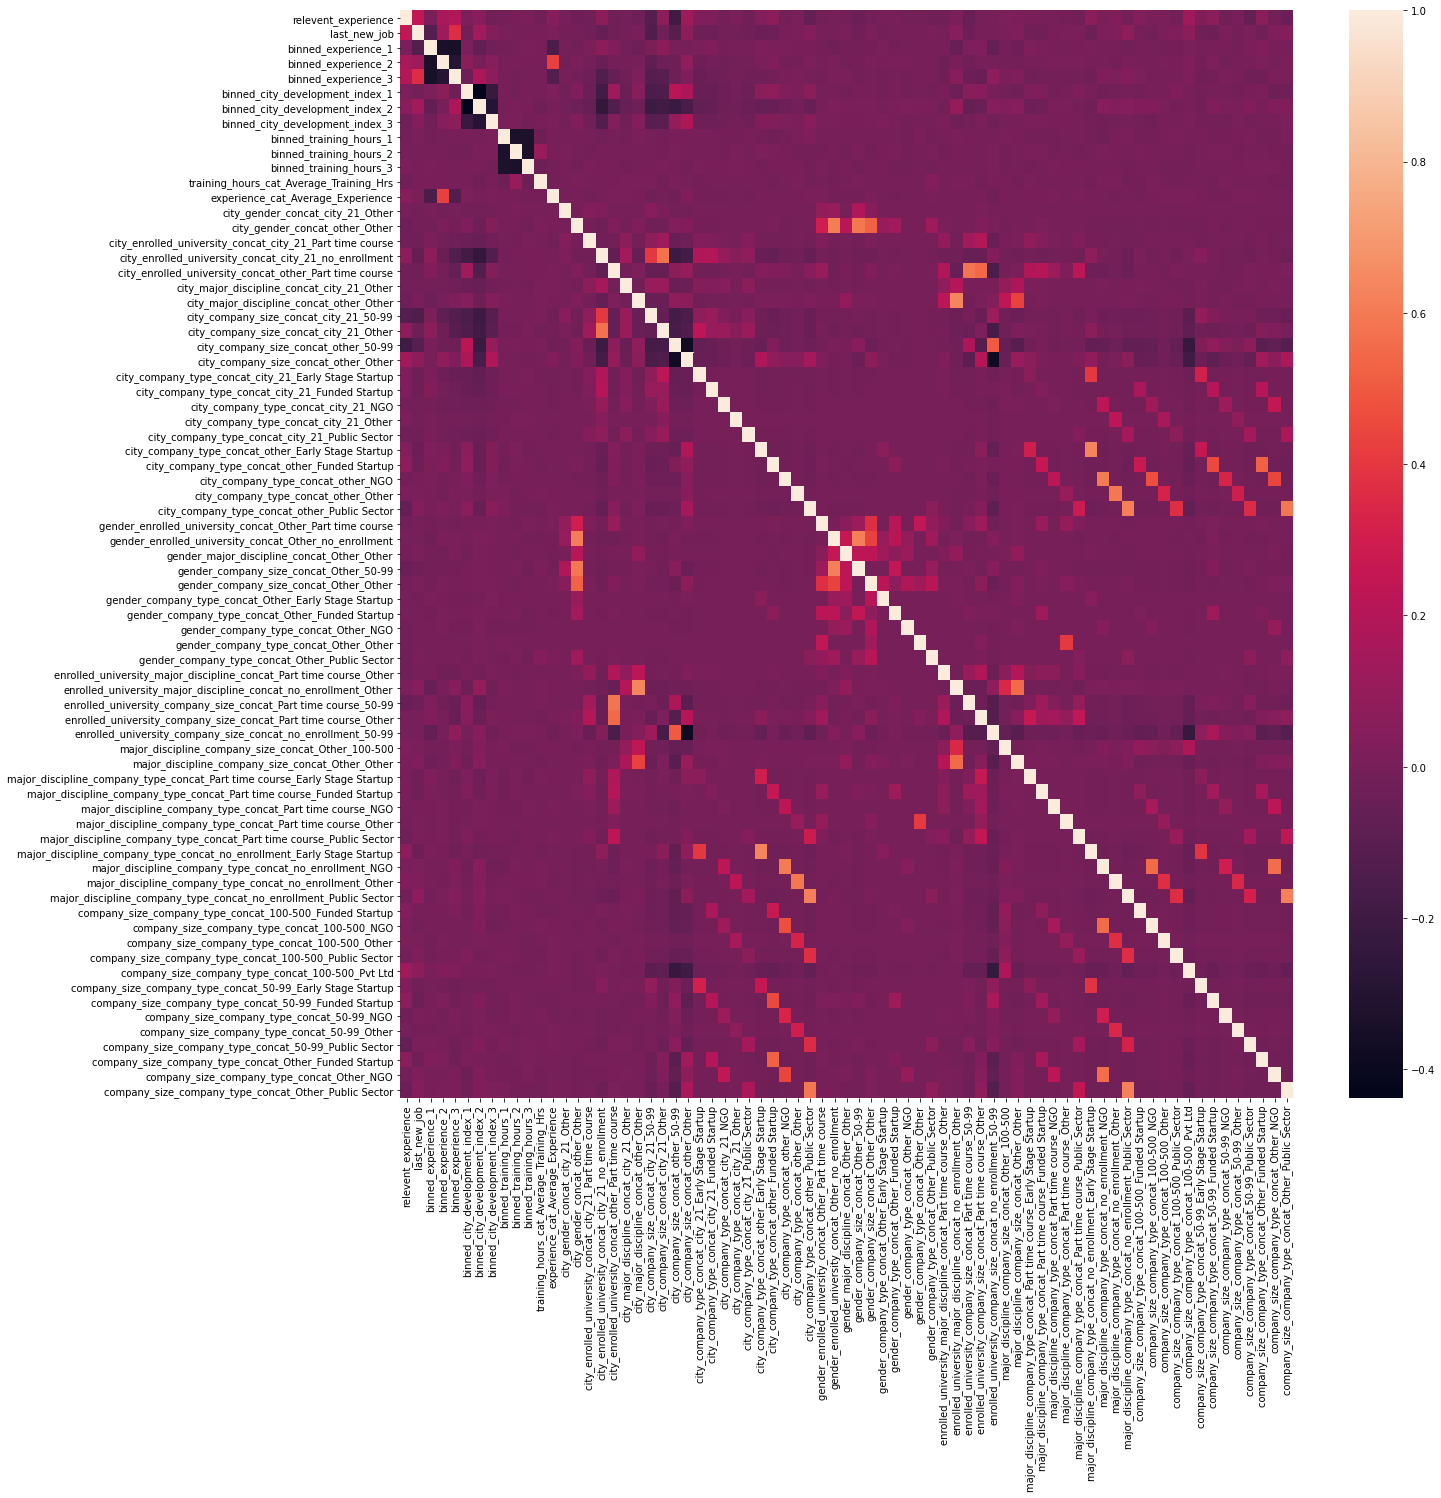

In [1512]:
# Obtain new correlation matrix
corr_matrix = X_train_vif.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix)

# Standard Scaler

In [1513]:
# Scale the independent variables using Standard Scaler

scaler = StandardScaler()
scaler.fit(X_train_vif, y_train)

X_train_scaled = scaler.transform(X_train_vif)
X_val_scaled = scaler.transform(X_val_vif)
test_scaled = scaler.transform(test_vif)

# Shape of scaled train, validation, and test datasets
data = [X_train_scaled, X_val_scaled, test_scaled]

for d in data:
    print(d.shape)

(17242, 73)
(1916, 73)
(2129, 73)


# Dealing with Imbalanced Data

In [1514]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([12943,  4299], dtype=int64))

In [1515]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(random_state=101, sampling_strategy = 'minority')
X_train_os, y_train_os = oversample.fit_resample(X_train_scaled, y_train)

print("Y_Train Balanced:", np.unique(y_train_os, return_counts = True))

# Reshuffle the training dataset
X_train_shuffle, y_train_shuffle = shuffle(X_train_os, y_train_os, random_state=25)

Y_Train Balanced: (array([0., 1.]), array([12943, 12943], dtype=int64))


C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

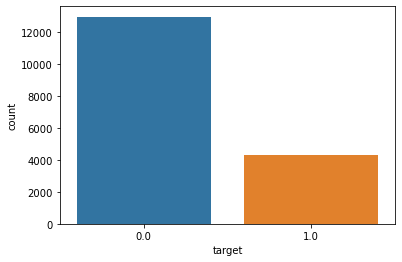

In [1516]:
# Target variable before SMOTE
sns.countplot(y_train)

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

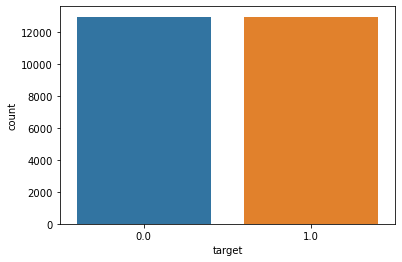

In [1517]:
# Target variable after SMOTE
sns.countplot(y_train_shuffle)

# Random Forest for Variable Selection

In [1518]:
# Fit initial model
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train_shuffle, y_train_shuffle)

train_pred = rf.predict(X_train_shuffle)
val_pred = rf.predict(X_val_scaled)
test_pred = rf.predict(test_scaled)

train_prob = rf.predict_proba(X_train_shuffle)
val_prob = rf.predict_proba(X_val_scaled)
test_prob = rf.predict_proba(test_scaled)

print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

Train Accuracy: 0.87611063895542
Train AUC: 0.9513684828125893

Validation Accuracy: 0.7406054279749478
Validation AUC: 0.7249310409040914

Test Accuracy: 0.7313292625645843
Test AUC: 0.7210651874508122



## Top Features from Random Forest

In [1525]:
ft_imp = pd.DataFrame([X_train_vif.columns, rf.feature_importances_]).transpose()
ft_imp.sort_values(by = 1, ascending = False, inplace = True)

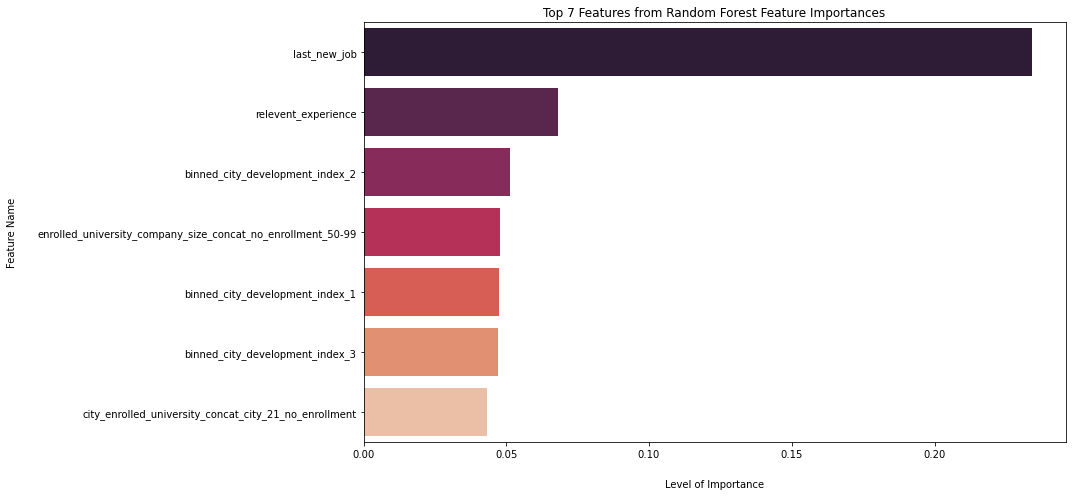

In [1538]:
top_features = ft_imp.head(7)

plt.figure(figsize=(15,7))
sns.barplot(x = 1, y = 0, data = top_features, palette = 'rocket')
plt.title('Top 7 Features from Random Forest Feature Importances')
plt.xlabel('Level of Importance', labelpad = 20)
plt.ylabel('Feature Name', labelpad = 20)
plt.tight_layout()
plt.savefig('top_7_features.jpeg', dpi = 500)
plt.show()

## Evaluate Optimal Number of Features for Modeling

In [1196]:
# Create a list to output the accuracy and auc of the train and validation dataset 
# based on the number of features put into the model
acc_train = list()
auc_train = list()

acc_val = list()
auc_val = list()

for n in list(range(1,74)):
    
    sfm = SelectFromModel(rf, max_features = n)
    sfm.fit(X_train_shuffle, y_train_shuffle)
    
    X_important_train = sfm.transform(X_train_shuffle)
    X_important_val = sfm.transform(X_val_scaled)
    
    rf = RandomForestClassifier(random_state=101)
    rf.fit(X_important_train, y_train_shuffle)
    
    train_pred = rf.predict(X_important_train)
    val_pred = rf.predict(X_important_val)
    
    train_prob = rf.predict_proba(X_important_train)
    val_prob = rf.predict_proba(X_important_val)
    
    acc_train.append(accuracy_score(y_train_shuffle,train_pred))
    auc_train.append(roc_auc_score(y_train_shuffle, train_prob[:,1]))
    
    acc_val.append(accuracy_score(y_val, val_pred))
    auc_val.append(roc_auc_score(y_val, val_prob[:,1]))

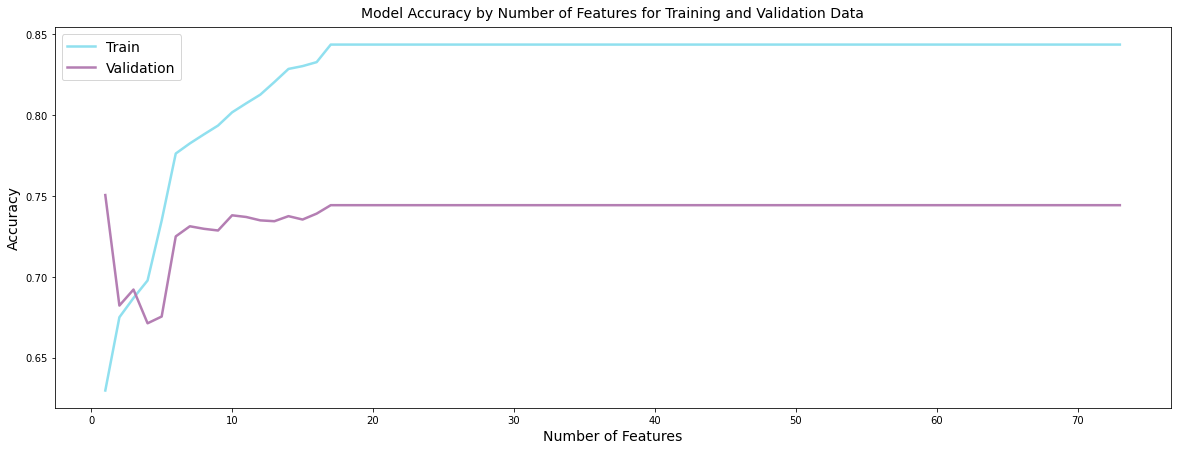

<Figure size 432x288 with 0 Axes>

In [1197]:
# Plot Accuracy
plt.figure(figsize=(20,7))

sns.lineplot(x = list(range(1,74)), y = acc_train, color = "#90e0ef", linewidth = 2.5)
sns.lineplot(x = list(range(1,74)), y = acc_val, color = "#B47EB3", linewidth = 2.5)

plt.title("Model Accuracy by Number of Features for Training and Validation Data", pad = 10, size = 14)
plt.xlabel("Number of Features", size = 14)

plt.ylabel("Accuracy", size = 14)
plt.legend(['Train', 'Validation'], prop={'size': 14})
plt.show()
plt.tight_layout()

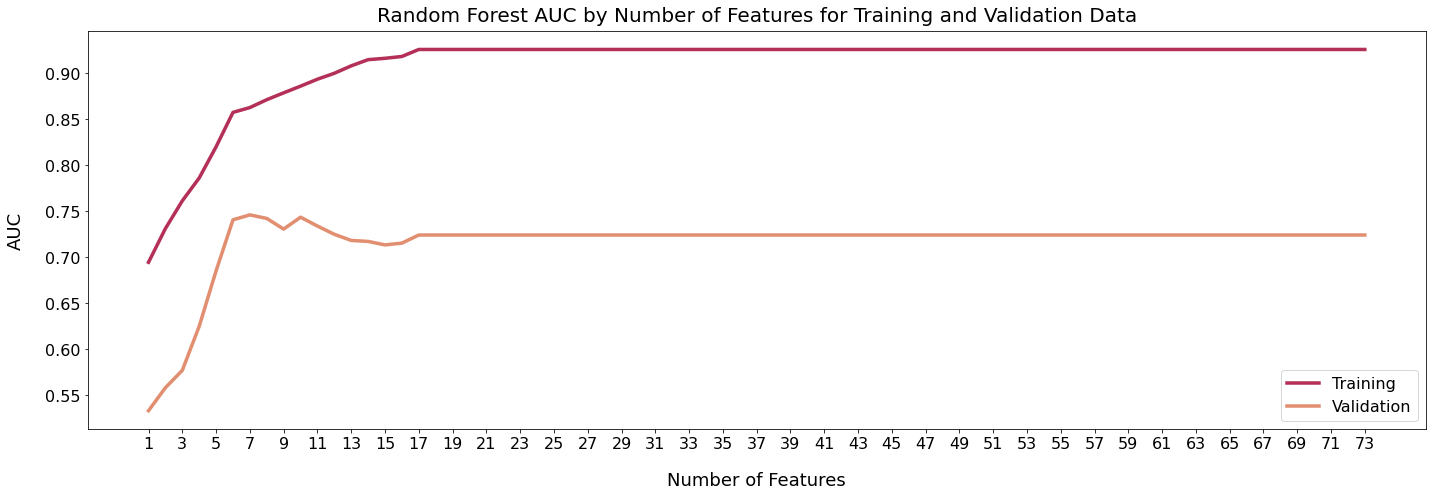

In [1264]:
# Plot AUC
plt.figure(figsize=(20,7))

sns.lineplot(x = list(range(1,74)), y = auc_train, color = "#B43058", linewidth = 3.5)
sns.lineplot(x = list(range(1,74)), y = auc_val, color = "#E28F71", linewidth = 3.5)

plt.title("Random Forest AUC by Number of Features for Training and Validation Data", pad = 10, size = 20)
plt.xlabel("Number of Features", size = 18, labelpad=20)

plt.ylabel("AUC", size = 18, labelpad = 20)
plt.legend(['Training', 'Validation'], prop={'size': 16}, loc = 'lower right')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16, ticks = range(1,74,2))
plt.tight_layout()
plt.savefig('rf_auc_variable_selection.jpeg', dpi = 500, pad_inches = 0.5)
plt.show()

In [1199]:
# Seems like the 7 best features produces the best model (based on AUC) for validation
sfm = SelectFromModel(rf, max_features = 7)
sfm.fit(X_train_shuffle, y_train_shuffle)
    
X_important_train = sfm.transform(X_train_shuffle)
X_important_val = sfm.transform(X_val_scaled)
X_important_test = sfm.transform(test_scaled)

# Compare Base Models

## Logistic Regression
Looks like overfitting on the training data

In [1347]:
logreg = LogisticRegression(max_iter=1000, random_state = 101, class_weight='balanced')
logreg.fit(X_important_train, y_train_shuffle)

train_pred = logreg.predict(X_important_train)
val_pred = logreg.predict(X_important_val)
test_pred = logreg.predict(X_important_test)

train_prob = logreg.predict_proba(X_important_train)
val_prob = logreg.predict_proba(X_important_val)
test_prob = logreg.predict_proba(X_important_test)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(logreg.get_params())

# Get components to plot the curve
auc_logreg = roc_auc_score(y_test, test_prob[:,1])
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
logreg_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.6878621648767673
Train AUC: 0.7442666422574249

Validation Accuracy: 0.7082463465553236
Validation AUC: 0.7333217916562403

Test Accuracy: 0.7064349459840301
Test AUC: 0.7389718376618731

{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 101, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## Decision Tree

In [1348]:
d_tree = DecisionTreeClassifier(random_state = 101, class_weight='balanced')
d_tree.fit(X_important_train, y_train_shuffle)

train_pred = d_tree.predict(X_important_train)
val_pred = d_tree.predict(X_important_val)
test_pred = d_tree.predict(X_important_test)

train_prob = d_tree.predict_proba(X_important_train)
val_prob = d_tree.predict_proba(X_important_val)
test_prob = d_tree.predict_proba(X_important_test)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(d_tree.get_params())

# Get AUC Score
auc_dtree = roc_auc_score(y_test, test_prob[:,1])
fpr_dtree, tpr_dtree, threshold_dtree = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
detree_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.7824692884184501
Train AUC: 0.8625743024396864

Validation Accuracy: 0.7312108559498957
Validation AUC: 0.7455773069290799

Test Accuracy: 0.7308595584781588
Test AUC: 0.7419957787794234

{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 101, 'splitter': 'best'}


## Random Forest

In [1349]:
rf = RandomForestClassifier(random_state = 101, class_weight='balanced')
rf.fit(X_important_train, y_train_shuffle)

train_pred = rf.predict(X_important_train)
val_pred = rf.predict(X_important_val)
test_pred = rf.predict(X_important_test)

train_prob = rf.predict_proba(X_important_train)
val_prob = rf.predict_proba(X_important_val)
test_prob = rf.predict_proba(X_important_test)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(rf.get_params())

# Get AUC Score
auc_rf = roc_auc_score(y_test, test_prob[:,1])
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
rf_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.7824692884184501
Train AUC: 0.8623537035591228

Validation Accuracy: 0.7312108559498957
Validation AUC: 0.7457446127524863

Test Accuracy: 0.7313292625645843
Test AUC: 0.741765489733133

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


## KNN

In [1350]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_important_train, y_train_shuffle)

train_pred = knn_clf.predict(X_important_train)
val_pred = knn_clf.predict(X_important_val)
test_pred = knn_clf.predict(X_important_test)

train_prob = knn_clf.predict_proba(X_important_train)
val_prob = knn_clf.predict_proba(X_important_val)
test_prob = knn_clf.predict_proba(X_important_test)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(knn_clf.get_params())

# Get AUC Score
auc_knn = roc_auc_score(y_test, test_prob[:,1])
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
knn_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.7505987792629221
Train AUC: 0.8210813662211891

Validation Accuracy: 0.7275574112734864
Validation AUC: 0.7107718763275352

Test Accuracy: 0.7101925786754345
Test AUC: 0.6976170673248909

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


## XGBoost

In [1351]:
xg_clf = XGBClassifier(random_state = 101, use_label_encoder=False, eval_metric='mlogloss')
xg_clf.fit(X_important_train, y_train_shuffle)

train_pred = xg_clf.predict(X_important_train)
val_pred = xg_clf.predict(X_important_val)
test_pred = xg_clf.predict(X_important_test)

train_prob = xg_clf.predict_proba(X_important_train)
val_prob = xg_clf.predict_proba(X_important_val)
test_prob = xg_clf.predict_proba(X_important_test)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(xg_clf.get_params())

# Get AUC Score
auc_xgb = roc_auc_score(y_test, test_prob[:,1])
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
xgb_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.7824692884184501
Train AUC: 0.8625516247195603

Validation Accuracy: 0.7312108559498957
Validation AUC: 0.7467251703609732

Test Accuracy: 0.7308595584781588
Test AUC: 0.7422651946054232

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 16, 'num_parallel_tree': 1, 'random_state': 101, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'eval_metric': 'mlogloss'}


## MLP Classifier (Neural Network)

In [1352]:
mlp_clf = MLPClassifier(max_iter = 1000, random_state=101)

mlp_clf.fit(X_important_train, y_train_shuffle)

train_pred = mlp_clf.predict(X_important_train)
val_pred = mlp_clf.predict(X_important_val)
test_pred = mlp_clf.predict(X_important_test)

train_prob = mlp_clf.predict_proba(X_important_train)
val_prob = mlp_clf.predict_proba(X_important_val)
test_prob = mlp_clf.predict_proba(X_important_test)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(mlp_clf.get_params())

# Get AUC Score
auc_mlp = roc_auc_score(y_test, test_prob[:,1])
fpr_mlp, tpr_mlp, threshold_mlp = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
mlp_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.7316696283705478
Train AUC: 0.799414950637098

Validation Accuracy: 0.7124217118997912
Validation AUC: 0.748793943238226

Test Accuracy: 0.7172381399718177
Test AUC: 0.7466272715890392

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 101, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


## SVM

In [1353]:
from sklearn.svm import SVC

# Recode to -1 and +1
y_train_recoded = np.where(y_train_shuffle < 1, -1.0, 1.0)
y_val_recoded = np.where(y_val < 1, -1.0, 1.0)
y_test_recoded = np.where(y_test < 1, -1.0, 1.0)

# Create an instance of SVC
SVC_model = SVC(random_state=101)
SVC_model.fit(X_important_train, y_train_recoded)

train_pred = SVC_model.predict(X_important_train)
val_pred = SVC_model.predict(X_important_val)
test_pred = SVC_model.predict(X_important_test)

train_prob = SVC_model.decision_function(X_important_train)
val_prob = SVC_model.decision_function(X_important_val)
test_prob = SVC_model.decision_function(X_important_test)

print("Train Accuracy:", accuracy_score(y_train_recoded,train_pred))
print("Train AUC:", roc_auc_score(y_train_recoded, train_prob))
print()

print("Validation Accuracy:", accuracy_score(y_val_recoded,val_pred))
print("Validation AUC:", roc_auc_score(y_val_recoded, val_prob))
print()

print("Test Accuracy:", accuracy_score(y_test_recoded,test_pred))
print("Test AUC:", roc_auc_score(y_test_recoded, test_prob))
print()

# Get Initial Logistic Regression Model Parameters
print(SVC_model.get_params())

# Get AUC Score
auc_svc = roc_auc_score(y_test_recoded, test_prob)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test_recoded,test_prob, pos_label =1)

# Obtain recall score for TEST
svm_recall = recall_score(y_test_recoded, test_pred)

Train Accuracy: 0.7231708259290737
Train AUC: 0.7629324713308459

Validation Accuracy: 0.7030271398747391
Validation AUC: 0.6989702690277642

Test Accuracy: 0.7026773132926256
Test AUC: 0.7263092938398797

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 101, 'shrinking': True, 'tol': 0.001, 'verbose': False}


## AUC Curves

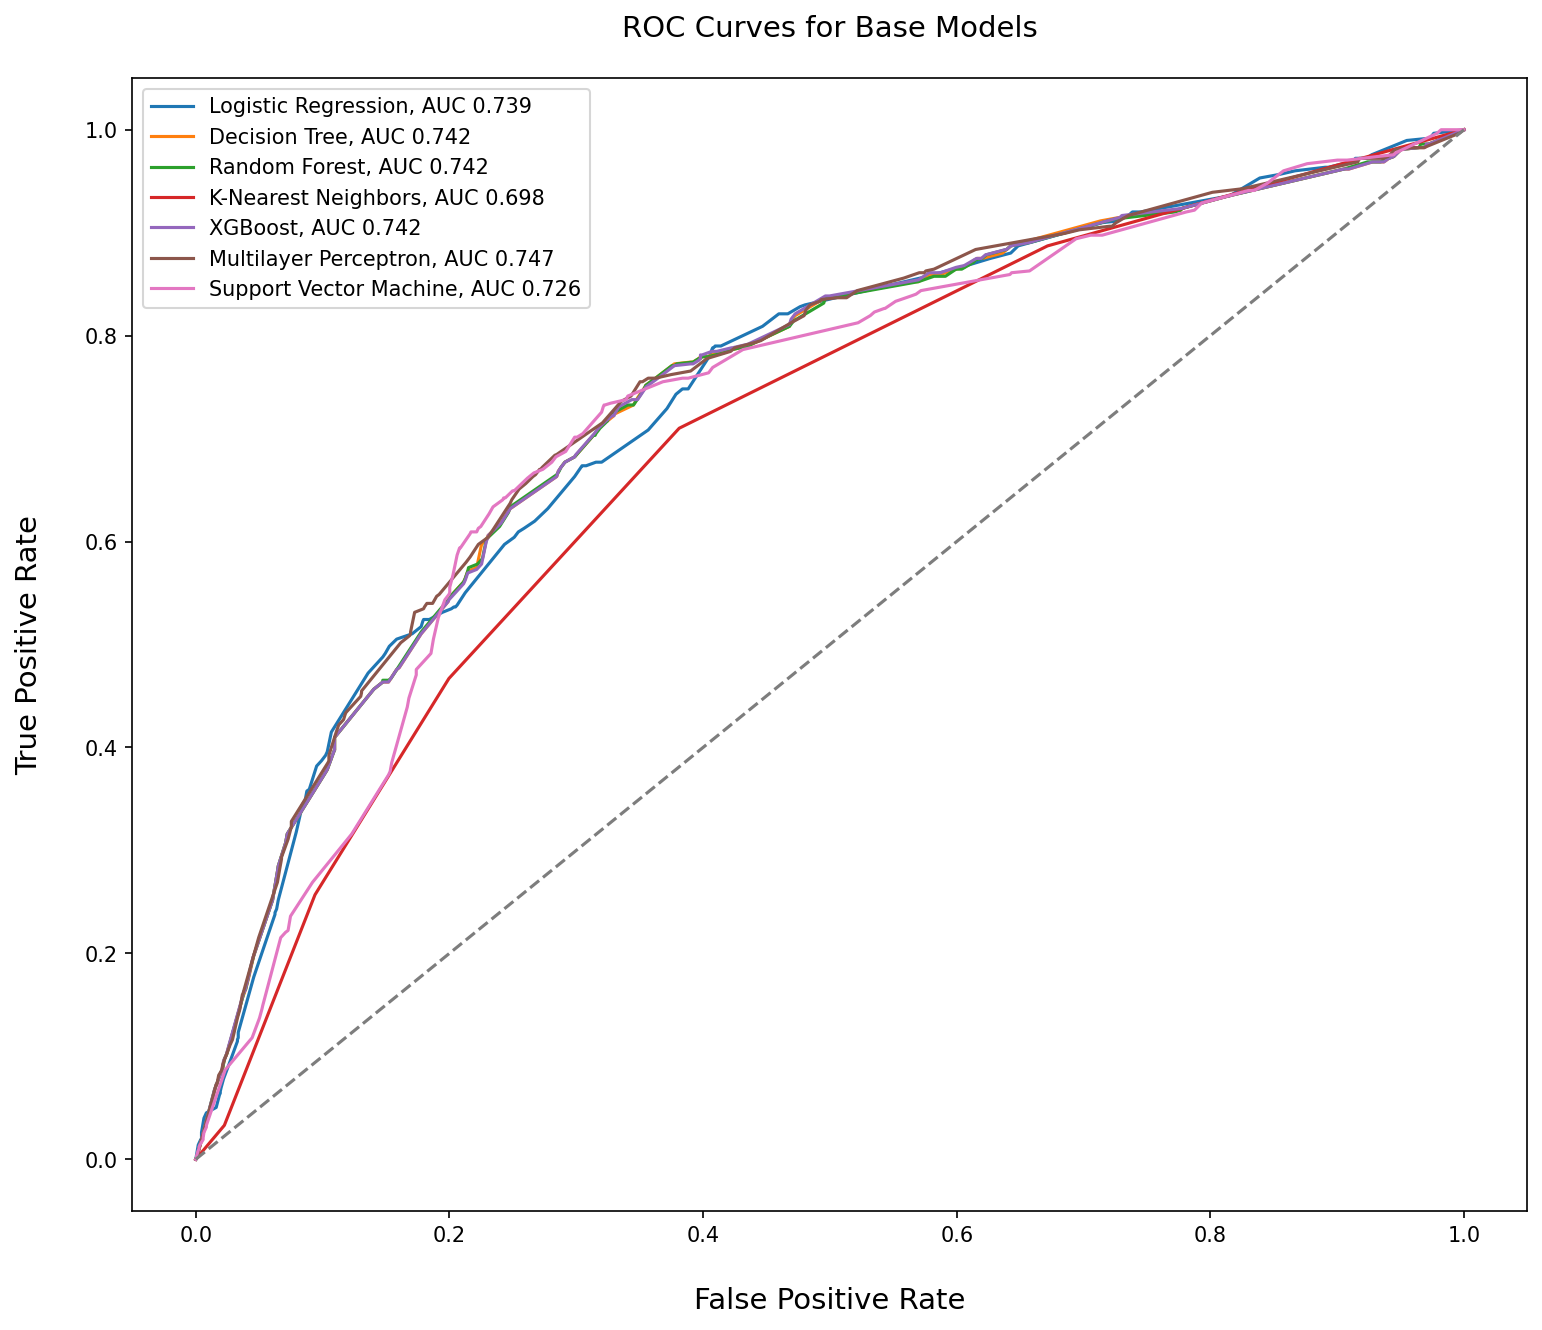

In [1354]:
# Generate ROC curve for initial fits - Decision Tree, Random Forest, XGBoost, MLP are best
plt.subplots(1, figsize=(12,10), dpi = 150)
plt.title('ROC Curves for Base Models', size = 14, pad = 20)

plt.plot(fpr_logreg, tpr_logreg,label = 'Logistic Regression, AUC {}'.format(round(auc_logreg,3)))
plt.plot(fpr_dtree, tpr_dtree, label = 'Decision Tree, AUC {}'.format(round(auc_dtree,3)))
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest, AUC {}'.format(round(auc_rf,3)))
plt.plot(fpr_knn, tpr_knn, label = 'K-Nearest Neighbors, AUC {}'.format(round(auc_knn,3)))
plt.plot(fpr_xgb, tpr_xgb, label = 'XGBoost, AUC {}'.format(round(auc_xgb,3)))
plt.plot(fpr_mlp, tpr_mlp, label = 'Multilayer Perceptron, AUC {}'.format(round(auc_mlp,3)))
plt.plot(fpr_svc, tpr_svc, label = 'Support Vector Machine, AUC {}'.format(round(auc_svc,3)))

plt.legend()
plt.plot([0, 1], ls="--", color = '#7D7D7D')
plt.ylabel('True Positive Rate', size = 14, labelpad = 20)
plt.xlabel('False Positive Rate', size = 14, labelpad = 20)

plt.savefig('auc_curve_base_models.jpeg', dpi = 500, pad_inches = 0.25)
plt.show()

## Model with the highest TRUE POSITIVE RATE

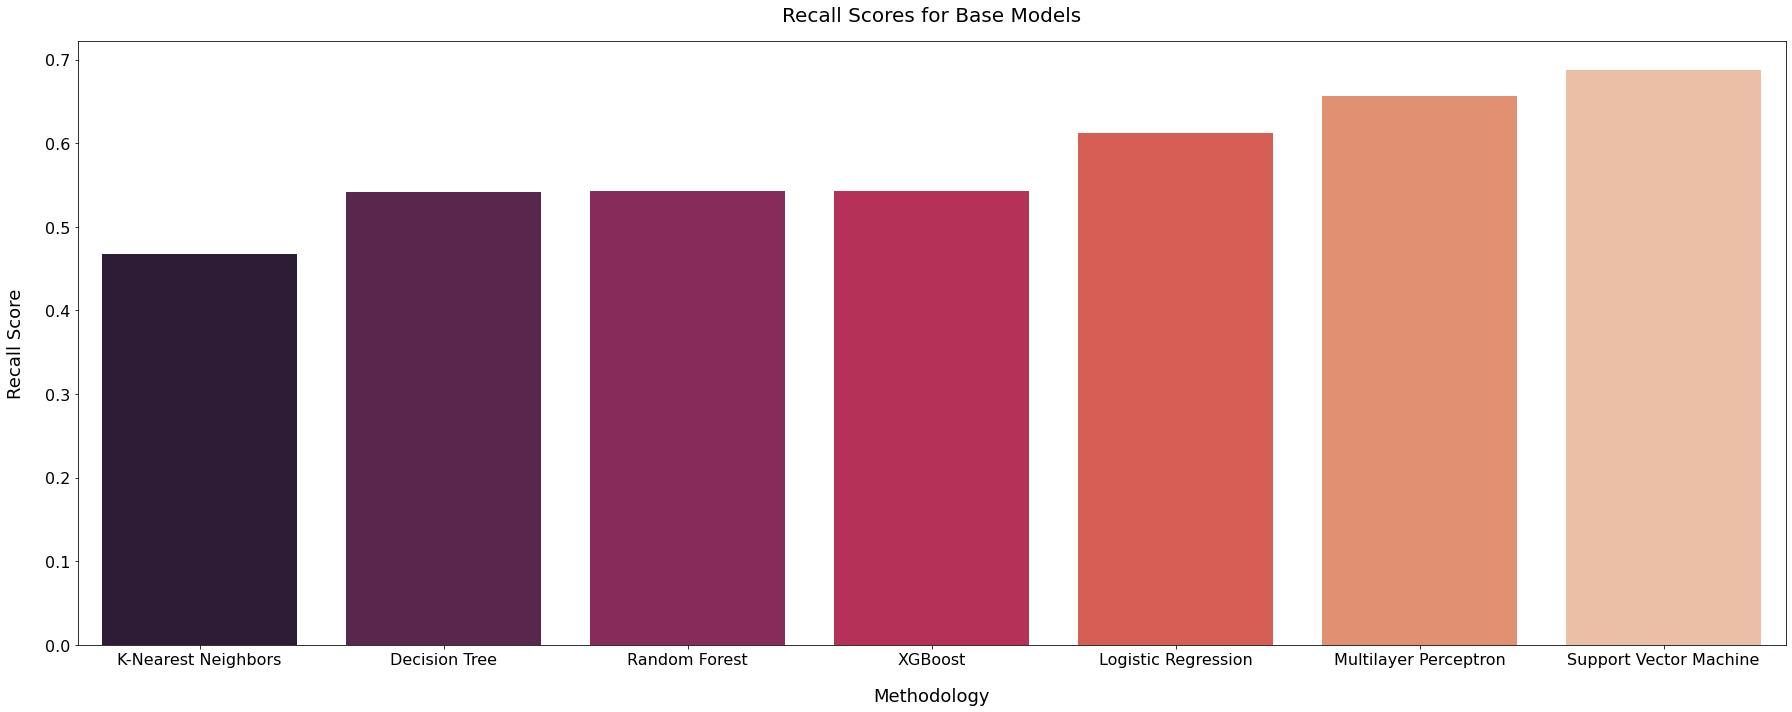

In [1427]:
from sklearn.metrics import recall_score

methods = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'XGBoost', 
           'Multilayer Perceptron', 'Support Vector Machine']
all_recall_scores_base_models = [logreg_recall, detree_recall, rf_recall, knn_recall, xgb_recall, mlp_recall, svm_recall]

recall_df_base = pd.DataFrame([methods, all_recall_scores_base_models]).transpose()
recall_df_base.columns = ['Methodology', 'Recall']

recall_df_base.sort_values(by = 'Recall', inplace = True)

plt.figure(figsize = (25,10))
sns.barplot(x = 'Methodology', y = 'Recall', data = recall_df_base, palette='rocket')
plt.title("Recall Scores for Base Models", pad=20, size = 20)
plt.xlabel('Methodology', size = 18, labelpad = 20)
plt.ylabel('Recall Score', size = 18, labelpad = 20)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.tight_layout()
plt.savefig('recall_scores_base_models.jpeg', dpi = 500, pad_inches = 0.5)
plt.show()

In [1356]:
recall_df_base

Methodology    Recall
3    K-Nearest Neighbords  0.467014
1           Decision Tree  0.541667
2           Random Forest  0.543403
4                 XGBoost  0.543403
0     Logistic Regression  0.612847
5   Multilayer Perceptron   0.65625
6  Support Vector Machine    0.6875

# Parameter Tuning

## Logistic Regression

In [174]:
random_grid = {'penalty': ['l1', 'l2', 'none', 'elasticnet'],
             'C': [0.001, 0.001, 0.1, 1.0, 10, 100, 1000],
             'solver': ['lbgfs', 'liblinear', 'saga'],
             'tol': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}

logreg = LogisticRegression(max_iter=1000, random_state = 101)
logreg_grid = RandomizedSearchCV(estimator = logreg, param_distributions = random_grid, cv = 10, n_iter=50, 
                                 verbose = 10, random_state = 101, scoring = 'accuracy')

logreg_grid.fit(X_important_train, y_train_shuffle)

train_pred = logreg_grid.predict(X_important_train)
val_pred = logreg_grid.predict(X_important_val)
test_pred = logreg_grid.predict(X_important_test)

train_prob = logreg_grid.predict_proba(X_important_train)
val_prob = logreg_grid.predict_proba(X_important_val)
test_prob = logreg_grid.predict_proba(X_important_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START C=0.001, penalty=l1, solver=saga, tol=0.01................
[CV 1/10; 1/50] END C=0.001, penalty=l1, solver=saga, tol=0.01;, score=0.649 total time=   0.0s
[CV 2/10; 1/50] START C=0.001, penalty=l1, solver=saga, tol=0.01................
[CV 2/10; 1/50] END C=0.001, penalty=l1, solver=saga, tol=0.01;, score=0.652 total time=   0.0s
[CV 3/10; 1/50] START C=0.001, penalty=l1, solver=saga, tol=0.01................
[CV 3/10; 1/50] END C=0.001, penalty=l1, solver=saga, tol=0.01;, score=0.643 total time=   0.0s
[CV 4/10; 1/50] START C=0.001, penalty=l1, solver=saga, tol=0.01................
[CV 4/10; 1/50] END C=0.001, penalty=l1, solver=saga, tol=0.01;, score=0.645 total time=   0.0s
[CV 5/10; 1/50] START C=0.001, penalty=l1, solver=saga, tol=0.01................
[CV 5/10; 1/50] END C=0.001, penalty=l1, solver=saga, tol=0.01;, score=0.636 total time=   0.0s
[CV 6/10; 1/50] START C=0.001, penalty=l1, solver=sa

C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\julie\anaconda3\lib

[CV 8/10; 7/50] END C=0.001, penalty=none, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 9/10; 7/50] START C=0.001, penalty=none, solver=liblinear, tol=0.0001.......
[CV 9/10; 7/50] END C=0.001, penalty=none, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 10/10; 7/50] START C=0.001, penalty=none, solver=liblinear, tol=0.0001......
[CV 10/10; 7/50] END C=0.001, penalty=none, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 1/10; 8/50] START C=0.001, penalty=elasticnet, solver=saga, tol=1.0.........
[CV 1/10; 8/50] END C=0.001, penalty=elasticnet, solver=saga, tol=1.0;, score=nan total time=   0.0s
[CV 2/10; 8/50] START C=0.001, penalty=elasticnet, solver=saga, tol=1.0.........
[CV 2/10; 8/50] END C=0.001, penalty=elasticnet, solver=saga, tol=1.0;, score=nan total time=   0.0s
[CV 3/10; 8/50] START C=0.001, penalty=elasticnet, solver=saga, tol=1.0.........
[CV 3/10; 8/50] END C=0.001, penalty=elasticnet, solver=saga, tol=1.0;, score=nan t

C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10; 9/50] END C=0.1, penalty=none, solver=saga, tol=0.01;, score=0.685 total time=   0.0s
[CV 7/10; 9/50] START C=0.1, penalty=none, solver=saga, tol=0.01................
[CV 7/10; 9/50] END C=0.1, penalty=none, solver=saga, tol=0.01;, score=0.684 total time=   0.0s
[CV 8/10; 9/50] START C=0.1, penalty=none, solver=saga, tol=0.01................
[CV 8/10; 9/50] END C=0.1, penalty=none, solver=saga, tol=0.01;, score=0.685 total time=   0.0s
[CV 9/10; 9/50] START C=0.1, penalty=none, solver=saga, tol=0.01................
[CV 9/10; 9/50] END C=0.1, penalty=none, solver=saga, tol=0.01;, score=0.683 total time=   0.0s
[CV 10/10; 9/50] START C=0.1, penalty=none, solver=saga, tol=0.01...............
[CV 10/10; 9/50] END C=0.1, penalty=none, solver=saga, tol=0.01;, score=0.694 total time=   0.0s
[CV 1/10; 10/50] START C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01......
[CV 1/10; 10/50] END C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01;, score=nan total time=   0.0s
[CV 2/10; 

C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\julie\anaconda3\lib

[CV 5/10; 10/50] END C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01;, score=nan total time=   0.0s
[CV 6/10; 10/50] START C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01......
[CV 6/10; 10/50] END C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01;, score=nan total time=   0.0s
[CV 7/10; 10/50] START C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01......
[CV 7/10; 10/50] END C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01;, score=nan total time=   0.0s
[CV 8/10; 10/50] START C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01......
[CV 8/10; 10/50] END C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01;, score=nan total time=   0.0s
[CV 9/10; 10/50] START C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01......
[CV 9/10; 10/50] END C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01;, score=nan total time=   0.0s
[CV 10/10; 10/50] START C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01.....
[CV 10/10; 10/50] END C=0.001, penalty=elasticnet, solver=lbgfs, tol=0.01;,

C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10; 13/50] END C=10, penalty=none, solver=saga, tol=0.01;, score=0.688 total time=   0.0s
[CV 5/10; 13/50] START C=10, penalty=none, solver=saga, tol=0.01................
[CV 5/10; 13/50] END C=10, penalty=none, solver=saga, tol=0.01;, score=0.684 total time=   0.0s
[CV 6/10; 13/50] START C=10, penalty=none, solver=saga, tol=0.01................
[CV 6/10; 13/50] END C=10, penalty=none, solver=saga, tol=0.01;, score=0.685 total time=   0.0s
[CV 7/10; 13/50] START C=10, penalty=none, solver=saga, tol=0.01................
[CV 7/10; 13/50] END C=10, penalty=none, solver=saga, tol=0.01;, score=0.684 total time=   0.0s
[CV 8/10; 13/50] START C=10, penalty=none, solver=saga, tol=0.01................
[CV 8/10; 13/50] END C=10, penalty=none, solver=saga, tol=0.01;, score=0.685 total time=   0.0s
[CV 9/10; 13/50] START C=10, penalty=none, solver=saga, tol=0.01................


C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\julie\anaconda3\lib\site-packages\s

[CV 9/10; 13/50] END C=10, penalty=none, solver=saga, tol=0.01;, score=0.683 total time=   0.0s
[CV 10/10; 13/50] START C=10, penalty=none, solver=saga, tol=0.01...............
[CV 10/10; 13/50] END C=10, penalty=none, solver=saga, tol=0.01;, score=0.694 total time=   0.0s
[CV 1/10; 14/50] START C=100, penalty=elasticnet, solver=lbgfs, tol=0.1.........
[CV 1/10; 14/50] END C=100, penalty=elasticnet, solver=lbgfs, tol=0.1;, score=nan total time=   0.0s
[CV 2/10; 14/50] START C=100, penalty=elasticnet, solver=lbgfs, tol=0.1.........
[CV 2/10; 14/50] END C=100, penalty=elasticnet, solver=lbgfs, tol=0.1;, score=nan total time=   0.0s
[CV 3/10; 14/50] START C=100, penalty=elasticnet, solver=lbgfs, tol=0.1.........
[CV 3/10; 14/50] END C=100, penalty=elasticnet, solver=lbgfs, tol=0.1;, score=nan total time=   0.0s
[CV 4/10; 14/50] START C=100, penalty=elasticnet, solver=lbgfs, tol=0.1.........
[CV 4/10; 14/50] END C=100, penalty=elasticnet, solver=lbgfs, tol=0.1;, score=nan total time=   0.0

[CV 8/10; 18/50] END C=0.001, penalty=l2, solver=liblinear, tol=0.0001;, score=0.687 total time=   0.0s
[CV 9/10; 18/50] START C=0.001, penalty=l2, solver=liblinear, tol=0.0001........
[CV 9/10; 18/50] END C=0.001, penalty=l2, solver=liblinear, tol=0.0001;, score=0.684 total time=   0.0s
[CV 10/10; 18/50] START C=0.001, penalty=l2, solver=liblinear, tol=0.0001.......
[CV 10/10; 18/50] END C=0.001, penalty=l2, solver=liblinear, tol=0.0001;, score=0.689 total time=   0.0s
[CV 1/10; 19/50] START C=0.001, penalty=l2, solver=liblinear, tol=0.0001........
[CV 1/10; 19/50] END C=0.001, penalty=l2, solver=liblinear, tol=0.0001;, score=0.679 total time=   0.0s
[CV 2/10; 19/50] START C=0.001, penalty=l2, solver=liblinear, tol=0.0001........
[CV 2/10; 19/50] END C=0.001, penalty=l2, solver=liblinear, tol=0.0001;, score=0.698 total time=   0.0s
[CV 3/10; 19/50] START C=0.001, penalty=l2, solver=liblinear, tol=0.0001........
[CV 3/10; 19/50] END C=0.001, penalty=l2, solver=liblinear, tol=0.0001;, s

C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lbgfs.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\julie\anaconda3\lib

[CV 3/10; 23/50] END C=0.1, penalty=l1, solver=liblinear, tol=0.001;, score=0.681 total time=   0.0s
[CV 4/10; 23/50] START C=0.1, penalty=l1, solver=liblinear, tol=0.001...........
[CV 4/10; 23/50] END C=0.1, penalty=l1, solver=liblinear, tol=0.001;, score=0.688 total time=   0.0s
[CV 5/10; 23/50] START C=0.1, penalty=l1, solver=liblinear, tol=0.001...........
[CV 5/10; 23/50] END C=0.1, penalty=l1, solver=liblinear, tol=0.001;, score=0.685 total time=   0.0s
[CV 6/10; 23/50] START C=0.1, penalty=l1, solver=liblinear, tol=0.001...........
[CV 6/10; 23/50] END C=0.1, penalty=l1, solver=liblinear, tol=0.001;, score=0.685 total time=   0.0s
[CV 7/10; 23/50] START C=0.1, penalty=l1, solver=liblinear, tol=0.001...........
[CV 7/10; 23/50] END C=0.1, penalty=l1, solver=liblinear, tol=0.001;, score=0.681 total time=   0.0s
[CV 8/10; 23/50] START C=0.1, penalty=l1, solver=liblinear, tol=0.001...........
[CV 8/10; 23/50] END C=0.1, penalty=l1, solver=liblinear, tol=0.001;, score=0.679 total ti

C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_val

[CV 10/10; 24/50] END C=0.001, penalty=elasticnet, solver=liblinear, tol=1.0;, score=nan total time=   0.0s
[CV 1/10; 25/50] START C=10, penalty=l2, solver=lbgfs, tol=0.1..................
[CV 1/10; 25/50] END C=10, penalty=l2, solver=lbgfs, tol=0.1;, score=nan total time=   0.0s
[CV 2/10; 25/50] START C=10, penalty=l2, solver=lbgfs, tol=0.1..................
[CV 2/10; 25/50] END C=10, penalty=l2, solver=lbgfs, tol=0.1;, score=nan total time=   0.0s
[CV 3/10; 25/50] START C=10, penalty=l2, solver=lbgfs, tol=0.1..................
[CV 3/10; 25/50] END C=10, penalty=l2, solver=lbgfs, tol=0.1;, score=nan total time=   0.0s
[CV 4/10; 25/50] START C=10, penalty=l2, solver=lbgfs, tol=0.1..................
[CV 4/10; 25/50] END C=10, penalty=l2, solver=lbgfs, tol=0.1;, score=nan total time=   0.0s
[CV 5/10; 25/50] START C=10, penalty=l2, solver=lbgfs, tol=0.1..................
[CV 5/10; 25/50] END C=10, penalty=l2, solver=lbgfs, tol=0.1;, score=nan total time=   0.0s
[CV 6/10; 25/50] START C=10

C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_val

[CV 7/10; 27/50] END C=100, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 8/10; 27/50] START C=100, penalty=elasticnet, solver=liblinear, tol=0.0001..
[CV 8/10; 27/50] END C=100, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 9/10; 27/50] START C=100, penalty=elasticnet, solver=liblinear, tol=0.0001..
[CV 9/10; 27/50] END C=100, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 10/10; 27/50] START C=100, penalty=elasticnet, solver=liblinear, tol=0.0001.
[CV 10/10; 27/50] END C=100, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 1/10; 28/50] START C=0.001, penalty=elasticnet, solver=lbgfs, tol=100.......
[CV 1/10; 28/50] END C=0.001, penalty=elasticnet, solver=lbgfs, tol=100;, score=nan total time=   0.0s
[CV 2/10; 28/50] START C=0.001, penalty=elasticnet, solver=lbgfs, tol=100.......
[CV 2/10; 28/50] END C=0.001, penalty=elasticnet, solver=lb

[CV 3/10; 32/50] END C=100, penalty=l2, solver=liblinear, tol=0.001;, score=0.681 total time=   0.0s
[CV 4/10; 32/50] START C=100, penalty=l2, solver=liblinear, tol=0.001...........
[CV 4/10; 32/50] END C=100, penalty=l2, solver=liblinear, tol=0.001;, score=0.688 total time=   0.0s
[CV 5/10; 32/50] START C=100, penalty=l2, solver=liblinear, tol=0.001...........
[CV 5/10; 32/50] END C=100, penalty=l2, solver=liblinear, tol=0.001;, score=0.685 total time=   0.0s
[CV 6/10; 32/50] START C=100, penalty=l2, solver=liblinear, tol=0.001...........
[CV 6/10; 32/50] END C=100, penalty=l2, solver=liblinear, tol=0.001;, score=0.685 total time=   0.0s
[CV 7/10; 32/50] START C=100, penalty=l2, solver=liblinear, tol=0.001...........
[CV 7/10; 32/50] END C=100, penalty=l2, solver=liblinear, tol=0.001;, score=0.684 total time=   0.0s
[CV 8/10; 32/50] START C=100, penalty=l2, solver=liblinear, tol=0.001...........
[CV 8/10; 32/50] END C=100, penalty=l2, solver=liblinear, tol=0.001;, score=0.679 total ti

C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalt

[CV 7/10; 33/50] END C=100, penalty=none, solver=saga, tol=1.0;, score=0.693 total time=   0.0s
[CV 8/10; 33/50] START C=100, penalty=none, solver=saga, tol=1.0................
[CV 8/10; 33/50] END C=100, penalty=none, solver=saga, tol=1.0;, score=0.684 total time=   0.0s
[CV 9/10; 33/50] START C=100, penalty=none, solver=saga, tol=1.0................
[CV 9/10; 33/50] END C=100, penalty=none, solver=saga, tol=1.0;, score=0.692 total time=   0.0s
[CV 10/10; 33/50] START C=100, penalty=none, solver=saga, tol=1.0...............
[CV 10/10; 33/50] END C=100, penalty=none, solver=saga, tol=1.0;, score=0.680 total time=   0.0s
[CV 1/10; 34/50] START C=0.001, penalty=l2, solver=lbgfs, tol=0.0001............
[CV 1/10; 34/50] END C=0.001, penalty=l2, solver=lbgfs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/10; 34/50] START C=0.001, penalty=l2, solver=lbgfs, tol=0.0001............
[CV 2/10; 34/50] END C=0.001, penalty=l2, solver=lbgfs, tol=0.0001;, score=nan total time=   0.0s
[CV 3/10; 34/5

C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10; 38/50] END C=0.1, penalty=none, solver=saga, tol=0.0001;, score=0.699 total time=   0.0s
[CV 3/10; 38/50] START C=0.1, penalty=none, solver=saga, tol=0.0001.............
[CV 3/10; 38/50] END C=0.1, penalty=none, solver=saga, tol=0.0001;, score=0.681 total time=   0.0s
[CV 4/10; 38/50] START C=0.1, penalty=none, solver=saga, tol=0.0001.............
[CV 4/10; 38/50] END C=0.1, penalty=none, solver=saga, tol=0.0001;, score=0.688 total time=   0.0s
[CV 5/10; 38/50] START C=0.1, penalty=none, solver=saga, tol=0.0001.............


C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10; 38/50] END C=0.1, penalty=none, solver=saga, tol=0.0001;, score=0.685 total time=   0.0s
[CV 6/10; 38/50] START C=0.1, penalty=none, solver=saga, tol=0.0001.............
[CV 6/10; 38/50] END C=0.1, penalty=none, solver=saga, tol=0.0001;, score=0.685 total time=   0.0s
[CV 7/10; 38/50] START C=0.1, penalty=none, solver=saga, tol=0.0001.............
[CV 7/10; 38/50] END C=0.1, penalty=none, solver=saga, tol=0.0001;, score=0.684 total time=   0.0s
[CV 8/10; 38/50] START C=0.1, penalty=none, solver=saga, tol=0.0001.............


C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10; 38/50] END C=0.1, penalty=none, solver=saga, tol=0.0001;, score=0.679 total time=   0.0s
[CV 9/10; 38/50] START C=0.1, penalty=none, solver=saga, tol=0.0001.............
[CV 9/10; 38/50] END C=0.1, penalty=none, solver=saga, tol=0.0001;, score=0.683 total time=   0.0s
[CV 10/10; 38/50] START C=0.1, penalty=none, solver=saga, tol=0.0001............
[CV 10/10; 38/50] END C=0.1, penalty=none, solver=saga, tol=0.0001;, score=0.694 total time=   0.0s
[CV 1/10; 39/50] START C=10, penalty=l1, solver=lbgfs, tol=10...................
[CV 1/10; 39/50] END C=10, penalty=l1, solver=lbgfs, tol=10;, score=nan total time=   0.0s
[CV 2/10; 39/50] START C=10, penalty=l1, solver=lbgfs, tol=10...................
[CV 2/10; 39/50] END C=10, penalty=l1, solver=lbgfs, tol=10;, score=nan total time=   0.0s
[CV 3/10; 39/50] START C=10, penalty=l1, solver=lbgfs, tol=10...................
[CV 3/10; 39/50] END C=10, penalty=l1, solver=lbgfs, tol=10;, score=nan total time=   0.0s
[CV 4/10; 39/50] START C

C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports

[CV 3/10; 40/50] END C=10, penalty=l2, solver=saga, tol=1000;, score=0.665 total time=   0.0s
[CV 4/10; 40/50] START C=10, penalty=l2, solver=saga, tol=1000..................
[CV 4/10; 40/50] END C=10, penalty=l2, solver=saga, tol=1000;, score=0.666 total time=   0.0s
[CV 5/10; 40/50] START C=10, penalty=l2, solver=saga, tol=1000..................
[CV 5/10; 40/50] END C=10, penalty=l2, solver=saga, tol=1000;, score=0.678 total time=   0.0s
[CV 6/10; 40/50] START C=10, penalty=l2, solver=saga, tol=1000..................
[CV 6/10; 40/50] END C=10, penalty=l2, solver=saga, tol=1000;, score=0.683 total time=   0.0s
[CV 7/10; 40/50] START C=10, penalty=l2, solver=saga, tol=1000..................
[CV 7/10; 40/50] END C=10, penalty=l2, solver=saga, tol=1000;, score=0.693 total time=   0.0s
[CV 8/10; 40/50] START C=10, penalty=l2, solver=saga, tol=1000..................
[CV 8/10; 40/50] END C=10, penalty=l2, solver=saga, tol=1000;, score=0.683 total time=   0.0s
[CV 9/10; 40/50] START C=10, pe

C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalt

[CV 5/10; 42/50] END C=1.0, penalty=elasticnet, solver=liblinear, tol=10;, score=nan total time=   0.0s
[CV 6/10; 42/50] START C=1.0, penalty=elasticnet, solver=liblinear, tol=10......
[CV 6/10; 42/50] END C=1.0, penalty=elasticnet, solver=liblinear, tol=10;, score=nan total time=   0.0s
[CV 7/10; 42/50] START C=1.0, penalty=elasticnet, solver=liblinear, tol=10......
[CV 7/10; 42/50] END C=1.0, penalty=elasticnet, solver=liblinear, tol=10;, score=nan total time=   0.0s
[CV 8/10; 42/50] START C=1.0, penalty=elasticnet, solver=liblinear, tol=10......
[CV 8/10; 42/50] END C=1.0, penalty=elasticnet, solver=liblinear, tol=10;, score=nan total time=   0.0s
[CV 9/10; 42/50] START C=1.0, penalty=elasticnet, solver=liblinear, tol=10......
[CV 9/10; 42/50] END C=1.0, penalty=elasticnet, solver=liblinear, tol=10;, score=nan total time=   0.0s
[CV 10/10; 42/50] START C=1.0, penalty=elasticnet, solver=liblinear, tol=10.....
[CV 10/10; 42/50] END C=1.0, penalty=elasticnet, solver=liblinear, tol=10;,

C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_val

[CV 3/10; 47/50] END C=1.0, penalty=l2, solver=lbgfs, tol=0.001;, score=nan total time=   0.0s
[CV 4/10; 47/50] START C=1.0, penalty=l2, solver=lbgfs, tol=0.001...............
[CV 4/10; 47/50] END C=1.0, penalty=l2, solver=lbgfs, tol=0.001;, score=nan total time=   0.0s
[CV 5/10; 47/50] START C=1.0, penalty=l2, solver=lbgfs, tol=0.001...............
[CV 5/10; 47/50] END C=1.0, penalty=l2, solver=lbgfs, tol=0.001;, score=nan total time=   0.0s
[CV 6/10; 47/50] START C=1.0, penalty=l2, solver=lbgfs, tol=0.001...............
[CV 6/10; 47/50] END C=1.0, penalty=l2, solver=lbgfs, tol=0.001;, score=nan total time=   0.0s
[CV 7/10; 47/50] START C=1.0, penalty=l2, solver=lbgfs, tol=0.001...............
[CV 7/10; 47/50] END C=1.0, penalty=l2, solver=lbgfs, tol=0.001;, score=nan total time=   0.0s
[CV 8/10; 47/50] START C=1.0, penalty=l2, solver=lbgfs, tol=0.001...............
[CV 8/10; 47/50] END C=1.0, penalty=l2, solver=lbgfs, tol=0.001;, score=nan total time=   0.0s
[CV 9/10; 47/50] START C=

C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\julie\anaconda3\lib\site-packages\sklearn\model_selection\_val

In [175]:
# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(logreg_grid.best_params_)

# Get components to plot the curve
auc_logreg_grid = roc_auc_score(y_test, test_prob[:,1])
fpr_logreg_grid, tpr_logreg_grid, threshold_logreg_grid = roc_curve(y_test,test_prob[:,1], pos_label=1)

Train Accuracy: 0.6860078807077185
Train AUC: 0.7439042524091973

Validation Accuracy: 0.7004175365344467
Validation AUC: 0.7355389575246885

Test Accuracy: 0.7022076092062001
Test AUC: 0.7392166595120556

{'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l2', 'C': 0.001}


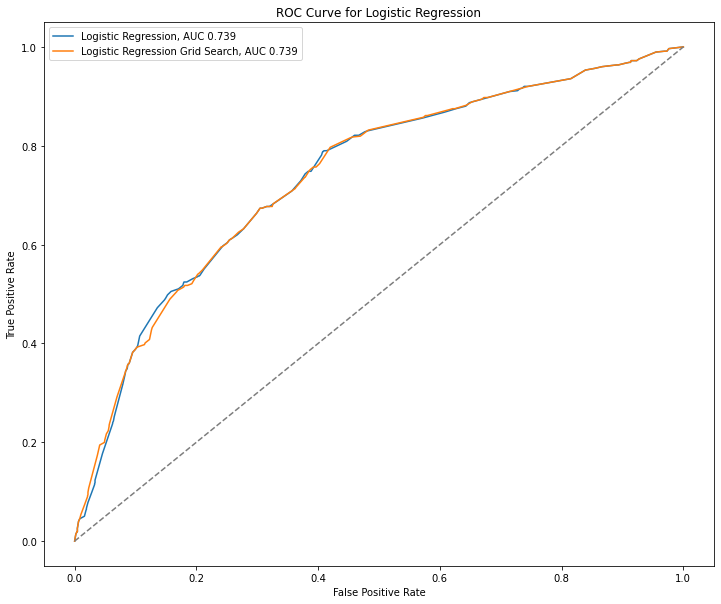

In [176]:
# Generate ROC curve for Logistic Regression: Original Model with no hyperparameter tuning is better based on AUC, but the
# Grid Search Model is not overfitted as much.
plt.subplots(1, figsize=(12,10))
plt.title('ROC Curve for Logistic Regression')

plt.plot(fpr_logreg, tpr_logreg, label = 'Logistic Regression, AUC {}'.format(round(auc_logreg,3)))
plt.plot(fpr_logreg_grid, tpr_logreg_grid, label = 'Logistic Regression Grid Search, AUC {}'.format(round(auc_logreg_grid,3)))

plt.legend()
plt.plot([0, 1], ls="--", color = '#7D7D7D')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree

In [177]:
random_grid = {'criterion': ['gini', 'entropy'],
             'splitter': ['random', 'best'],
             'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30 ],
             'min_samples_split': [2, 4, 16, 32, 64, 128, 100, 200, 500, 700, 1000],
             'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]}

dectree_grid = RandomizedSearchCV(DecisionTreeClassifier(random_state = 101), random_grid, cv = 10, n_iter=50, 
                                  verbose = 10, random_state = 101, scoring = 'accuracy')
dectree_grid.fit(X_important_train, y_train_shuffle)

train_pred = dectree_grid.predict(X_important_train)
val_pred = dectree_grid.predict(X_important_val)
test_pred = dectree_grid.predict(X_important_test)

train_prob = dectree_grid.predict_proba(X_important_train)
val_prob = dectree_grid.predict_proba(X_important_val)
test_prob = dectree_grid.predict_proba(X_important_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START criterion=gini, max_depth=10, min_samples_leaf=22, min_samples_split=32, splitter=best
[CV 1/10; 1/50] END criterion=gini, max_depth=10, min_samples_leaf=22, min_samples_split=32, splitter=best;, score=0.765 total time=   0.0s
[CV 2/10; 1/50] START criterion=gini, max_depth=10, min_samples_leaf=22, min_samples_split=32, splitter=best
[CV 2/10; 1/50] END criterion=gini, max_depth=10, min_samples_leaf=22, min_samples_split=32, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10; 1/50] START criterion=gini, max_depth=10, min_samples_leaf=22, min_samples_split=32, splitter=best
[CV 3/10; 1/50] END criterion=gini, max_depth=10, min_samples_leaf=22, min_samples_split=32, splitter=best;, score=0.762 total time=   0.0s
[CV 4/10; 1/50] START criterion=gini, max_depth=10, min_samples_leaf=22, min_samples_split=32, splitter=best
[CV 4/10; 1/50] END criterion=gini, max_depth=10, min_samples_leaf=22, min_sample

[CV 8/10; 4/50] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=700, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10; 4/50] START criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=700, splitter=best
[CV 9/10; 4/50] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=700, splitter=best;, score=0.726 total time=   0.0s
[CV 10/10; 4/50] START criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=700, splitter=best
[CV 10/10; 4/50] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=700, splitter=best;, score=0.715 total time=   0.0s
[CV 1/10; 5/50] START criterion=gini, max_depth=4, min_samples_leaf=26, min_samples_split=16, splitter=best
[CV 1/10; 5/50] END criterion=gini, max_depth=4, min_samples_leaf=26, min_samples_split=16, splitter=best;, score=0.668 total time=   0.0s
[CV 2/10; 5/50] START criterion=gini, max_depth=4, min_samples_leaf=26, min_samples_split=16, splitter=

[CV 1/10; 9/50] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=700, splitter=random;, score=0.705 total time=   0.0s
[CV 2/10; 9/50] START criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=700, splitter=random
[CV 2/10; 9/50] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=700, splitter=random;, score=0.706 total time=   0.0s
[CV 3/10; 9/50] START criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=700, splitter=random
[CV 3/10; 9/50] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=700, splitter=random;, score=0.711 total time=   0.0s
[CV 4/10; 9/50] START criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=700, splitter=random
[CV 4/10; 9/50] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=700, splitter=random;, score=0.718 total time=   0.0s
[CV 5/10; 9/50] START criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples

[CV 10/10; 13/50] END criterion=entropy, max_depth=10, min_samples_leaf=18, min_samples_split=200, splitter=random;, score=0.721 total time=   0.0s
[CV 1/10; 14/50] START criterion=entropy, max_depth=6, min_samples_leaf=20, min_samples_split=500, splitter=random
[CV 1/10; 14/50] END criterion=entropy, max_depth=6, min_samples_leaf=20, min_samples_split=500, splitter=random;, score=0.701 total time=   0.0s
[CV 2/10; 14/50] START criterion=entropy, max_depth=6, min_samples_leaf=20, min_samples_split=500, splitter=random
[CV 2/10; 14/50] END criterion=entropy, max_depth=6, min_samples_leaf=20, min_samples_split=500, splitter=random;, score=0.706 total time=   0.0s
[CV 3/10; 14/50] START criterion=entropy, max_depth=6, min_samples_leaf=20, min_samples_split=500, splitter=random
[CV 3/10; 14/50] END criterion=entropy, max_depth=6, min_samples_leaf=20, min_samples_split=500, splitter=random;, score=0.710 total time=   0.0s
[CV 4/10; 14/50] START criterion=entropy, max_depth=6, min_samples_le

[CV 1/10; 18/50] END criterion=gini, max_depth=28, min_samples_leaf=26, min_samples_split=700, splitter=best;, score=0.761 total time=   0.0s
[CV 2/10; 18/50] START criterion=gini, max_depth=28, min_samples_leaf=26, min_samples_split=700, splitter=best
[CV 2/10; 18/50] END criterion=gini, max_depth=28, min_samples_leaf=26, min_samples_split=700, splitter=best;, score=0.747 total time=   0.0s
[CV 3/10; 18/50] START criterion=gini, max_depth=28, min_samples_leaf=26, min_samples_split=700, splitter=best
[CV 3/10; 18/50] END criterion=gini, max_depth=28, min_samples_leaf=26, min_samples_split=700, splitter=best;, score=0.756 total time=   0.0s
[CV 4/10; 18/50] START criterion=gini, max_depth=28, min_samples_leaf=26, min_samples_split=700, splitter=best
[CV 4/10; 18/50] END criterion=gini, max_depth=28, min_samples_leaf=26, min_samples_split=700, splitter=best;, score=0.762 total time=   0.0s
[CV 5/10; 18/50] START criterion=gini, max_depth=28, min_samples_leaf=26, min_samples_split=700, sp

[CV 2/10; 22/50] END criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=100, splitter=best;, score=0.757 total time=   0.0s
[CV 3/10; 22/50] START criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=100, splitter=best
[CV 3/10; 22/50] END criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=100, splitter=best;, score=0.768 total time=   0.0s
[CV 4/10; 22/50] START criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=100, splitter=best
[CV 4/10; 22/50] END criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=100, splitter=best;, score=0.769 total time=   0.0s
[CV 5/10; 22/50] START criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=100, splitter=best
[CV 5/10; 22/50] END criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=100, splitter=best;, score=0.771 total time=   0.0s
[CV 6/10; 22/50] START criterion=gini, max_depth=12, min_samples_leaf=28, min_samples_split=100, sp

[CV 3/10; 26/50] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=16, splitter=random;, score=0.731 total time=   0.0s
[CV 4/10; 26/50] START criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=16, splitter=random
[CV 4/10; 26/50] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=16, splitter=random;, score=0.739 total time=   0.0s
[CV 5/10; 26/50] START criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=16, splitter=random
[CV 5/10; 26/50] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=16, splitter=random;, score=0.719 total time=   0.0s
[CV 6/10; 26/50] START criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=16, splitter=random
[CV 6/10; 26/50] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=16, splitter=random;, score=0.713 total time=   0.0s
[CV 7/10; 26/50] START criterion=entropy, max_depth=30, min_samples_lea

[CV 3/10; 30/50] END criterion=gini, max_depth=24, min_samples_leaf=18, min_samples_split=2, splitter=best;, score=0.774 total time=   0.0s
[CV 4/10; 30/50] START criterion=gini, max_depth=24, min_samples_leaf=18, min_samples_split=2, splitter=best
[CV 4/10; 30/50] END criterion=gini, max_depth=24, min_samples_leaf=18, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 5/10; 30/50] START criterion=gini, max_depth=24, min_samples_leaf=18, min_samples_split=2, splitter=best
[CV 5/10; 30/50] END criterion=gini, max_depth=24, min_samples_leaf=18, min_samples_split=2, splitter=best;, score=0.772 total time=   0.0s
[CV 6/10; 30/50] START criterion=gini, max_depth=24, min_samples_leaf=18, min_samples_split=2, splitter=best
[CV 6/10; 30/50] END criterion=gini, max_depth=24, min_samples_leaf=18, min_samples_split=2, splitter=best;, score=0.765 total time=   0.0s
[CV 7/10; 30/50] START criterion=gini, max_depth=24, min_samples_leaf=18, min_samples_split=2, splitter=best
[CV 

[CV 7/10; 33/50] END criterion=entropy, max_depth=30, min_samples_leaf=14, min_samples_split=500, splitter=best;, score=0.742 total time=   0.0s
[CV 8/10; 33/50] START criterion=entropy, max_depth=30, min_samples_leaf=14, min_samples_split=500, splitter=best
[CV 8/10; 33/50] END criterion=entropy, max_depth=30, min_samples_leaf=14, min_samples_split=500, splitter=best;, score=0.746 total time=   0.0s
[CV 9/10; 33/50] START criterion=entropy, max_depth=30, min_samples_leaf=14, min_samples_split=500, splitter=best
[CV 9/10; 33/50] END criterion=entropy, max_depth=30, min_samples_leaf=14, min_samples_split=500, splitter=best;, score=0.752 total time=   0.0s
[CV 10/10; 33/50] START criterion=entropy, max_depth=30, min_samples_leaf=14, min_samples_split=500, splitter=best
[CV 10/10; 33/50] END criterion=entropy, max_depth=30, min_samples_leaf=14, min_samples_split=500, splitter=best;, score=0.758 total time=   0.0s
[CV 1/10; 34/50] START criterion=entropy, max_depth=10, min_samples_leaf=12,

[CV 8/10; 37/50] END criterion=entropy, max_depth=2, min_samples_leaf=12, min_samples_split=200, splitter=best;, score=0.644 total time=   0.0s
[CV 9/10; 37/50] START criterion=entropy, max_depth=2, min_samples_leaf=12, min_samples_split=200, splitter=best
[CV 9/10; 37/50] END criterion=entropy, max_depth=2, min_samples_leaf=12, min_samples_split=200, splitter=best;, score=0.638 total time=   0.0s
[CV 10/10; 37/50] START criterion=entropy, max_depth=2, min_samples_leaf=12, min_samples_split=200, splitter=best
[CV 10/10; 37/50] END criterion=entropy, max_depth=2, min_samples_leaf=12, min_samples_split=200, splitter=best;, score=0.662 total time=   0.0s
[CV 1/10; 38/50] START criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=4, splitter=best
[CV 1/10; 38/50] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=4, splitter=best;, score=0.771 total time=   0.0s
[CV 2/10; 38/50] START criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split

[CV 4/10; 41/50] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=700, splitter=best;, score=0.764 total time=   0.0s
[CV 5/10; 41/50] START criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=700, splitter=best
[CV 5/10; 41/50] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=700, splitter=best;, score=0.764 total time=   0.0s
[CV 6/10; 41/50] START criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=700, splitter=best
[CV 6/10; 41/50] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=700, splitter=best;, score=0.752 total time=   0.0s
[CV 7/10; 41/50] START criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=700, splitter=best
[CV 7/10; 41/50] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=700, splitter=best;, score=0.740 total time=   0.0s
[CV 8/10; 41/50] START criterion=entropy, max_depth=12, min_samples_leaf=6, min_sampl

[CV 9/10; 45/50] END criterion=gini, max_depth=22, min_samples_leaf=10, min_samples_split=100, splitter=best;, score=0.769 total time=   0.0s
[CV 10/10; 45/50] START criterion=gini, max_depth=22, min_samples_leaf=10, min_samples_split=100, splitter=best
[CV 10/10; 45/50] END criterion=gini, max_depth=22, min_samples_leaf=10, min_samples_split=100, splitter=best;, score=0.775 total time=   0.0s
[CV 1/10; 46/50] START criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=200, splitter=random
[CV 1/10; 46/50] END criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=200, splitter=random;, score=0.746 total time=   0.0s
[CV 2/10; 46/50] START criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=200, splitter=random
[CV 2/10; 46/50] END criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=200, splitter=random;, score=0.741 total time=   0.0s
[CV 3/10; 46/50] START criterion=entropy, max_depth=18, min_samples_leaf=2, min_s

[CV 9/10; 49/50] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=64, splitter=best;, score=0.758 total time=   0.0s
[CV 10/10; 49/50] START criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=64, splitter=best
[CV 10/10; 49/50] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=64, splitter=best;, score=0.764 total time=   0.0s
[CV 1/10; 50/50] START criterion=gini, max_depth=18, min_samples_leaf=30, min_samples_split=128, splitter=best
[CV 1/10; 50/50] END criterion=gini, max_depth=18, min_samples_leaf=30, min_samples_split=128, splitter=best;, score=0.766 total time=   0.0s
[CV 2/10; 50/50] START criterion=gini, max_depth=18, min_samples_leaf=30, min_samples_split=128, splitter=best
[CV 2/10; 50/50] END criterion=gini, max_depth=18, min_samples_leaf=30, min_samples_split=128, splitter=best;, score=0.763 total time=   0.0s
[CV 3/10; 50/50] START criterion=gini, max_depth=18, min_samples_leaf=30, min_samples_split=128, splitt

In [178]:
# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(dectree_grid.best_params_)

# Get components to plot the curve
auc_dectree_grid = roc_auc_score(y_test, test_prob[:,1])
fpr_dectree_grid, tpr_dectree_grid, threshold_dectree_grid = roc_curve(y_test,test_prob[:,1], pos_label=1)

Train Accuracy: 0.7787220891601638
Train AUC: 0.8592435876597362

Validation Accuracy: 0.7312108559498957
Validation AUC: 0.7470503255916807

Test Accuracy: 0.7289807421324566
Test AUC: 0.7428180001073191

{'splitter': 'best', 'min_samples_split': 100, 'min_samples_leaf': 2, 'max_depth': 16, 'criterion': 'gini'}


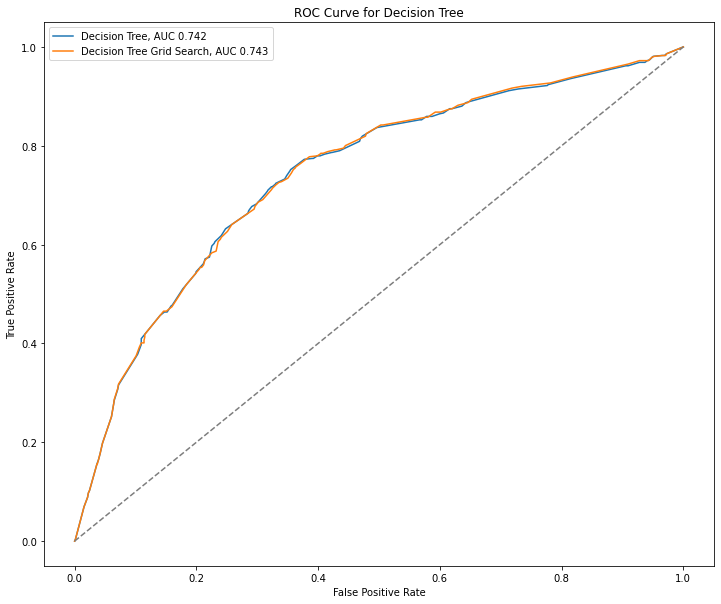

In [179]:
# Generate ROC curve for Logistic Regression: Original Model with no hyperparameter tuning is better based on AUC, but the
# Grid Search Model is not overfitted as much.
plt.subplots(1, figsize=(12,10))
plt.title('ROC Curve for Decision Tree')

plt.plot(fpr_dtree, tpr_dtree, label = 'Decision Tree, AUC {}'.format(round(auc_dtree,3)))
plt.plot(fpr_dectree_grid, tpr_dectree_grid, label = 'Decision Tree Grid Search, AUC {}'.format(round(auc_dectree_grid,3)))

plt.legend()
plt.plot([0, 1], ls="--", color = '#7D7D7D')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

In [180]:
random_grid = {'n_estimators': [25, 50, 100, 150, 200, 500, 700, 1000],
             'max_depth': [2,4,16,256,500],
             'min_samples_leaf': [2, 4, 6, 8, 10, 12, 20]}

rf_grid = RandomizedSearchCV(RandomForestClassifier(random_state = 101), random_grid, cv = 10, n_iter=50, 
                                  verbose = 10, random_state = 101, scoring = 'accuracy')

rf_grid.fit(X_important_train, y_train_shuffle)

train_pred = rf_grid.predict(X_important_train)
val_pred = rf_grid.predict(X_important_val)
test_pred = rf_grid.predict(X_important_test)

train_prob = rf_grid.predict_proba(X_important_train)
val_prob = rf_grid.predict_proba(X_important_val)
test_prob = rf_grid.predict_proba(X_important_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START max_depth=16, min_samples_leaf=4, n_estimators=50.........
[CV 1/10; 1/50] END max_depth=16, min_samples_leaf=4, n_estimators=50;, score=0.785 total time=   0.3s
[CV 2/10; 1/50] START max_depth=16, min_samples_leaf=4, n_estimators=50.........
[CV 2/10; 1/50] END max_depth=16, min_samples_leaf=4, n_estimators=50;, score=0.774 total time=   0.3s
[CV 3/10; 1/50] START max_depth=16, min_samples_leaf=4, n_estimators=50.........
[CV 3/10; 1/50] END max_depth=16, min_samples_leaf=4, n_estimators=50;, score=0.772 total time=   0.3s
[CV 4/10; 1/50] START max_depth=16, min_samples_leaf=4, n_estimators=50.........
[CV 4/10; 1/50] END max_depth=16, min_samples_leaf=4, n_estimators=50;, score=0.779 total time=   0.3s
[CV 5/10; 1/50] START max_depth=16, min_samples_leaf=4, n_estimators=50.........
[CV 5/10; 1/50] END max_depth=16, min_samples_leaf=4, n_estimators=50;, score=0.780 total time=   0.3s
[CV 6/10; 1/50] S

[CV 5/10; 5/50] END max_depth=16, min_samples_leaf=6, n_estimators=500;, score=0.779 total time=   3.3s
[CV 6/10; 5/50] START max_depth=16, min_samples_leaf=6, n_estimators=500........
[CV 6/10; 5/50] END max_depth=16, min_samples_leaf=6, n_estimators=500;, score=0.772 total time=   3.4s
[CV 7/10; 5/50] START max_depth=16, min_samples_leaf=6, n_estimators=500........
[CV 7/10; 5/50] END max_depth=16, min_samples_leaf=6, n_estimators=500;, score=0.764 total time=   3.3s
[CV 8/10; 5/50] START max_depth=16, min_samples_leaf=6, n_estimators=500........
[CV 8/10; 5/50] END max_depth=16, min_samples_leaf=6, n_estimators=500;, score=0.770 total time=   3.3s
[CV 9/10; 5/50] START max_depth=16, min_samples_leaf=6, n_estimators=500........
[CV 9/10; 5/50] END max_depth=16, min_samples_leaf=6, n_estimators=500;, score=0.772 total time=   3.3s
[CV 10/10; 5/50] START max_depth=16, min_samples_leaf=6, n_estimators=500.......
[CV 10/10; 5/50] END max_depth=16, min_samples_leaf=6, n_estimators=500;, s

[CV 10/10; 9/50] END max_depth=256, min_samples_leaf=8, n_estimators=500;, score=0.780 total time=   3.5s
[CV 1/10; 10/50] START max_depth=256, min_samples_leaf=8, n_estimators=700......
[CV 1/10; 10/50] END max_depth=256, min_samples_leaf=8, n_estimators=700;, score=0.781 total time=   4.7s
[CV 2/10; 10/50] START max_depth=256, min_samples_leaf=8, n_estimators=700......
[CV 2/10; 10/50] END max_depth=256, min_samples_leaf=8, n_estimators=700;, score=0.773 total time=   4.7s
[CV 3/10; 10/50] START max_depth=256, min_samples_leaf=8, n_estimators=700......
[CV 3/10; 10/50] END max_depth=256, min_samples_leaf=8, n_estimators=700;, score=0.776 total time=   4.8s
[CV 4/10; 10/50] START max_depth=256, min_samples_leaf=8, n_estimators=700......
[CV 4/10; 10/50] END max_depth=256, min_samples_leaf=8, n_estimators=700;, score=0.777 total time=   4.8s
[CV 5/10; 10/50] START max_depth=256, min_samples_leaf=8, n_estimators=700......
[CV 5/10; 10/50] END max_depth=256, min_samples_leaf=8, n_estimat

[CV 6/10; 14/50] END max_depth=4, min_samples_leaf=2, n_estimators=25;, score=0.716 total time=   0.0s
[CV 7/10; 14/50] START max_depth=4, min_samples_leaf=2, n_estimators=25.........
[CV 7/10; 14/50] END max_depth=4, min_samples_leaf=2, n_estimators=25;, score=0.713 total time=   0.0s
[CV 8/10; 14/50] START max_depth=4, min_samples_leaf=2, n_estimators=25.........
[CV 8/10; 14/50] END max_depth=4, min_samples_leaf=2, n_estimators=25;, score=0.704 total time=   0.0s
[CV 9/10; 14/50] START max_depth=4, min_samples_leaf=2, n_estimators=25.........
[CV 9/10; 14/50] END max_depth=4, min_samples_leaf=2, n_estimators=25;, score=0.724 total time=   0.0s
[CV 10/10; 14/50] START max_depth=4, min_samples_leaf=2, n_estimators=25........
[CV 10/10; 14/50] END max_depth=4, min_samples_leaf=2, n_estimators=25;, score=0.728 total time=   0.0s
[CV 1/10; 15/50] START max_depth=500, min_samples_leaf=2, n_estimators=1000.....
[CV 1/10; 15/50] END max_depth=500, min_samples_leaf=2, n_estimators=1000;, sco

[CV 10/10; 18/50] END max_depth=500, min_samples_leaf=2, n_estimators=700;, score=0.781 total time=   5.0s
[CV 1/10; 19/50] START max_depth=16, min_samples_leaf=20, n_estimators=25.......
[CV 1/10; 19/50] END max_depth=16, min_samples_leaf=20, n_estimators=25;, score=0.764 total time=   0.1s
[CV 2/10; 19/50] START max_depth=16, min_samples_leaf=20, n_estimators=25.......
[CV 2/10; 19/50] END max_depth=16, min_samples_leaf=20, n_estimators=25;, score=0.762 total time=   0.1s
[CV 3/10; 19/50] START max_depth=16, min_samples_leaf=20, n_estimators=25.......
[CV 3/10; 19/50] END max_depth=16, min_samples_leaf=20, n_estimators=25;, score=0.762 total time=   0.1s
[CV 4/10; 19/50] START max_depth=16, min_samples_leaf=20, n_estimators=25.......
[CV 4/10; 19/50] END max_depth=16, min_samples_leaf=20, n_estimators=25;, score=0.772 total time=   0.1s
[CV 5/10; 19/50] START max_depth=16, min_samples_leaf=20, n_estimators=25.......
[CV 5/10; 19/50] END max_depth=16, min_samples_leaf=20, n_estimators

[CV 5/10; 23/50] END max_depth=16, min_samples_leaf=2, n_estimators=500;, score=0.782 total time=   3.4s
[CV 6/10; 23/50] START max_depth=16, min_samples_leaf=2, n_estimators=500.......
[CV 6/10; 23/50] END max_depth=16, min_samples_leaf=2, n_estimators=500;, score=0.775 total time=   3.4s
[CV 7/10; 23/50] START max_depth=16, min_samples_leaf=2, n_estimators=500.......
[CV 7/10; 23/50] END max_depth=16, min_samples_leaf=2, n_estimators=500;, score=0.765 total time=   3.4s
[CV 8/10; 23/50] START max_depth=16, min_samples_leaf=2, n_estimators=500.......
[CV 8/10; 23/50] END max_depth=16, min_samples_leaf=2, n_estimators=500;, score=0.776 total time=   3.4s
[CV 9/10; 23/50] START max_depth=16, min_samples_leaf=2, n_estimators=500.......
[CV 9/10; 23/50] END max_depth=16, min_samples_leaf=2, n_estimators=500;, score=0.775 total time=   3.4s
[CV 10/10; 23/50] START max_depth=16, min_samples_leaf=2, n_estimators=500......
[CV 10/10; 23/50] END max_depth=16, min_samples_leaf=2, n_estimators=5

[CV 9/10; 27/50] END max_depth=2, min_samples_leaf=10, n_estimators=25;, score=0.653 total time=   0.0s
[CV 10/10; 27/50] START max_depth=2, min_samples_leaf=10, n_estimators=25.......
[CV 10/10; 27/50] END max_depth=2, min_samples_leaf=10, n_estimators=25;, score=0.674 total time=   0.0s
[CV 1/10; 28/50] START max_depth=4, min_samples_leaf=10, n_estimators=500.......
[CV 1/10; 28/50] END max_depth=4, min_samples_leaf=10, n_estimators=500;, score=0.721 total time=   2.2s
[CV 2/10; 28/50] START max_depth=4, min_samples_leaf=10, n_estimators=500.......
[CV 2/10; 28/50] END max_depth=4, min_samples_leaf=10, n_estimators=500;, score=0.727 total time=   2.3s
[CV 3/10; 28/50] START max_depth=4, min_samples_leaf=10, n_estimators=500.......
[CV 3/10; 28/50] END max_depth=4, min_samples_leaf=10, n_estimators=500;, score=0.720 total time=   2.3s
[CV 4/10; 28/50] START max_depth=4, min_samples_leaf=10, n_estimators=500.......
[CV 4/10; 28/50] END max_depth=4, min_samples_leaf=10, n_estimators=500

[CV 3/10; 32/50] END max_depth=2, min_samples_leaf=20, n_estimators=1000;, score=0.701 total time=   3.7s
[CV 4/10; 32/50] START max_depth=2, min_samples_leaf=20, n_estimators=1000......
[CV 4/10; 32/50] END max_depth=2, min_samples_leaf=20, n_estimators=1000;, score=0.715 total time=   3.6s
[CV 5/10; 32/50] START max_depth=2, min_samples_leaf=20, n_estimators=1000......
[CV 5/10; 32/50] END max_depth=2, min_samples_leaf=20, n_estimators=1000;, score=0.695 total time=   3.7s
[CV 6/10; 32/50] START max_depth=2, min_samples_leaf=20, n_estimators=1000......
[CV 6/10; 32/50] END max_depth=2, min_samples_leaf=20, n_estimators=1000;, score=0.696 total time=   3.9s
[CV 7/10; 32/50] START max_depth=2, min_samples_leaf=20, n_estimators=1000......
[CV 7/10; 32/50] END max_depth=2, min_samples_leaf=20, n_estimators=1000;, score=0.704 total time=   3.8s
[CV 8/10; 32/50] START max_depth=2, min_samples_leaf=20, n_estimators=1000......
[CV 8/10; 32/50] END max_depth=2, min_samples_leaf=20, n_estimato

[CV 7/10; 36/50] END max_depth=2, min_samples_leaf=4, n_estimators=200;, score=0.690 total time=   0.7s
[CV 8/10; 36/50] START max_depth=2, min_samples_leaf=4, n_estimators=200........
[CV 8/10; 36/50] END max_depth=2, min_samples_leaf=4, n_estimators=200;, score=0.677 total time=   0.6s
[CV 9/10; 36/50] START max_depth=2, min_samples_leaf=4, n_estimators=200........
[CV 9/10; 36/50] END max_depth=2, min_samples_leaf=4, n_estimators=200;, score=0.681 total time=   0.7s
[CV 10/10; 36/50] START max_depth=2, min_samples_leaf=4, n_estimators=200.......
[CV 10/10; 36/50] END max_depth=2, min_samples_leaf=4, n_estimators=200;, score=0.709 total time=   0.7s
[CV 1/10; 37/50] START max_depth=256, min_samples_leaf=10, n_estimators=25......
[CV 1/10; 37/50] END max_depth=256, min_samples_leaf=10, n_estimators=25;, score=0.778 total time=   0.1s
[CV 2/10; 37/50] START max_depth=256, min_samples_leaf=10, n_estimators=25......
[CV 2/10; 37/50] END max_depth=256, min_samples_leaf=10, n_estimators=25

[CV 1/10; 41/50] END max_depth=256, min_samples_leaf=20, n_estimators=100;, score=0.764 total time=   0.5s
[CV 2/10; 41/50] START max_depth=256, min_samples_leaf=20, n_estimators=100.....
[CV 2/10; 41/50] END max_depth=256, min_samples_leaf=20, n_estimators=100;, score=0.760 total time=   0.5s
[CV 3/10; 41/50] START max_depth=256, min_samples_leaf=20, n_estimators=100.....
[CV 3/10; 41/50] END max_depth=256, min_samples_leaf=20, n_estimators=100;, score=0.764 total time=   0.5s
[CV 4/10; 41/50] START max_depth=256, min_samples_leaf=20, n_estimators=100.....
[CV 4/10; 41/50] END max_depth=256, min_samples_leaf=20, n_estimators=100;, score=0.770 total time=   0.6s
[CV 5/10; 41/50] START max_depth=256, min_samples_leaf=20, n_estimators=100.....
[CV 5/10; 41/50] END max_depth=256, min_samples_leaf=20, n_estimators=100;, score=0.761 total time=   0.5s
[CV 6/10; 41/50] START max_depth=256, min_samples_leaf=20, n_estimators=100.....
[CV 6/10; 41/50] END max_depth=256, min_samples_leaf=20, n_e

[CV 5/10; 45/50] END max_depth=16, min_samples_leaf=12, n_estimators=1000;, score=0.769 total time=   6.5s
[CV 6/10; 45/50] START max_depth=16, min_samples_leaf=12, n_estimators=1000.....
[CV 6/10; 45/50] END max_depth=16, min_samples_leaf=12, n_estimators=1000;, score=0.764 total time=   6.6s
[CV 7/10; 45/50] START max_depth=16, min_samples_leaf=12, n_estimators=1000.....
[CV 7/10; 45/50] END max_depth=16, min_samples_leaf=12, n_estimators=1000;, score=0.762 total time=   6.6s
[CV 8/10; 45/50] START max_depth=16, min_samples_leaf=12, n_estimators=1000.....
[CV 8/10; 45/50] END max_depth=16, min_samples_leaf=12, n_estimators=1000;, score=0.764 total time=   6.6s
[CV 9/10; 45/50] START max_depth=16, min_samples_leaf=12, n_estimators=1000.....
[CV 9/10; 45/50] END max_depth=16, min_samples_leaf=12, n_estimators=1000;, score=0.765 total time=   6.8s
[CV 10/10; 45/50] START max_depth=16, min_samples_leaf=12, n_estimators=1000....
[CV 10/10; 45/50] END max_depth=16, min_samples_leaf=12, n_e

[CV 9/10; 49/50] END max_depth=16, min_samples_leaf=10, n_estimators=700;, score=0.769 total time=   4.6s
[CV 10/10; 49/50] START max_depth=16, min_samples_leaf=10, n_estimators=700.....
[CV 10/10; 49/50] END max_depth=16, min_samples_leaf=10, n_estimators=700;, score=0.774 total time=   4.8s
[CV 1/10; 50/50] START max_depth=256, min_samples_leaf=6, n_estimators=50.......
[CV 1/10; 50/50] END max_depth=256, min_samples_leaf=6, n_estimators=50;, score=0.781 total time=   0.3s
[CV 2/10; 50/50] START max_depth=256, min_samples_leaf=6, n_estimators=50.......
[CV 2/10; 50/50] END max_depth=256, min_samples_leaf=6, n_estimators=50;, score=0.772 total time=   0.3s
[CV 3/10; 50/50] START max_depth=256, min_samples_leaf=6, n_estimators=50.......
[CV 3/10; 50/50] END max_depth=256, min_samples_leaf=6, n_estimators=50;, score=0.776 total time=   0.3s
[CV 4/10; 50/50] START max_depth=256, min_samples_leaf=6, n_estimators=50.......
[CV 4/10; 50/50] END max_depth=256, min_samples_leaf=6, n_estimator

In [181]:
# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(rf.get_params())

# Get AUC Score
auc_rf_grid = roc_auc_score(y_test, test_prob[:,1])
fpr_rf_grid, tpr_rf_grid, threshold_rf_grid = roc_curve(y_test,test_prob[:,1], pos_label=1)

Train Accuracy: 0.7823533956578845
Train AUC: 0.8621089107328707

Validation Accuracy: 0.7312108559498957
Validation AUC: 0.7462683527214111

Test Accuracy: 0.7317989666510099
Test AUC: 0.7436480467911569

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


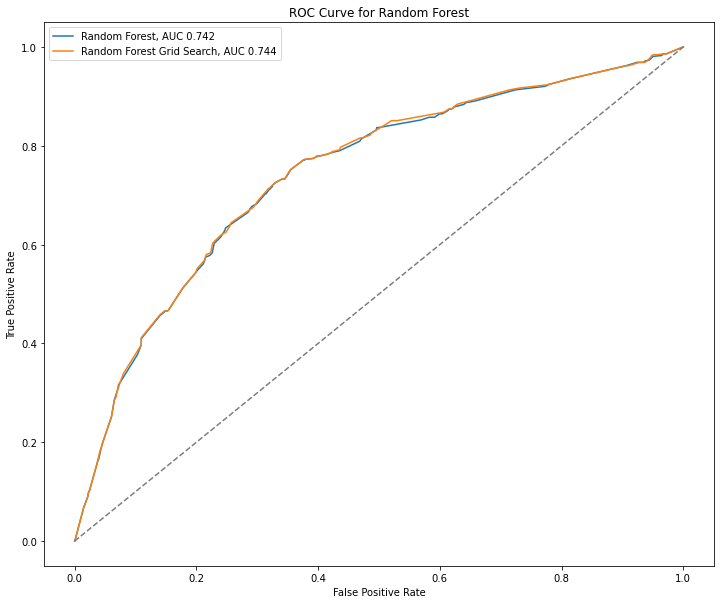

In [182]:
# Generate ROC curve for Logistic Regression: Original Model with no hyperparameter tuning is better based on AUC, but the
# Grid Search Model is not overfitted as much.
plt.subplots(1, figsize=(12,10))
plt.title('ROC Curve for Random Forest')

plt.plot(fpr_rf, tpr_rf, label = 'Random Forest, AUC {}'.format(round(auc_rf,3)))
plt.plot(fpr_rf_grid, tpr_rf_grid, label = 'Random Forest Grid Search, AUC {}'.format(round(auc_rf_grid,3)))

plt.legend()
plt.plot([0, 1], ls="--", color = '#7D7D7D')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## KNN

In [183]:
n_neighbors = [5, 7, 9, 10, 12, 15, 20, 25, 30, 45, 60, 80, 90, 100]
weights = ['uniform', 'distance']
leaf_size = [30, 45, 50, 60, 75, 100, 150]
random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'leaf_size': leaf_size}

knn_clf = KNeighborsClassifier()
knn_clf_random = RandomizedSearchCV(estimator = knn_clf, param_distributions = random_grid, 
                                    cv = 10, n_iter=50, verbose = 10, random_state = 101, scoring = 'accuracy')
knn_clf_random.fit(X_important_train, y_train_shuffle)

train_pred = knn_clf_random.predict(X_important_train)
val_pred = knn_clf_random.predict(X_important_val)
test_pred = knn_clf_random.predict(X_important_test)

train_prob = knn_clf_random.predict_proba(X_important_train)
val_prob = knn_clf_random.predict_proba(X_important_val)
test_prob = knn_clf_random.predict_proba(X_important_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START leaf_size=100, n_neighbors=15, weights=uniform............
[CV 1/10; 1/50] END leaf_size=100, n_neighbors=15, weights=uniform;, score=0.752 total time=   0.4s
[CV 2/10; 1/50] START leaf_size=100, n_neighbors=15, weights=uniform............
[CV 2/10; 1/50] END leaf_size=100, n_neighbors=15, weights=uniform;, score=0.749 total time=   0.4s
[CV 3/10; 1/50] START leaf_size=100, n_neighbors=15, weights=uniform............
[CV 3/10; 1/50] END leaf_size=100, n_neighbors=15, weights=uniform;, score=0.759 total time=   0.4s
[CV 4/10; 1/50] START leaf_size=100, n_neighbors=15, weights=uniform............
[CV 4/10; 1/50] END leaf_size=100, n_neighbors=15, weights=uniform;, score=0.758 total time=   0.4s
[CV 5/10; 1/50] START leaf_size=100, n_neighbors=15, weights=uniform............
[CV 5/10; 1/50] END leaf_size=100, n_neighbors=15, weights=uniform;, score=0.748 total time=   0.4s
[CV 6/10; 1/50] START leaf_size=

[CV 6/10; 5/50] END leaf_size=50, n_neighbors=80, weights=uniform;, score=0.720 total time=   0.4s
[CV 7/10; 5/50] START leaf_size=50, n_neighbors=80, weights=uniform.............
[CV 7/10; 5/50] END leaf_size=50, n_neighbors=80, weights=uniform;, score=0.713 total time=   0.4s
[CV 8/10; 5/50] START leaf_size=50, n_neighbors=80, weights=uniform.............
[CV 8/10; 5/50] END leaf_size=50, n_neighbors=80, weights=uniform;, score=0.721 total time=   0.4s
[CV 9/10; 5/50] START leaf_size=50, n_neighbors=80, weights=uniform.............
[CV 9/10; 5/50] END leaf_size=50, n_neighbors=80, weights=uniform;, score=0.728 total time=   0.4s
[CV 10/10; 5/50] START leaf_size=50, n_neighbors=80, weights=uniform............
[CV 10/10; 5/50] END leaf_size=50, n_neighbors=80, weights=uniform;, score=0.731 total time=   0.4s
[CV 1/10; 6/50] START leaf_size=45, n_neighbors=25, weights=uniform.............
[CV 1/10; 6/50] END leaf_size=45, n_neighbors=25, weights=uniform;, score=0.746 total time=   0.4s


[CV 2/10; 10/50] END leaf_size=30, n_neighbors=90, weights=distance;, score=0.747 total time=   0.4s
[CV 3/10; 10/50] START leaf_size=30, n_neighbors=90, weights=distance...........
[CV 3/10; 10/50] END leaf_size=30, n_neighbors=90, weights=distance;, score=0.746 total time=   0.4s
[CV 4/10; 10/50] START leaf_size=30, n_neighbors=90, weights=distance...........
[CV 4/10; 10/50] END leaf_size=30, n_neighbors=90, weights=distance;, score=0.757 total time=   0.4s
[CV 5/10; 10/50] START leaf_size=30, n_neighbors=90, weights=distance...........
[CV 5/10; 10/50] END leaf_size=30, n_neighbors=90, weights=distance;, score=0.752 total time=   0.4s
[CV 6/10; 10/50] START leaf_size=30, n_neighbors=90, weights=distance...........
[CV 6/10; 10/50] END leaf_size=30, n_neighbors=90, weights=distance;, score=0.752 total time=   0.4s
[CV 7/10; 10/50] START leaf_size=30, n_neighbors=90, weights=distance...........
[CV 7/10; 10/50] END leaf_size=30, n_neighbors=90, weights=distance;, score=0.740 total ti

[CV 7/10; 14/50] END leaf_size=150, n_neighbors=60, weights=uniform;, score=0.721 total time=   0.4s
[CV 8/10; 14/50] START leaf_size=150, n_neighbors=60, weights=uniform...........
[CV 8/10; 14/50] END leaf_size=150, n_neighbors=60, weights=uniform;, score=0.726 total time=   0.4s
[CV 9/10; 14/50] START leaf_size=150, n_neighbors=60, weights=uniform...........
[CV 9/10; 14/50] END leaf_size=150, n_neighbors=60, weights=uniform;, score=0.732 total time=   0.4s
[CV 10/10; 14/50] START leaf_size=150, n_neighbors=60, weights=uniform..........
[CV 10/10; 14/50] END leaf_size=150, n_neighbors=60, weights=uniform;, score=0.730 total time=   0.4s
[CV 1/10; 15/50] START leaf_size=75, n_neighbors=20, weights=distance...........
[CV 1/10; 15/50] END leaf_size=75, n_neighbors=20, weights=distance;, score=0.763 total time=   0.3s
[CV 2/10; 15/50] START leaf_size=75, n_neighbors=20, weights=distance...........
[CV 2/10; 15/50] END leaf_size=75, n_neighbors=20, weights=distance;, score=0.756 total t

[CV 2/10; 19/50] END leaf_size=150, n_neighbors=45, weights=uniform;, score=0.734 total time=   0.4s
[CV 3/10; 19/50] START leaf_size=150, n_neighbors=45, weights=uniform...........
[CV 3/10; 19/50] END leaf_size=150, n_neighbors=45, weights=uniform;, score=0.740 total time=   0.4s
[CV 4/10; 19/50] START leaf_size=150, n_neighbors=45, weights=uniform...........
[CV 4/10; 19/50] END leaf_size=150, n_neighbors=45, weights=uniform;, score=0.754 total time=   0.4s
[CV 5/10; 19/50] START leaf_size=150, n_neighbors=45, weights=uniform...........
[CV 5/10; 19/50] END leaf_size=150, n_neighbors=45, weights=uniform;, score=0.738 total time=   0.4s
[CV 6/10; 19/50] START leaf_size=150, n_neighbors=45, weights=uniform...........
[CV 6/10; 19/50] END leaf_size=150, n_neighbors=45, weights=uniform;, score=0.719 total time=   0.4s
[CV 7/10; 19/50] START leaf_size=150, n_neighbors=45, weights=uniform...........
[CV 7/10; 19/50] END leaf_size=150, n_neighbors=45, weights=uniform;, score=0.729 total ti

[CV 8/10; 23/50] END leaf_size=30, n_neighbors=80, weights=uniform;, score=0.719 total time=   0.4s
[CV 9/10; 23/50] START leaf_size=30, n_neighbors=80, weights=uniform............
[CV 9/10; 23/50] END leaf_size=30, n_neighbors=80, weights=uniform;, score=0.726 total time=   0.4s
[CV 10/10; 23/50] START leaf_size=30, n_neighbors=80, weights=uniform...........
[CV 10/10; 23/50] END leaf_size=30, n_neighbors=80, weights=uniform;, score=0.730 total time=   0.4s
[CV 1/10; 24/50] START leaf_size=60, n_neighbors=45, weights=uniform............
[CV 1/10; 24/50] END leaf_size=60, n_neighbors=45, weights=uniform;, score=0.734 total time=   0.4s
[CV 2/10; 24/50] START leaf_size=60, n_neighbors=45, weights=uniform............
[CV 2/10; 24/50] END leaf_size=60, n_neighbors=45, weights=uniform;, score=0.735 total time=   0.4s
[CV 3/10; 24/50] START leaf_size=60, n_neighbors=45, weights=uniform............
[CV 3/10; 24/50] END leaf_size=60, n_neighbors=45, weights=uniform;, score=0.737 total time=  

[CV 4/10; 28/50] END leaf_size=75, n_neighbors=30, weights=distance;, score=0.763 total time=   0.3s
[CV 5/10; 28/50] START leaf_size=75, n_neighbors=30, weights=distance...........
[CV 5/10; 28/50] END leaf_size=75, n_neighbors=30, weights=distance;, score=0.755 total time=   0.3s
[CV 6/10; 28/50] START leaf_size=75, n_neighbors=30, weights=distance...........
[CV 6/10; 28/50] END leaf_size=75, n_neighbors=30, weights=distance;, score=0.761 total time=   0.3s
[CV 7/10; 28/50] START leaf_size=75, n_neighbors=30, weights=distance...........
[CV 7/10; 28/50] END leaf_size=75, n_neighbors=30, weights=distance;, score=0.741 total time=   0.3s
[CV 8/10; 28/50] START leaf_size=75, n_neighbors=30, weights=distance...........
[CV 8/10; 28/50] END leaf_size=75, n_neighbors=30, weights=distance;, score=0.755 total time=   0.3s
[CV 9/10; 28/50] START leaf_size=75, n_neighbors=30, weights=distance...........
[CV 9/10; 28/50] END leaf_size=75, n_neighbors=30, weights=distance;, score=0.750 total ti

[CV 10/10; 32/50] END leaf_size=150, n_neighbors=10, weights=distance;, score=0.743 total time=   0.3s
[CV 1/10; 33/50] START leaf_size=75, n_neighbors=7, weights=uniform.............
[CV 1/10; 33/50] END leaf_size=75, n_neighbors=7, weights=uniform;, score=0.762 total time=   0.4s
[CV 2/10; 33/50] START leaf_size=75, n_neighbors=7, weights=uniform.............
[CV 2/10; 33/50] END leaf_size=75, n_neighbors=7, weights=uniform;, score=0.764 total time=   0.4s
[CV 3/10; 33/50] START leaf_size=75, n_neighbors=7, weights=uniform.............
[CV 3/10; 33/50] END leaf_size=75, n_neighbors=7, weights=uniform;, score=0.744 total time=   0.4s
[CV 4/10; 33/50] START leaf_size=75, n_neighbors=7, weights=uniform.............
[CV 4/10; 33/50] END leaf_size=75, n_neighbors=7, weights=uniform;, score=0.744 total time=   0.4s
[CV 5/10; 33/50] START leaf_size=75, n_neighbors=7, weights=uniform.............
[CV 5/10; 33/50] END leaf_size=75, n_neighbors=7, weights=uniform;, score=0.767 total time=   0.

[CV 6/10; 37/50] END leaf_size=30, n_neighbors=30, weights=uniform;, score=0.732 total time=   0.4s
[CV 7/10; 37/50] START leaf_size=30, n_neighbors=30, weights=uniform............
[CV 7/10; 37/50] END leaf_size=30, n_neighbors=30, weights=uniform;, score=0.726 total time=   0.4s
[CV 8/10; 37/50] START leaf_size=30, n_neighbors=30, weights=uniform............
[CV 8/10; 37/50] END leaf_size=30, n_neighbors=30, weights=uniform;, score=0.737 total time=   0.4s
[CV 9/10; 37/50] START leaf_size=30, n_neighbors=30, weights=uniform............
[CV 9/10; 37/50] END leaf_size=30, n_neighbors=30, weights=uniform;, score=0.736 total time=   0.4s
[CV 10/10; 37/50] START leaf_size=30, n_neighbors=30, weights=uniform...........
[CV 10/10; 37/50] END leaf_size=30, n_neighbors=30, weights=uniform;, score=0.745 total time=   0.4s
[CV 1/10; 38/50] START leaf_size=100, n_neighbors=12, weights=distance..........
[CV 1/10; 38/50] END leaf_size=100, n_neighbors=12, weights=distance;, score=0.759 total time=

[CV 1/10; 42/50] END leaf_size=75, n_neighbors=10, weights=distance;, score=0.762 total time=   0.3s
[CV 2/10; 42/50] START leaf_size=75, n_neighbors=10, weights=distance...........
[CV 2/10; 42/50] END leaf_size=75, n_neighbors=10, weights=distance;, score=0.762 total time=   0.3s
[CV 3/10; 42/50] START leaf_size=75, n_neighbors=10, weights=distance...........
[CV 3/10; 42/50] END leaf_size=75, n_neighbors=10, weights=distance;, score=0.762 total time=   0.3s
[CV 4/10; 42/50] START leaf_size=75, n_neighbors=10, weights=distance...........
[CV 4/10; 42/50] END leaf_size=75, n_neighbors=10, weights=distance;, score=0.766 total time=   0.3s
[CV 5/10; 42/50] START leaf_size=75, n_neighbors=10, weights=distance...........
[CV 5/10; 42/50] END leaf_size=75, n_neighbors=10, weights=distance;, score=0.770 total time=   0.3s
[CV 6/10; 42/50] START leaf_size=75, n_neighbors=10, weights=distance...........
[CV 6/10; 42/50] END leaf_size=75, n_neighbors=10, weights=distance;, score=0.754 total ti

[CV 7/10; 46/50] END leaf_size=30, n_neighbors=25, weights=distance;, score=0.742 total time=   0.3s
[CV 8/10; 46/50] START leaf_size=30, n_neighbors=25, weights=distance...........
[CV 8/10; 46/50] END leaf_size=30, n_neighbors=25, weights=distance;, score=0.761 total time=   0.3s
[CV 9/10; 46/50] START leaf_size=30, n_neighbors=25, weights=distance...........
[CV 9/10; 46/50] END leaf_size=30, n_neighbors=25, weights=distance;, score=0.749 total time=   0.3s
[CV 10/10; 46/50] START leaf_size=30, n_neighbors=25, weights=distance..........
[CV 10/10; 46/50] END leaf_size=30, n_neighbors=25, weights=distance;, score=0.748 total time=   0.3s
[CV 1/10; 47/50] START leaf_size=30, n_neighbors=5, weights=distance............
[CV 1/10; 47/50] END leaf_size=30, n_neighbors=5, weights=distance;, score=0.728 total time=   0.3s
[CV 2/10; 47/50] START leaf_size=30, n_neighbors=5, weights=distance............
[CV 2/10; 47/50] END leaf_size=30, n_neighbors=5, weights=distance;, score=0.753 total tim

In [184]:
# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(knn_clf_random.best_params_)

# Get AUC Score
auc_knn_random_grid = roc_auc_score(y_test, test_prob[:,1])
fpr_knn_random_grid, tpr_knn_random_grid, threshold_knn_random_grid = roc_curve(y_test,test_prob[:,1], pos_label=1)

Train Accuracy: 0.7737773313760333
Train AUC: 0.8528860419372829

Validation Accuracy: 0.7296450939457203
Validation AUC: 0.734600590080365

Test Accuracy: 0.7294504462188821
Test AUC: 0.72557650515132

{'weights': 'distance', 'n_neighbors': 20, 'leaf_size': 100}


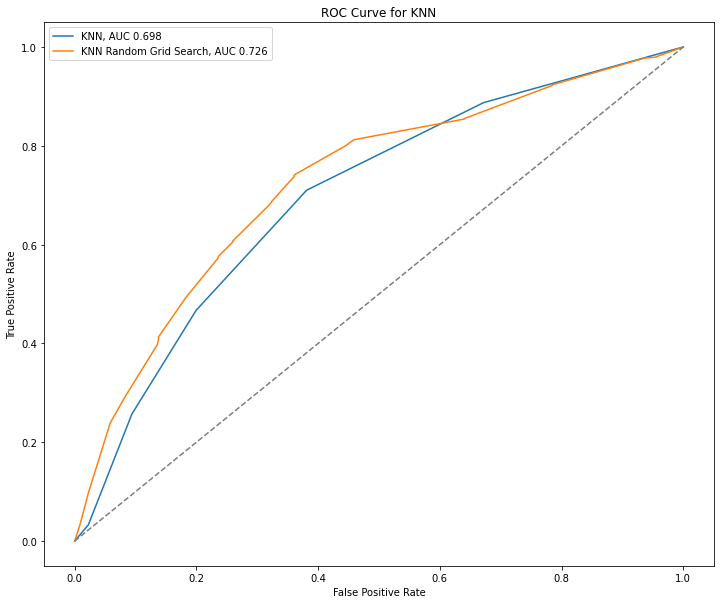

In [185]:
# Generate ROC curve for Logistic Regression: Original Model with no hyperparameter tuning is better based on AUC, but the
# Grid Search Model is not overfitted as much.
plt.subplots(1, figsize=(12,10))
plt.title('ROC Curve for KNN')

plt.plot(fpr_knn, tpr_knn, label = 'KNN, AUC {}'.format(round(auc_knn,3)))
plt.plot(fpr_knn_random_grid, tpr_knn_random_grid, label = 'KNN Random Grid Search, AUC {}'.format(round(auc_knn_random_grid,3)))

plt.legend()
plt.plot([0, 1], ls="--", color = '#7D7D7D')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost

In [186]:
random_grid = {'gamma': [round(x,2) for x in np.linspace(0,1,51)],
             'learning_rate': [0.1, 0.300000012, 0.35, 0.4, 0.5, 0.6, 0.7, 0.85, 0.9],
             'max_depth': [2, 4, 5, 7, 9, 11, 13, 15, 17], 
              'n_estimators': [100, 200, 300, 500, 600, 700, 1000, 1200,1500]}

xg_clf = XGBClassifier(random_state = 101, use_label_encoder=False, eval_metric='mlogloss')
xg_clf_random = RandomizedSearchCV(estimator = xg_clf, param_distributions = random_grid, 
                                    cv = 10, n_iter=50, verbose = 10, random_state = 101)
xg_clf_random.fit(X_important_train, y_train_shuffle)

train_pred = xg_clf_random.predict(X_important_train)
val_pred = xg_clf_random.predict(X_important_val)
test_pred = xg_clf_random.predict(X_important_test)

train_prob = xg_clf_random.predict_proba(X_important_train)
val_prob = xg_clf_random.predict_proba(X_important_val)
test_prob = xg_clf_random.predict_proba(X_important_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START gamma=0.48, learning_rate=0.6, max_depth=7, n_estimators=500
[CV 1/10; 1/50] END gamma=0.48, learning_rate=0.6, max_depth=7, n_estimators=500;, score=0.788 total time=   1.8s
[CV 2/10; 1/50] START gamma=0.48, learning_rate=0.6, max_depth=7, n_estimators=500
[CV 2/10; 1/50] END gamma=0.48, learning_rate=0.6, max_depth=7, n_estimators=500;, score=0.778 total time=   1.7s
[CV 3/10; 1/50] START gamma=0.48, learning_rate=0.6, max_depth=7, n_estimators=500
[CV 3/10; 1/50] END gamma=0.48, learning_rate=0.6, max_depth=7, n_estimators=500;, score=0.782 total time=   1.7s
[CV 4/10; 1/50] START gamma=0.48, learning_rate=0.6, max_depth=7, n_estimators=500
[CV 4/10; 1/50] END gamma=0.48, learning_rate=0.6, max_depth=7, n_estimators=500;, score=0.785 total time=   1.7s
[CV 5/10; 1/50] START gamma=0.48, learning_rate=0.6, max_depth=7, n_estimators=500
[CV 5/10; 1/50] END gamma=0.48, learning_rate=0.6, max_depth=7, n_

[CV 2/10; 5/50] END gamma=0.32, learning_rate=0.9, max_depth=11, n_estimators=1000;, score=0.777 total time=   5.3s
[CV 3/10; 5/50] START gamma=0.32, learning_rate=0.9, max_depth=11, n_estimators=1000
[CV 3/10; 5/50] END gamma=0.32, learning_rate=0.9, max_depth=11, n_estimators=1000;, score=0.782 total time=   5.0s
[CV 4/10; 5/50] START gamma=0.32, learning_rate=0.9, max_depth=11, n_estimators=1000
[CV 4/10; 5/50] END gamma=0.32, learning_rate=0.9, max_depth=11, n_estimators=1000;, score=0.786 total time=   5.1s
[CV 5/10; 5/50] START gamma=0.32, learning_rate=0.9, max_depth=11, n_estimators=1000
[CV 5/10; 5/50] END gamma=0.32, learning_rate=0.9, max_depth=11, n_estimators=1000;, score=0.785 total time=   5.2s
[CV 6/10; 5/50] START gamma=0.32, learning_rate=0.9, max_depth=11, n_estimators=1000
[CV 6/10; 5/50] END gamma=0.32, learning_rate=0.9, max_depth=11, n_estimators=1000;, score=0.779 total time=   5.5s
[CV 7/10; 5/50] START gamma=0.32, learning_rate=0.9, max_depth=11, n_estimators=

[CV 3/10; 9/50] END gamma=0.6, learning_rate=0.35, max_depth=5, n_estimators=1000;, score=0.783 total time=   2.7s
[CV 4/10; 9/50] START gamma=0.6, learning_rate=0.35, max_depth=5, n_estimators=1000
[CV 4/10; 9/50] END gamma=0.6, learning_rate=0.35, max_depth=5, n_estimators=1000;, score=0.785 total time=   2.5s
[CV 5/10; 9/50] START gamma=0.6, learning_rate=0.35, max_depth=5, n_estimators=1000
[CV 5/10; 9/50] END gamma=0.6, learning_rate=0.35, max_depth=5, n_estimators=1000;, score=0.787 total time=   2.5s
[CV 6/10; 9/50] START gamma=0.6, learning_rate=0.35, max_depth=5, n_estimators=1000
[CV 6/10; 9/50] END gamma=0.6, learning_rate=0.35, max_depth=5, n_estimators=1000;, score=0.780 total time=   2.7s
[CV 7/10; 9/50] START gamma=0.6, learning_rate=0.35, max_depth=5, n_estimators=1000
[CV 7/10; 9/50] END gamma=0.6, learning_rate=0.35, max_depth=5, n_estimators=1000;, score=0.769 total time=   2.5s
[CV 8/10; 9/50] START gamma=0.6, learning_rate=0.35, max_depth=5, n_estimators=1000
[CV 8

[CV 4/10; 13/50] END gamma=0.34, learning_rate=0.85, max_depth=13, n_estimators=1000;, score=0.785 total time=   5.4s
[CV 5/10; 13/50] START gamma=0.34, learning_rate=0.85, max_depth=13, n_estimators=1000
[CV 5/10; 13/50] END gamma=0.34, learning_rate=0.85, max_depth=13, n_estimators=1000;, score=0.788 total time=   5.1s
[CV 6/10; 13/50] START gamma=0.34, learning_rate=0.85, max_depth=13, n_estimators=1000
[CV 6/10; 13/50] END gamma=0.34, learning_rate=0.85, max_depth=13, n_estimators=1000;, score=0.779 total time=   5.4s
[CV 7/10; 13/50] START gamma=0.34, learning_rate=0.85, max_depth=13, n_estimators=1000
[CV 7/10; 13/50] END gamma=0.34, learning_rate=0.85, max_depth=13, n_estimators=1000;, score=0.770 total time=   5.7s
[CV 8/10; 13/50] START gamma=0.34, learning_rate=0.85, max_depth=13, n_estimators=1000
[CV 8/10; 13/50] END gamma=0.34, learning_rate=0.85, max_depth=13, n_estimators=1000;, score=0.782 total time=   5.5s
[CV 9/10; 13/50] START gamma=0.34, learning_rate=0.85, max_dep

[CV 5/10; 17/50] END gamma=0.34, learning_rate=0.7, max_depth=7, n_estimators=700;, score=0.788 total time=   2.3s
[CV 6/10; 17/50] START gamma=0.34, learning_rate=0.7, max_depth=7, n_estimators=700
[CV 6/10; 17/50] END gamma=0.34, learning_rate=0.7, max_depth=7, n_estimators=700;, score=0.776 total time=   2.3s
[CV 7/10; 17/50] START gamma=0.34, learning_rate=0.7, max_depth=7, n_estimators=700
[CV 7/10; 17/50] END gamma=0.34, learning_rate=0.7, max_depth=7, n_estimators=700;, score=0.769 total time=   2.3s
[CV 8/10; 17/50] START gamma=0.34, learning_rate=0.7, max_depth=7, n_estimators=700
[CV 8/10; 17/50] END gamma=0.34, learning_rate=0.7, max_depth=7, n_estimators=700;, score=0.782 total time=   2.4s
[CV 9/10; 17/50] START gamma=0.34, learning_rate=0.7, max_depth=7, n_estimators=700
[CV 9/10; 17/50] END gamma=0.34, learning_rate=0.7, max_depth=7, n_estimators=700;, score=0.776 total time=   2.3s
[CV 10/10; 17/50] START gamma=0.34, learning_rate=0.7, max_depth=7, n_estimators=700
[CV 

[CV 6/10; 21/50] END gamma=0.5, learning_rate=0.4, max_depth=5, n_estimators=700;, score=0.780 total time=   1.9s
[CV 7/10; 21/50] START gamma=0.5, learning_rate=0.4, max_depth=5, n_estimators=700
[CV 7/10; 21/50] END gamma=0.5, learning_rate=0.4, max_depth=5, n_estimators=700;, score=0.769 total time=   1.7s
[CV 8/10; 21/50] START gamma=0.5, learning_rate=0.4, max_depth=5, n_estimators=700
[CV 8/10; 21/50] END gamma=0.5, learning_rate=0.4, max_depth=5, n_estimators=700;, score=0.782 total time=   1.9s
[CV 9/10; 21/50] START gamma=0.5, learning_rate=0.4, max_depth=5, n_estimators=700
[CV 9/10; 21/50] END gamma=0.5, learning_rate=0.4, max_depth=5, n_estimators=700;, score=0.775 total time=   1.9s
[CV 10/10; 21/50] START gamma=0.5, learning_rate=0.4, max_depth=5, n_estimators=700
[CV 10/10; 21/50] END gamma=0.5, learning_rate=0.4, max_depth=5, n_estimators=700;, score=0.782 total time=   1.8s
[CV 1/10; 22/50] START gamma=0.26, learning_rate=0.4, max_depth=11, n_estimators=1200
[CV 1/10; 

[CV 6/10; 25/50] END gamma=0.42, learning_rate=0.300000012, max_depth=11, n_estimators=200;, score=0.774 total time=   1.1s
[CV 7/10; 25/50] START gamma=0.42, learning_rate=0.300000012, max_depth=11, n_estimators=200
[CV 7/10; 25/50] END gamma=0.42, learning_rate=0.300000012, max_depth=11, n_estimators=200;, score=0.769 total time=   1.0s
[CV 8/10; 25/50] START gamma=0.42, learning_rate=0.300000012, max_depth=11, n_estimators=200
[CV 8/10; 25/50] END gamma=0.42, learning_rate=0.300000012, max_depth=11, n_estimators=200;, score=0.779 total time=   1.0s
[CV 9/10; 25/50] START gamma=0.42, learning_rate=0.300000012, max_depth=11, n_estimators=200
[CV 9/10; 25/50] END gamma=0.42, learning_rate=0.300000012, max_depth=11, n_estimators=200;, score=0.776 total time=   1.0s
[CV 10/10; 25/50] START gamma=0.42, learning_rate=0.300000012, max_depth=11, n_estimators=200
[CV 10/10; 25/50] END gamma=0.42, learning_rate=0.300000012, max_depth=11, n_estimators=200;, score=0.782 total time=   1.0s
[CV 1/

[CV 7/10; 29/50] END gamma=0.62, learning_rate=0.1, max_depth=7, n_estimators=1200;, score=0.772 total time=   4.5s
[CV 8/10; 29/50] START gamma=0.62, learning_rate=0.1, max_depth=7, n_estimators=1200
[CV 8/10; 29/50] END gamma=0.62, learning_rate=0.1, max_depth=7, n_estimators=1200;, score=0.782 total time=   4.5s
[CV 9/10; 29/50] START gamma=0.62, learning_rate=0.1, max_depth=7, n_estimators=1200
[CV 9/10; 29/50] END gamma=0.62, learning_rate=0.1, max_depth=7, n_estimators=1200;, score=0.776 total time=   4.3s
[CV 10/10; 29/50] START gamma=0.62, learning_rate=0.1, max_depth=7, n_estimators=1200
[CV 10/10; 29/50] END gamma=0.62, learning_rate=0.1, max_depth=7, n_estimators=1200;, score=0.783 total time=   4.9s
[CV 1/10; 30/50] START gamma=0.7, learning_rate=0.85, max_depth=5, n_estimators=500
[CV 1/10; 30/50] END gamma=0.7, learning_rate=0.85, max_depth=5, n_estimators=500;, score=0.788 total time=   1.5s
[CV 2/10; 30/50] START gamma=0.7, learning_rate=0.85, max_depth=5, n_estimators=

[CV 8/10; 33/50] END gamma=0.1, learning_rate=0.300000012, max_depth=5, n_estimators=600;, score=0.783 total time=   1.6s
[CV 9/10; 33/50] START gamma=0.1, learning_rate=0.300000012, max_depth=5, n_estimators=600
[CV 9/10; 33/50] END gamma=0.1, learning_rate=0.300000012, max_depth=5, n_estimators=600;, score=0.775 total time=   1.6s
[CV 10/10; 33/50] START gamma=0.1, learning_rate=0.300000012, max_depth=5, n_estimators=600
[CV 10/10; 33/50] END gamma=0.1, learning_rate=0.300000012, max_depth=5, n_estimators=600;, score=0.782 total time=   1.4s
[CV 1/10; 34/50] START gamma=0.58, learning_rate=0.4, max_depth=17, n_estimators=500
[CV 1/10; 34/50] END gamma=0.58, learning_rate=0.4, max_depth=17, n_estimators=500;, score=0.788 total time=   2.6s
[CV 2/10; 34/50] START gamma=0.58, learning_rate=0.4, max_depth=17, n_estimators=500
[CV 2/10; 34/50] END gamma=0.58, learning_rate=0.4, max_depth=17, n_estimators=500;, score=0.777 total time=   2.3s
[CV 3/10; 34/50] START gamma=0.58, learning_rate

[CV 8/10; 37/50] END gamma=0.18, learning_rate=0.300000012, max_depth=5, n_estimators=500;, score=0.782 total time=   1.1s
[CV 9/10; 37/50] START gamma=0.18, learning_rate=0.300000012, max_depth=5, n_estimators=500
[CV 9/10; 37/50] END gamma=0.18, learning_rate=0.300000012, max_depth=5, n_estimators=500;, score=0.776 total time=   1.1s
[CV 10/10; 37/50] START gamma=0.18, learning_rate=0.300000012, max_depth=5, n_estimators=500
[CV 10/10; 37/50] END gamma=0.18, learning_rate=0.300000012, max_depth=5, n_estimators=500;, score=0.782 total time=   1.2s
[CV 1/10; 38/50] START gamma=0.0, learning_rate=0.6, max_depth=7, n_estimators=600
[CV 1/10; 38/50] END gamma=0.0, learning_rate=0.6, max_depth=7, n_estimators=600;, score=0.788 total time=   2.0s
[CV 2/10; 38/50] START gamma=0.0, learning_rate=0.6, max_depth=7, n_estimators=600
[CV 2/10; 38/50] END gamma=0.0, learning_rate=0.6, max_depth=7, n_estimators=600;, score=0.778 total time=   2.3s
[CV 3/10; 38/50] START gamma=0.0, learning_rate=0.6

[CV 9/10; 41/50] END gamma=0.42, learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.775 total time=   1.2s
[CV 10/10; 41/50] START gamma=0.42, learning_rate=0.5, max_depth=5, n_estimators=500
[CV 10/10; 41/50] END gamma=0.42, learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.783 total time=   1.3s
[CV 1/10; 42/50] START gamma=0.08, learning_rate=0.6, max_depth=17, n_estimators=1500
[CV 1/10; 42/50] END gamma=0.08, learning_rate=0.6, max_depth=17, n_estimators=1500;, score=0.788 total time=   7.9s
[CV 2/10; 42/50] START gamma=0.08, learning_rate=0.6, max_depth=17, n_estimators=1500
[CV 2/10; 42/50] END gamma=0.08, learning_rate=0.6, max_depth=17, n_estimators=1500;, score=0.779 total time=   7.8s
[CV 3/10; 42/50] START gamma=0.08, learning_rate=0.6, max_depth=17, n_estimators=1500
[CV 3/10; 42/50] END gamma=0.08, learning_rate=0.6, max_depth=17, n_estimators=1500;, score=0.782 total time=   8.2s
[CV 4/10; 42/50] START gamma=0.08, learning_rate=0.6, max_depth=17, n_estim

[CV 10/10; 45/50] END gamma=0.12, learning_rate=0.35, max_depth=17, n_estimators=100;, score=0.782 total time=   0.5s
[CV 1/10; 46/50] START gamma=0.32, learning_rate=0.35, max_depth=15, n_estimators=500
[CV 1/10; 46/50] END gamma=0.32, learning_rate=0.35, max_depth=15, n_estimators=500;, score=0.788 total time=   2.8s
[CV 2/10; 46/50] START gamma=0.32, learning_rate=0.35, max_depth=15, n_estimators=500
[CV 2/10; 46/50] END gamma=0.32, learning_rate=0.35, max_depth=15, n_estimators=500;, score=0.778 total time=   2.6s
[CV 3/10; 46/50] START gamma=0.32, learning_rate=0.35, max_depth=15, n_estimators=500
[CV 3/10; 46/50] END gamma=0.32, learning_rate=0.35, max_depth=15, n_estimators=500;, score=0.781 total time=   2.4s
[CV 4/10; 46/50] START gamma=0.32, learning_rate=0.35, max_depth=15, n_estimators=500
[CV 4/10; 46/50] END gamma=0.32, learning_rate=0.35, max_depth=15, n_estimators=500;, score=0.786 total time=   2.6s
[CV 5/10; 46/50] START gamma=0.32, learning_rate=0.35, max_depth=15, n

[CV 10/10; 49/50] END gamma=0.26, learning_rate=0.35, max_depth=9, n_estimators=600;, score=0.783 total time=   2.6s
[CV 1/10; 50/50] START gamma=0.22, learning_rate=0.300000012, max_depth=13, n_estimators=500
[CV 1/10; 50/50] END gamma=0.22, learning_rate=0.300000012, max_depth=13, n_estimators=500;, score=0.788 total time=   2.7s
[CV 2/10; 50/50] START gamma=0.22, learning_rate=0.300000012, max_depth=13, n_estimators=500
[CV 2/10; 50/50] END gamma=0.22, learning_rate=0.300000012, max_depth=13, n_estimators=500;, score=0.777 total time=   2.7s
[CV 3/10; 50/50] START gamma=0.22, learning_rate=0.300000012, max_depth=13, n_estimators=500
[CV 3/10; 50/50] END gamma=0.22, learning_rate=0.300000012, max_depth=13, n_estimators=500;, score=0.782 total time=   2.9s
[CV 4/10; 50/50] START gamma=0.22, learning_rate=0.300000012, max_depth=13, n_estimators=500
[CV 4/10; 50/50] END gamma=0.22, learning_rate=0.300000012, max_depth=13, n_estimators=500;, score=0.786 total time=   2.7s
[CV 5/10; 50/50

In [187]:
# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(xg_clf_random.best_params_)

# Get AUC Score
auc_xgb_random_grid = roc_auc_score(y_test, test_prob[:,1])
fpr_xgb_random_grid, tpr_xgb_random_grid, threshold_xgb_random_grid = roc_curve(y_test,test_prob[:,1], pos_label=1)

Train Accuracy: 0.7824306574982616
Train AUC: 0.862229343216036

Validation Accuracy: 0.7306889352818372
Validation AUC: 0.7452194179503144

Test Accuracy: 0.7313292625645843
Test AUC: 0.7429817736281035

{'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.9, 'gamma': 0.08}


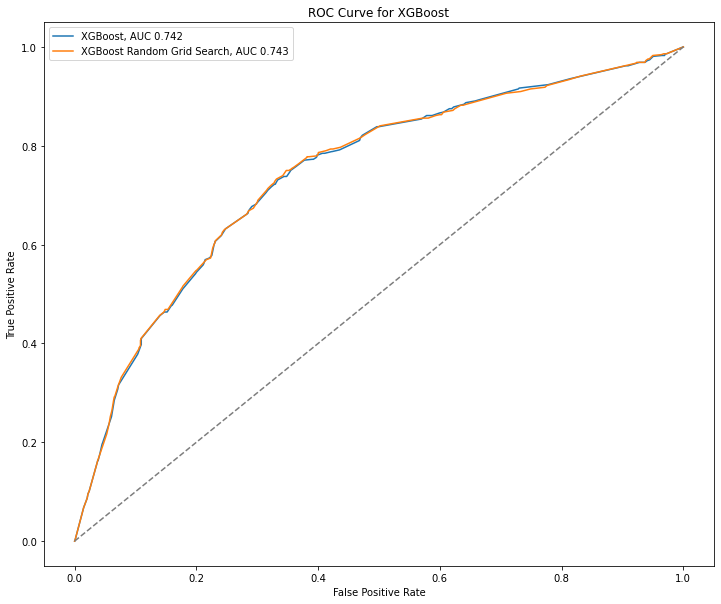

In [188]:
# Generate ROC curve to compare base model and the model with hyperparameter tuning
plt.subplots(1, figsize=(12,10))
plt.title('ROC Curve for XGBoost')

plt.plot(fpr_xgb, tpr_xgb, label = 'XGBoost, AUC {}'.format(round(auc_xgb,3)))
plt.plot(fpr_xgb_random_grid, tpr_xgb_random_grid, label = 'XGBoost Random Grid Search, AUC {}'.format(round(auc_xgb_random_grid,3)))

plt.legend()
plt.plot([0, 1], ls="--", color = '#7D7D7D')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## MLP

In [204]:
random_grid = {'hidden_layer_sizes': [(52,52,52), (100,100), (100,)],
              'batch_size': [200, 400, 600, 800, 1000, 1200, 1500],
              'learning_rate_init': [0.001, 0.01, 0.1, 1]}

mlp_clf = MLPClassifier(max_iter = 1000, random_state=101)
mlp_clf_random = RandomizedSearchCV(estimator = mlp_clf, param_distributions = random_grid, 
                                    cv = 10, n_iter=50, verbose = 10, random_state = 101)

mlp_clf_random.fit(X_important_train, y_train_shuffle)

train_pred = mlp_clf_random.predict(X_important_train)
val_pred = mlp_clf_random.predict(X_important_val)
test_pred = mlp_clf_random.predict(X_important_test)

train_prob = mlp_clf_random.predict_proba(X_important_train)
val_prob = mlp_clf_random.predict_proba(X_important_val)
test_prob = mlp_clf_random.predict_proba(X_important_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 1/10; 1/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.713 total time=   2.3s
[CV 2/10; 1/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 2/10; 1/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.714 total time=   2.0s
[CV 3/10; 1/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 3/10; 1/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.706 total time=   1.9s
[CV 4/10; 1/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 4/10; 1/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.706 total time=   2.0s
[CV 5/10; 1/50] START batch_size=600, hidden_layer_sizes=(52,

[CV 8/10; 4/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.729 total time=  20.4s
[CV 9/10; 4/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.001
[CV 9/10; 4/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.734 total time=  12.5s
[CV 10/10; 4/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.001
[CV 10/10; 4/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.737 total time=  13.5s
[CV 1/10; 5/50] START batch_size=400, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 1/10; 5/50] END batch_size=400, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.717 total time=   2.0s
[CV 2/10; 5/50] START batch_size=400, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 2/10; 5/50] END batch_size=400, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.709 total time=   2.6s
[CV 3/10; 5/50] START

[CV 7/10; 8/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=0.717 total time=   4.8s
[CV 8/10; 8/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01
[CV 8/10; 8/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=0.726 total time=   6.6s
[CV 9/10; 8/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01
[CV 9/10; 8/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=0.721 total time=   5.1s
[CV 10/10; 8/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01
[CV 10/10; 8/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=0.730 total time=   4.4s
[CV 1/10; 9/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 1/10; 9/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.730 total time=   4.4s
[CV 2/10; 9/50] START batch_si

[CV 5/10; 12/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.709 total time=   2.0s
[CV 6/10; 12/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 6/10; 12/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.710 total time=   2.8s
[CV 7/10; 12/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 7/10; 12/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.705 total time=   1.3s
[CV 8/10; 12/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 8/10; 12/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.709 total time=   2.5s
[CV 9/10; 12/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 9/10; 12/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.724 total time=   2.3s
[CV 10/10; 12/50] START batch_size=800, hidd

[CV 3/10; 16/50] END batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.711 total time=   5.0s
[CV 4/10; 16/50] START batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 4/10; 16/50] END batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.723 total time=   4.8s
[CV 5/10; 16/50] START batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 5/10; 16/50] END batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.694 total time=   4.4s
[CV 6/10; 16/50] START batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 6/10; 16/50] END batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.715 total time=   4.5s
[CV 7/10; 16/50] START batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 7/10; 16/50] END batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.711 total time=   5.9s
[CV 8/10

[CV 1/10; 20/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.713 total time=   3.1s
[CV 2/10; 20/50] START batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 2/10; 20/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.728 total time=   6.8s
[CV 3/10; 20/50] START batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 3/10; 20/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.724 total time=   4.7s
[CV 4/10; 20/50] START batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 4/10; 20/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.732 total time=   4.4s
[CV 5/10; 20/50] START batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 5/10; 20/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.708 total time=   4.0s

[CV 9/10; 23/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.729 total time=  14.4s
[CV 10/10; 23/50] START batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.001
[CV 10/10; 23/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.733 total time=  14.3s
[CV 1/10; 24/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 1/10; 24/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.499 total time=   2.1s
[CV 2/10; 24/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 2/10; 24/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.502 total time=   1.2s
[CV 3/10; 24/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 3/10; 24/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.500 total time=   1.

[CV 7/10; 27/50] END batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.698 total time=   3.9s
[CV 8/10; 27/50] START batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 8/10; 27/50] END batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.718 total time=   5.8s
[CV 9/10; 27/50] START batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 9/10; 27/50] END batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.719 total time=   4.6s
[CV 10/10; 27/50] START batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 10/10; 27/50] END batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.720 total time=   3.8s
[CV 1/10; 28/50] START batch_size=1000, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 1/10; 28/50] END batch_size=1000, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.695 total time=   2.1s


[CV 5/10; 31/50] END batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.726 total time=   6.4s
[CV 6/10; 31/50] START batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 6/10; 31/50] END batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.727 total time=   9.3s
[CV 7/10; 31/50] START batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 7/10; 31/50] END batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.736 total time=  10.9s
[CV 8/10; 31/50] START batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 8/10; 31/50] END batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.710 total time=   4.0s
[CV 9/10; 31/50] START batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 9/10; 31/50] END batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.732 total tim

[CV 3/10; 35/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.749 total time=  13.3s
[CV 4/10; 35/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 4/10; 35/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.745 total time=   7.3s
[CV 5/10; 35/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 5/10; 35/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.723 total time=   8.5s
[CV 6/10; 35/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 6/10; 35/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.738 total time=  10.0s
[CV 7/10; 35/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 7/10; 35/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.736 total time=  18.7s

[CV 1/10; 39/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.703 total time=   2.4s
[CV 2/10; 39/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 2/10; 39/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.718 total time=   3.3s
[CV 3/10; 39/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 3/10; 39/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.723 total time=   1.8s
[CV 4/10; 39/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 4/10; 39/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.713 total time=   2.0s
[CV 5/10; 39/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 5/10; 39/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.696 

[CV 9/10; 42/50] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.718 total time=   3.0s
[CV 10/10; 42/50] START batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 10/10; 42/50] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.698 total time=   3.5s
[CV 1/10; 43/50] START batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 1/10; 43/50] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.500 total time=   3.1s
[CV 2/10; 43/50] START batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 2/10; 43/50] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.576 total time=   1.7s
[CV 3/10; 43/50] START batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 3/10; 43/50] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.501 total time=   3.5s


[CV 8/10; 46/50] END batch_size=600, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.725 total time=  14.3s
[CV 9/10; 46/50] START batch_size=600, hidden_layer_sizes=(100, 100), learning_rate_init=0.001
[CV 9/10; 46/50] END batch_size=600, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.731 total time=  11.0s
[CV 10/10; 46/50] START batch_size=600, hidden_layer_sizes=(100, 100), learning_rate_init=0.001
[CV 10/10; 46/50] END batch_size=600, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.735 total time=  19.4s
[CV 1/10; 47/50] START batch_size=600, hidden_layer_sizes=(100,), learning_rate_init=1
[CV 1/10; 47/50] END batch_size=600, hidden_layer_sizes=(100,), learning_rate_init=1;, score=0.682 total time=   0.5s
[CV 2/10; 47/50] START batch_size=600, hidden_layer_sizes=(100,), learning_rate_init=1
[CV 2/10; 47/50] END batch_size=600, hidden_layer_sizes=(100,), learning_rate_init=1;, score=0.713 total time=   0.5s
[CV 3/10; 47/50] STA

[CV 7/10; 50/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.718 total time=   3.2s
[CV 8/10; 50/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 8/10; 50/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.718 total time=   3.0s
[CV 9/10; 50/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 9/10; 50/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.723 total time=   2.4s
[CV 10/10; 50/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 10/10; 50/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.714 total time=   3.5s


In [207]:
# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(mlp_clf_random.best_params_)

# Get AUC Score
auc_mlp_random_grid = roc_auc_score(y_test, test_prob[:,1])
fpr_mlp_random_grid, tpr_mlp_random_grid, threshold_mlp_random_grid = roc_curve(y_test,test_prob[:,1], pos_label=1)

Train Accuracy: 0.748358185891988
Train AUC: 0.8226262956050427

Validation Accuracy: 0.7186847599164927
Validation AUC: 0.7478759434593607

Test Accuracy: 0.7134805072804133
Test AUC: 0.7464852972740931

{'learning_rate_init': 0.01, 'hidden_layer_sizes': (100, 100), 'batch_size': 1000}


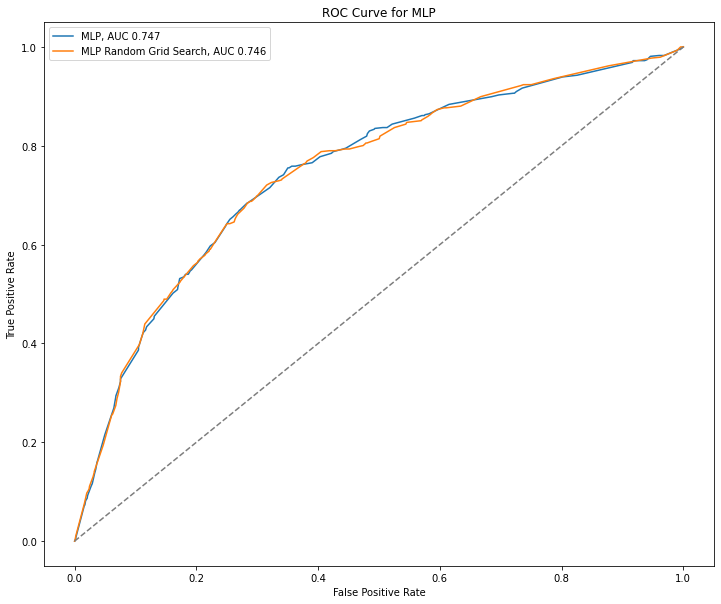

In [208]:
# Generate ROC curve to compare base model and the model with hyperparameter tuning
plt.subplots(1, figsize=(12,10))
plt.title('ROC Curve for MLP')

plt.plot(fpr_mlp, tpr_mlp, label = 'MLP, AUC {}'.format(round(auc_mlp,3)))
plt.plot(fpr_mlp_random_grid, tpr_mlp_random_grid, label = 'MLP Random Grid Search, AUC {}'.format(round(auc_mlp_random_grid,3)))

plt.legend()
plt.plot([0, 1], ls="--", color = '#7D7D7D')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVC

In [192]:
from sklearn.svm import SVC

# Recode to -1 and +1
y_train_recoded = np.where(y_train_shuffle < 1, -1.0, 1.0)
y_val_recoded = np.where(y_val < 1, -1.0, 1.0)
y_test_recoded = np.where(y_test < 1, -1.0, 1.0)

# Create an instance of SVC
random_grid = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': ['rbf', 'sigmoid']}

SVC_grid_mod = SVC(random_state=101, probability = True)
svc_random = RandomizedSearchCV(estimator = SVC_grid_mod, param_distributions = random_grid, 
                                    cv = 5, n_iter=6, verbose = 10, random_state = 101)

svc_random.fit(X_important_train, y_train_recoded)

train_pred = svc_random.predict(X_important_train)
val_pred = svc_random.predict(X_important_val)
test_pred = svc_random.predict(X_important_test)

train_prob = svc_random.decision_function(X_important_train)
val_prob = svc_random.decision_function(X_important_val)
test_prob = svc_random.decision_function(X_important_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=0.001, kernel=rbf.........................................
[CV 1/5; 1/6] END ..........C=0.001, kernel=rbf;, score=0.675 total time= 2.5min
[CV 2/5; 1/6] START C=0.001, kernel=rbf.........................................
[CV 2/5; 1/6] END ..........C=0.001, kernel=rbf;, score=0.677 total time= 2.5min
[CV 3/5; 1/6] START C=0.001, kernel=rbf.........................................
[CV 3/5; 1/6] END ..........C=0.001, kernel=rbf;, score=0.672 total time= 2.6min
[CV 4/5; 1/6] START C=0.001, kernel=rbf.........................................
[CV 4/5; 1/6] END ..........C=0.001, kernel=rbf;, score=0.678 total time= 2.5min
[CV 5/5; 1/6] START C=0.001, kernel=rbf.........................................
[CV 5/5; 1/6] END ..........C=0.001, kernel=rbf;, score=0.676 total time= 2.6min
[CV 1/5; 2/6] START C=0.01, kernel=rbf..........................................
[CV 1/5; 2/6] END ...........C=0.01, kernel=rbf;,

In [193]:
print("Train Accuracy:", accuracy_score(y_train_recoded,train_pred))
print("Train AUC:", roc_auc_score(y_train_recoded, train_prob))
print()

print("Validation Accuracy:", accuracy_score(y_val_recoded,val_pred))
print("Validation AUC:", roc_auc_score(y_val_recoded, val_prob))
print()

print("Test Accuracy:", accuracy_score(y_test_recoded,test_pred))
print("Test AUC:", roc_auc_score(y_test_recoded, test_prob))
print()

# Get Initial Logistic Regression Model Parameters
print(SVC_model.get_params())

# Get AUC Score
auc_svc_random_grid = roc_auc_score(y_test_recoded, test_prob)
fpr_svc_random_grid, tpr_svc_random_grid, threshold_svc_random_grid = roc_curve(y_test_recoded,test_prob, pos_label =1)

Train Accuracy: 0.7231708259290737
Train AUC: 0.7629324713308459

Validation Accuracy: 0.7030271398747391
Validation AUC: 0.6989702690277642

Test Accuracy: 0.7026773132926256
Test AUC: 0.7263092938398797

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 101, 'shrinking': True, 'tol': 0.001, 'verbose': False}


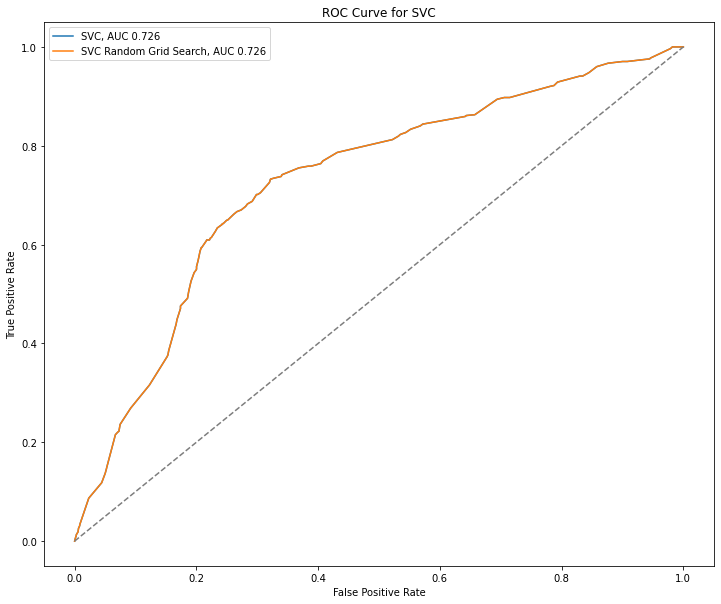

In [194]:
# Generate ROC Curve for AUC for SVC
plt.subplots(1, figsize=(12,10))
plt.title('ROC Curve for SVC')

plt.plot(fpr_svc, tpr_svc, label = 'SVC, AUC {}'.format(round(auc_svc,3)))
plt.plot(fpr_svc_random_grid, tpr_svc_random_grid, label = 'SVC Random Grid Search, AUC {}'.format(round(auc_svc_random_grid,3)))

plt.legend()
plt.plot([0, 1], ls="--", color = '#7D7D7D')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

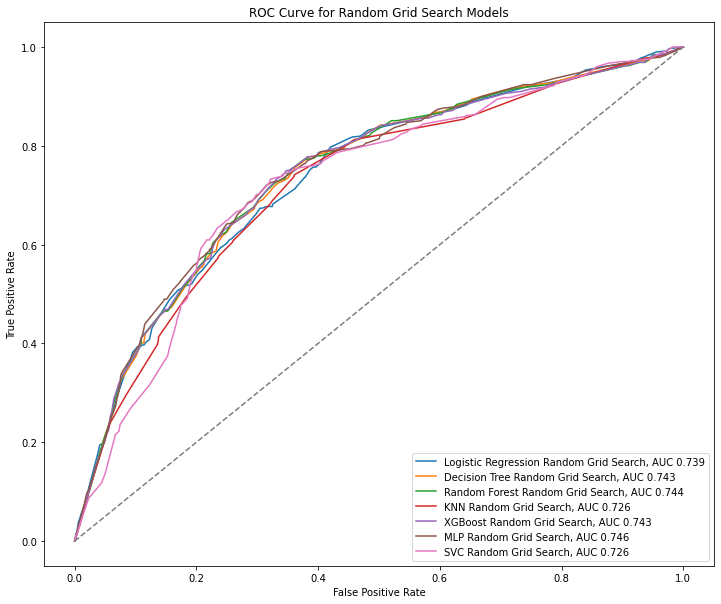

In [211]:
# Plot all AUC for Random Grid Search Models
plt.subplots(1, figsize=(12,10))
plt.title('ROC Curve for Random Grid Search Models')

plt.plot(fpr_logreg_grid, tpr_logreg_grid, label = 'Logistic Regression Random Grid Search, AUC {}'.format(round(auc_logreg_grid,3)))
plt.plot(fpr_dectree_grid, tpr_dectree_grid, label = 'Decision Tree Random Grid Search, AUC {}'.format(round(auc_dectree_grid,3)))
plt.plot(fpr_rf_grid, tpr_rf_grid, label = 'Random Forest Random Grid Search, AUC {}'.format(round(auc_rf_grid,3)))
plt.plot(fpr_knn_random_grid, tpr_knn_random_grid, label = 'KNN Random Grid Search, AUC {}'.format(round(auc_knn_random_grid,3)))
plt.plot(fpr_xgb_random_grid, tpr_xgb_random_grid, label = 'XGBoost Random Grid Search, AUC {}'.format(round(auc_xgb_random_grid,3)))
plt.plot(fpr_mlp_random_grid, tpr_mlp_random_grid, label = 'MLP Random Grid Search, AUC {}'.format(round(auc_mlp_random_grid,3)))
plt.plot(fpr_svc_random_grid, tpr_svc_random_grid, label = 'SVC Random Grid Search, AUC {}'.format(round(auc_svc_random_grid,3)))

plt.legend(loc = 'lower right')
plt.plot([0, 1], ls="--", color = '#7D7D7D')
plt.ylabel('True Positive Rate', labelpad = 20, size = 18)
plt.xlabel('False Positive Rate')
plt.show()

# PCA

In [1357]:
# Create PCA instance and then fit and transform
pca = PCA(n_components=7)

pca.fit(X_train_shuffle, y_train_shuffle)

X_train_pca = pca.transform(X_train_shuffle)
X_val_pca = pca.transform(X_val_scaled)
test_pca = pca.transform(test_scaled)

print('Original Components: {}'.format(X_train_shuffle.shape[1]))
print('Number of Components from PCA: {}'.format(pca.n_components_))


Original Components: 73
Number of Components from PCA: 7


## PCA - Logistic Regression

In [1358]:
logreg = LogisticRegression(max_iter=1000, random_state = 101, class_weight='balanced')
logreg.fit(X_train_pca, y_train_shuffle)

train_pred = logreg.predict(X_train_pca)
val_pred = logreg.predict(X_val_pca)
test_pred = logreg.predict(test_pca)

train_prob = logreg.predict_proba(X_train_pca)
val_prob = logreg.predict_proba(X_val_pca)
test_prob = logreg.predict_proba(test_pca)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(logreg.get_params())

# Get components to plot the curve
auc_logreg_pca = roc_auc_score(y_test, test_prob[:,1])
fpr_logreg_pca, tpr_logreg_pca, threshold_logreg_pca = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
logreg_pca_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.6536738005099282
Train AUC: 0.7096806238592455

Validation Accuracy: 0.6957202505219207
Validation AUC: 0.7075952479326819

Test Accuracy: 0.7050258337247534
Test AUC: 0.7127457161765758

{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 101, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## PCA - Decision Tree

In [1359]:
d_tree = DecisionTreeClassifier(random_state = 101, class_weight='balanced')
d_tree.fit(X_train_pca, y_train_shuffle)

train_pred = d_tree.predict(X_train_pca)
val_pred = d_tree.predict(X_val_pca)
test_pred = d_tree.predict(test_pca)

train_prob = d_tree.predict_proba(X_train_pca)
val_prob = d_tree.predict_proba(X_val_pca)
test_prob = d_tree.predict_proba(test_pca)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(d_tree.get_params())

# Get AUC Score
auc_dtree_pca = roc_auc_score(y_test, test_prob[:,1])
fpr_dtree_pca, tpr_dtree_pca, threshold_dtree_pca = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
detree_pca_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.87611063895542
Train AUC: 0.9569710884856164

Validation Accuracy: 0.7192066805845512
Validation AUC: 0.6659550107366694

Test Accuracy: 0.709722874589009
Test AUC: 0.6601855950847821

{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 101, 'splitter': 'best'}


## PCA - Random Forest

In [1360]:
rf = RandomForestClassifier(random_state = 101, class_weight='balanced')
rf.fit(X_train_pca, y_train_shuffle)

train_pred = rf.predict(X_train_pca)
val_pred = rf.predict(X_val_pca)
test_pred = rf.predict(test_pca)

train_prob = rf.predict_proba(X_train_pca)
val_prob = rf.predict_proba(X_val_pca)
test_prob = rf.predict_proba(test_pca)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(rf.get_params())

# Get AUC Score
auc_rf_pca = roc_auc_score(y_test, test_prob[:,1])
fpr_rf_pca, tpr_rf_pca, threshold_rf_pca = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
rf_pca_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.87611063895542
Train AUC: 0.9483554083339004

Validation Accuracy: 0.7353862212943633
Validation AUC: 0.7242167177798081

Test Accuracy: 0.7242837012682011
Test AUC: 0.7206728017457252

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


## PCA - KNN

In [1361]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_pca, y_train_shuffle)

train_pred = knn_clf.predict(X_train_pca)
val_pred = knn_clf.predict(X_val_pca)
test_pred = knn_clf.predict(test_pca)

train_prob = knn_clf.predict_proba(X_train_pca)
val_prob = knn_clf.predict_proba(X_val_pca)
test_prob = knn_clf.predict_proba(test_pca)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(knn_clf.get_params())

# Get AUC Score
auc_knn_pca = roc_auc_score(y_test, test_prob[:,1])
fpr_knn_pca, tpr_knn_pca, threshold_knn_pca = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
knn_pca_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.8046434366066599
Train AUC: 0.8820660983729891

Validation Accuracy: 0.697286012526096
Validation AUC: 0.7035006197589633

Test Accuracy: 0.6914044152184124
Test AUC: 0.7125372263361236

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


## PCA - XGBoost

In [1362]:
xg_clf = XGBClassifier(random_state = 101, use_label_encoder=False, eval_metric='mlogloss')
xg_clf.fit(X_train_pca, y_train_shuffle)

train_pred = xg_clf.predict(X_train_pca)
val_pred = xg_clf.predict(X_val_pca)
test_pred = xg_clf.predict(test_pca)

train_prob = xg_clf.predict_proba(X_train_pca)
val_prob = xg_clf.predict_proba(X_val_pca)
test_prob = xg_clf.predict_proba(test_pca)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(xg_clf.get_params())

# Get AUC Score
auc_xgb_pca = roc_auc_score(y_test, test_prob[:,1])
fpr_xgb_pca, tpr_xgb_pca, threshold_xgb_pca = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
xgb_pca_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.8107471219964459
Train AUC: 0.887119525953391

Validation Accuracy: 0.7353862212943633
Validation AUC: 0.7464269295453355

Test Accuracy: 0.7275716298731799
Test AUC: 0.7498194578593405

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 16, 'num_parallel_tree': 1, 'random_state': 101, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'eval_metric': 'mlogloss'}


## PCA - MLP

In [1363]:
mlp_clf = MLPClassifier(max_iter = 1000, random_state=101)

mlp_clf.fit(X_train_pca, y_train_shuffle)

train_pred = mlp_clf.predict(X_train_pca)
val_pred = mlp_clf.predict(X_val_pca)
test_pred = mlp_clf.predict(test_pca)

train_prob = mlp_clf.predict_proba(X_train_pca)
val_prob = mlp_clf.predict_proba(X_val_pca)
test_prob = mlp_clf.predict_proba(test_pca)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(mlp_clf.get_params())

# Get AUC Score
auc_mlp_pca = roc_auc_score(y_test, test_prob[:,1])
fpr_mlp_pca, tpr_mlp_pca, threshold_mlp_pca = roc_curve(y_test,test_prob[:,1], pos_label=1)

# Obtain recall score for TEST
mlp_pca_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.6998763810553967
Train AUC: 0.7611949484688953

Validation Accuracy: 0.7134655532359081
Validation AUC: 0.7603154951379473

Test Accuracy: 0.6993893846876468
Test AUC: 0.7573133540817057

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 101, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


## PCA - SVM

In [1364]:
from sklearn.svm import SVC

# Recode to -1 and +1
y_train_recoded = np.where(y_train_shuffle < 1, -1.0, 1.0)
y_val_recoded = np.where(y_val < 1, -1.0, 1.0)
y_test_recoded = np.where(y_test < 1, -1.0, 1.0)

# Create an instance of SVC
SVC_model = SVC(random_state=101)
SVC_model.fit(X_train_pca, y_train_recoded)

train_pred = SVC_model.predict(X_train_pca)
val_pred = SVC_model.predict(X_val_pca)
test_pred = SVC_model.predict(test_pca)

train_prob = SVC_model.decision_function(X_train_pca)
val_prob = SVC_model.decision_function(X_val_pca)
test_prob = SVC_model.decision_function(test_pca)

print("Train Accuracy:", accuracy_score(y_train_recoded,train_pred))
print("Train AUC:", roc_auc_score(y_train_recoded, train_prob))
print()

print("Validation Accuracy:", accuracy_score(y_val_recoded,val_pred))
print("Validation AUC:", roc_auc_score(y_val_recoded, val_prob))
print()

print("Test Accuracy:", accuracy_score(y_test_recoded,test_pred))
print("Test AUC:", roc_auc_score(y_test_recoded, test_prob))
print()

# Get Initial Logistic Regression Model Parameters
print(SVC_model.get_params())

# Get AUC Score
auc_svc_pca = roc_auc_score(y_test_recoded, test_prob)
fpr_svc_pca, tpr_svc_pca, threshold_svc_pca = roc_curve(y_test_recoded,test_prob, pos_label =1)

# Obtain recall score for TEST
svm_pca_recall = recall_score(y_test_recoded, test_pred)

Train Accuracy: 0.6925751371397667
Train AUC: 0.7461108112917664

Validation Accuracy: 0.7134655532359081
Validation AUC: 0.7461985207255545

Test Accuracy: 0.7172381399718177
Test AUC: 0.7469173687128854

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 101, 'shrinking': True, 'tol': 0.001, 'verbose': False}


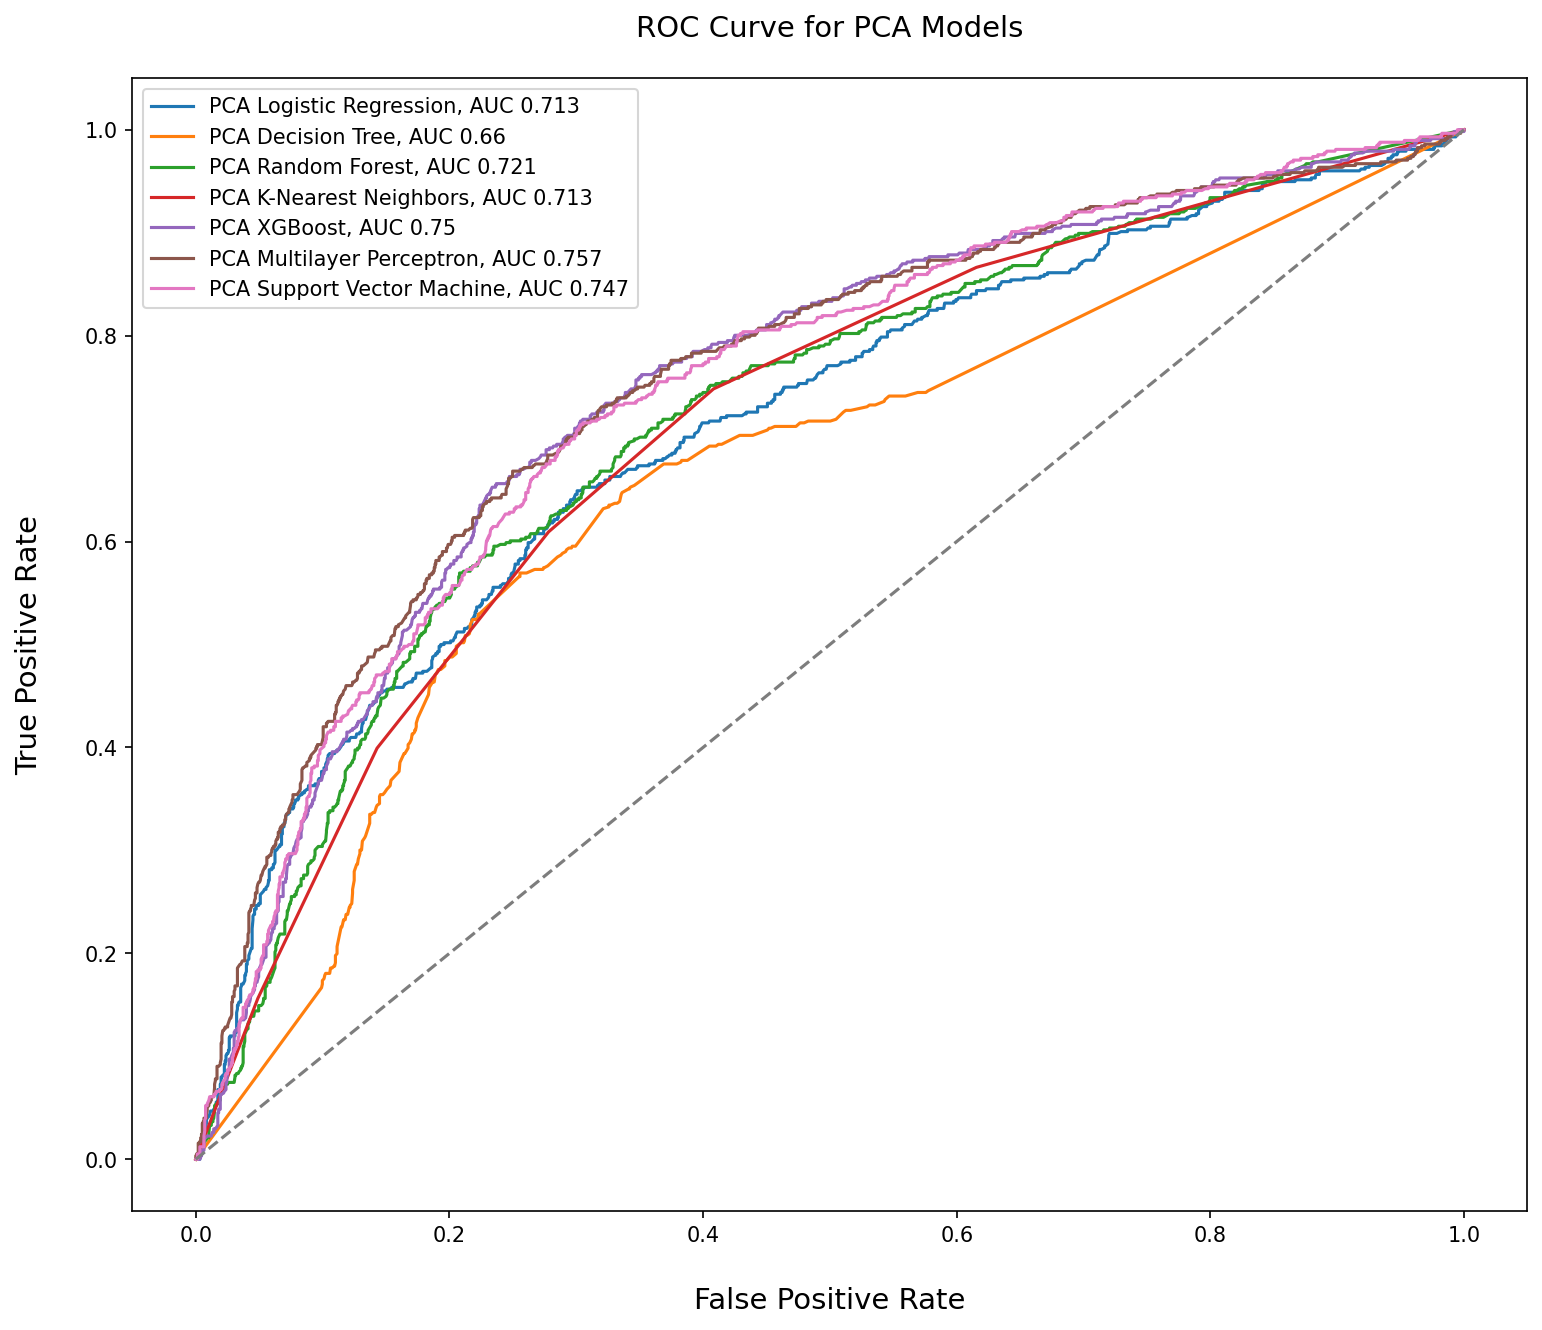

In [1382]:
# Generate ROC curve for pca fits
plt.subplots(1, figsize=(12,10), dpi = 150)
plt.title('ROC Curve for PCA Models', size = 14, pad = 20)

plt.plot(fpr_logreg_pca, tpr_logreg_pca, label = 'PCA Logistic Regression, AUC {}'.format(round(auc_logreg_pca,3)))
plt.plot(fpr_dtree_pca, tpr_dtree_pca, label = 'PCA Decision Tree, AUC {}'.format(round(auc_dtree_pca,3)))
plt.plot(fpr_rf_pca, tpr_rf_pca, label = 'PCA Random Forest, AUC {}'.format(round(auc_rf_pca,3)))
plt.plot(fpr_knn_pca, tpr_knn_pca, label = 'PCA K-Nearest Neighbors, AUC {}'.format(round(auc_knn_pca,3)))
plt.plot(fpr_xgb_pca, tpr_xgb_pca, label = 'PCA XGBoost, AUC {}'.format(round(auc_xgb_pca,3)))
plt.plot(fpr_mlp_pca, tpr_mlp_pca, label = 'PCA Multilayer Perceptron, AUC {}'.format(round(auc_mlp_pca,3)))
plt.plot(fpr_svc_pca, tpr_svc_pca, label = 'PCA Support Vector Machine, AUC {}'.format(round(auc_svc_pca,3)))

plt.legend()
plt.plot([0, 1], ls="--", color = '#7D7D7D')
plt.ylabel('True Positive Rate', size = 14, labelpad = 20)
plt.xlabel('False Positive Rate', size = 14, labelpad = 20)

plt.savefig('auc_curve_pca_models.jpeg', dpi = 500, pad_inches = 0.25)
plt.show()

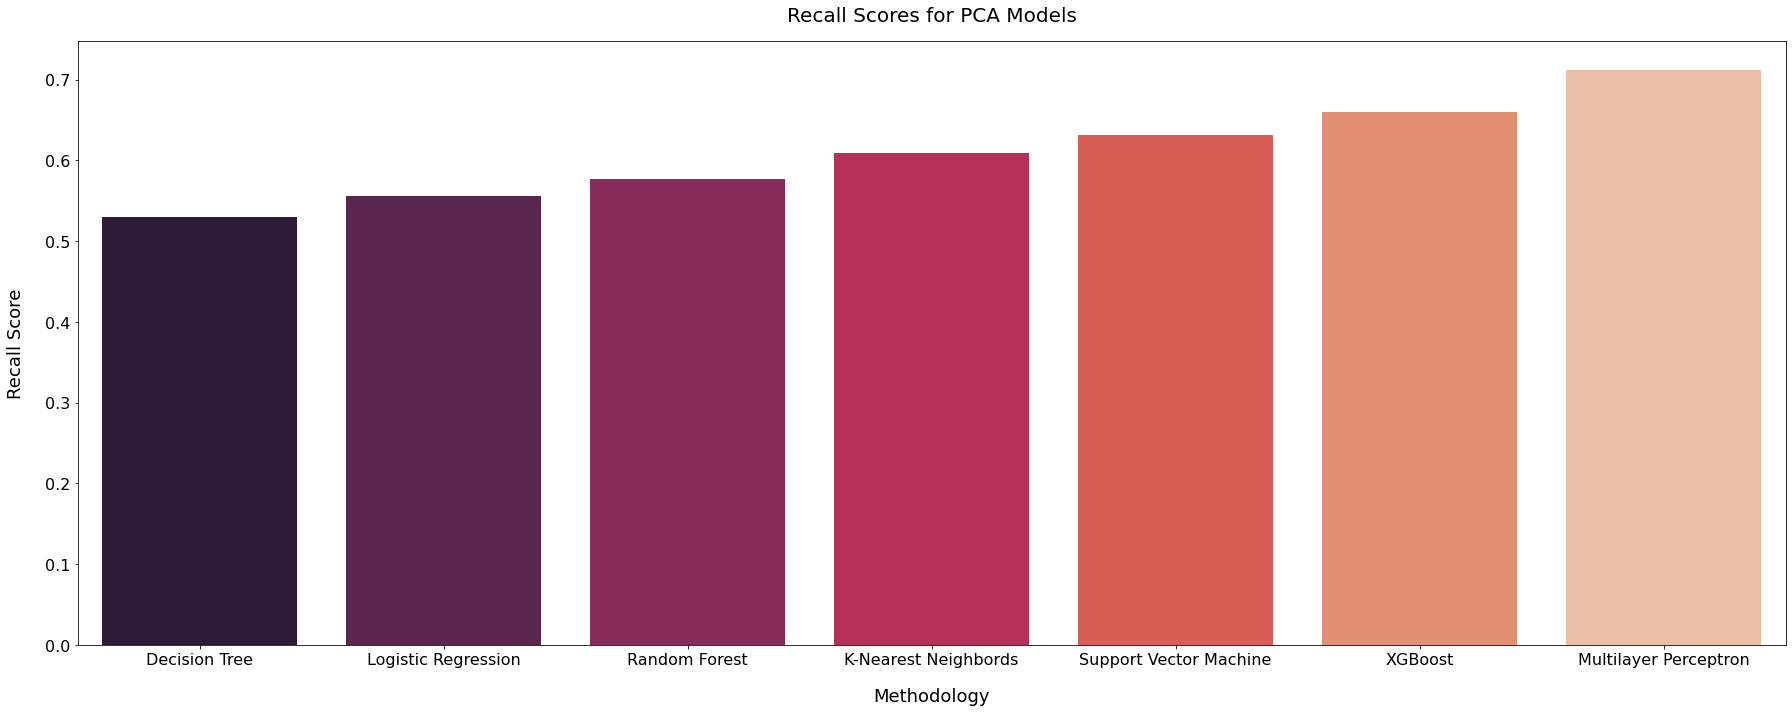

In [1366]:
from sklearn.metrics import recall_score

methods = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbords', 'XGBoost', 
           'Multilayer Perceptron', 'Support Vector Machine']
all_recall_scores_pca_models = [logreg_pca_recall, detree_pca_recall, 
                                 rf_pca_recall, knn_pca_recall, xgb_pca_recall, 
                                 mlp_pca_recall, svm_pca_recall]

recall_df_pca = pd.DataFrame([methods, all_recall_scores_pca_models]).transpose()
recall_df_pca.columns = ['Methodology', 'Recall']

recall_df_pca.sort_values(by = 'Recall', inplace = True)

plt.figure(figsize = (25,10))
sns.barplot(x = 'Methodology', y = 'Recall', data = recall_df_pca, palette='rocket')
plt.title("Recall Scores for PCA Models", pad=20, size = 20)
plt.xlabel('Methodology', size = 18, labelpad = 20)
plt.ylabel('Recall Score', size = 18, labelpad = 20)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.tight_layout()
plt.savefig('recall_scores_pca_models.jpeg', dpi = 500, pad_inches = 0.5)
plt.show()

In [1367]:
recall_df_pca

Methodology    Recall
1           Decision Tree  0.529514
0     Logistic Regression  0.555556
2           Random Forest  0.576389
3    K-Nearest Neighbords  0.609375
6  Support Vector Machine  0.631944
4                 XGBoost  0.659722
5   Multilayer Perceptron  0.711806

# MLP

## Original Fit

In [1370]:
mlp_clf = MLPClassifier(max_iter = 1000, random_state=101)

mlp_clf.fit(X_important_train, y_train_shuffle)

train_pred = mlp_clf.predict(X_important_train)
val_pred = mlp_clf.predict(X_important_val)
test_pred = mlp_clf.predict(X_important_test)

train_prob = mlp_clf.predict_proba(X_important_train)
val_prob = mlp_clf.predict_proba(X_important_val)
test_prob = mlp_clf.predict_proba(X_important_test)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(mlp_clf.get_params())

# Get AUC Score
auc_mlp = roc_auc_score(y_test, test_prob[:,1])
fpr_mlp, tpr_mlp, threshold_mlp = roc_curve(y_test,test_prob[:,1], pos_label=1)

mlp_base_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.7316696283705478
Train AUC: 0.799414950637098

Validation Accuracy: 0.7124217118997912
Validation AUC: 0.748793943238226

Test Accuracy: 0.7172381399718177
Test AUC: 0.7466272715890392

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 101, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


## Random Grid Search

In [241]:
random_grid = {'hidden_layer_sizes': [(52,52,52), (100,100), (100,)],
              'batch_size': [200, 400, 600, 800, 1000, 1200, 1500],
              'learning_rate_init': [0.001, 0.01, 0.1, 1]}

mlp_clf = MLPClassifier(max_iter = 1000, random_state=101)
mlp_clf_random = RandomizedSearchCV(estimator = mlp_clf, param_distributions = random_grid, 
                                    cv = 10, n_iter=50, verbose = 10, random_state = 101)

mlp_clf_random.fit(X_important_train, y_train_shuffle)

train_pred = mlp_clf_random.predict(X_important_train)
val_pred = mlp_clf_random.predict(X_important_val)
test_pred = mlp_clf_random.predict(X_important_test)

train_prob = mlp_clf_random.predict_proba(X_important_train)
val_prob = mlp_clf_random.predict_proba(X_important_val)
test_prob = mlp_clf_random.predict_proba(X_important_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 1/10; 1/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.713 total time=   2.2s
[CV 2/10; 1/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 2/10; 1/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.714 total time=   2.0s
[CV 3/10; 1/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 3/10; 1/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.706 total time=   1.8s
[CV 4/10; 1/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 4/10; 1/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.706 total time=   1.9s
[CV 5/10; 1/50] START batch_size=600, hidden_layer_sizes=(52,

[CV 8/10; 4/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.729 total time=  22.8s
[CV 9/10; 4/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.001
[CV 9/10; 4/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.734 total time=  13.7s
[CV 10/10; 4/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.001
[CV 10/10; 4/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.737 total time=  14.8s
[CV 1/10; 5/50] START batch_size=400, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 1/10; 5/50] END batch_size=400, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.717 total time=   1.9s
[CV 2/10; 5/50] START batch_size=400, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 2/10; 5/50] END batch_size=400, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.709 total time=   2.5s
[CV 3/10; 5/50] START

[CV 7/10; 8/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=0.717 total time=   5.0s
[CV 8/10; 8/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01
[CV 8/10; 8/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=0.726 total time=   6.8s
[CV 9/10; 8/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01
[CV 9/10; 8/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=0.721 total time=   4.6s
[CV 10/10; 8/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01
[CV 10/10; 8/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.01;, score=0.730 total time=   4.2s
[CV 1/10; 9/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 1/10; 9/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.730 total time=   4.2s
[CV 2/10; 9/50] START batch_si

[CV 5/10; 12/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.709 total time=   2.1s
[CV 6/10; 12/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 6/10; 12/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.710 total time=   3.2s
[CV 7/10; 12/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 7/10; 12/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.705 total time=   1.4s
[CV 8/10; 12/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 8/10; 12/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.709 total time=   2.7s
[CV 9/10; 12/50] START batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1
[CV 9/10; 12/50] END batch_size=800, hidden_layer_sizes=(100,), learning_rate_init=0.1;, score=0.724 total time=   2.6s
[CV 10/10; 12/50] START batch_size=800, hidd

[CV 3/10; 16/50] END batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.711 total time=   4.9s
[CV 4/10; 16/50] START batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 4/10; 16/50] END batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.723 total time=   4.8s
[CV 5/10; 16/50] START batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 5/10; 16/50] END batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.694 total time=   4.6s
[CV 6/10; 16/50] START batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 6/10; 16/50] END batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.715 total time=   5.3s
[CV 7/10; 16/50] START batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 7/10; 16/50] END batch_size=200, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.711 total time=   6.2s
[CV 8/10

[CV 1/10; 20/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.713 total time=   3.3s
[CV 2/10; 20/50] START batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 2/10; 20/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.728 total time=   7.3s
[CV 3/10; 20/50] START batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 3/10; 20/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.724 total time=   5.3s
[CV 4/10; 20/50] START batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 4/10; 20/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.732 total time=   4.4s
[CV 5/10; 20/50] START batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 5/10; 20/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.708 total time=   3.8s

[CV 9/10; 23/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.729 total time=  13.9s
[CV 10/10; 23/50] START batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.001
[CV 10/10; 23/50] END batch_size=1000, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.733 total time=  14.2s
[CV 1/10; 24/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 1/10; 24/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.499 total time=   2.1s
[CV 2/10; 24/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 2/10; 24/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.502 total time=   1.2s
[CV 3/10; 24/50] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 3/10; 24/50] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.500 total time=   1.

[CV 7/10; 27/50] END batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.698 total time=   3.5s
[CV 8/10; 27/50] START batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 8/10; 27/50] END batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.718 total time=   5.2s
[CV 9/10; 27/50] START batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 9/10; 27/50] END batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.719 total time=   4.4s
[CV 10/10; 27/50] START batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1
[CV 10/10; 27/50] END batch_size=800, hidden_layer_sizes=(100, 100), learning_rate_init=0.1;, score=0.720 total time=   3.3s
[CV 1/10; 28/50] START batch_size=1000, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 1/10; 28/50] END batch_size=1000, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.695 total time=   2.0s


[CV 5/10; 31/50] END batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.726 total time=   6.6s
[CV 6/10; 31/50] START batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 6/10; 31/50] END batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.727 total time=  10.2s
[CV 7/10; 31/50] START batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 7/10; 31/50] END batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.736 total time=  11.8s
[CV 8/10; 31/50] START batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 8/10; 31/50] END batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.710 total time=   4.3s
[CV 9/10; 31/50] START batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 9/10; 31/50] END batch_size=1200, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.732 total tim

[CV 3/10; 35/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.749 total time=  17.8s
[CV 4/10; 35/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 4/10; 35/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.745 total time=   8.3s
[CV 5/10; 35/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 5/10; 35/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.723 total time=   7.4s
[CV 6/10; 35/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 6/10; 35/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.738 total time=  10.1s
[CV 7/10; 35/50] START batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01
[CV 7/10; 35/50] END batch_size=400, hidden_layer_sizes=(100, 100), learning_rate_init=0.01;, score=0.736 total time=  18.7s

[CV 1/10; 39/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.703 total time=   1.9s
[CV 2/10; 39/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 2/10; 39/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.718 total time=   2.4s
[CV 3/10; 39/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 3/10; 39/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.723 total time=   1.6s
[CV 4/10; 39/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 4/10; 39/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.713 total time=   1.7s
[CV 5/10; 39/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 5/10; 39/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.696 

[CV 9/10; 42/50] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.718 total time=   2.2s
[CV 10/10; 42/50] START batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 10/10; 42/50] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.698 total time=   3.1s
[CV 1/10; 43/50] START batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 1/10; 43/50] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.500 total time=   2.8s
[CV 2/10; 43/50] START batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 2/10; 43/50] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.576 total time=   1.4s
[CV 3/10; 43/50] START batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1
[CV 3/10; 43/50] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=1;, score=0.501 total time=   2.4s


[CV 8/10; 46/50] END batch_size=600, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.725 total time=  15.1s
[CV 9/10; 46/50] START batch_size=600, hidden_layer_sizes=(100, 100), learning_rate_init=0.001
[CV 9/10; 46/50] END batch_size=600, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.731 total time=  12.4s
[CV 10/10; 46/50] START batch_size=600, hidden_layer_sizes=(100, 100), learning_rate_init=0.001
[CV 10/10; 46/50] END batch_size=600, hidden_layer_sizes=(100, 100), learning_rate_init=0.001;, score=0.735 total time=  20.0s
[CV 1/10; 47/50] START batch_size=600, hidden_layer_sizes=(100,), learning_rate_init=1
[CV 1/10; 47/50] END batch_size=600, hidden_layer_sizes=(100,), learning_rate_init=1;, score=0.682 total time=   0.5s
[CV 2/10; 47/50] START batch_size=600, hidden_layer_sizes=(100,), learning_rate_init=1
[CV 2/10; 47/50] END batch_size=600, hidden_layer_sizes=(100,), learning_rate_init=1;, score=0.713 total time=   0.5s
[CV 3/10; 47/50] STA

[CV 7/10; 50/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.718 total time=   3.6s
[CV 8/10; 50/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 8/10; 50/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.718 total time=   3.4s
[CV 9/10; 50/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 9/10; 50/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.723 total time=   2.7s
[CV 10/10; 50/50] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 10/10; 50/50] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.714 total time=   3.4s


In [242]:
# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(mlp_clf_random.best_params_)

# Get AUC Score
auc_mlp_random_grid = roc_auc_score(y_test, test_prob[:,1])
fpr_mlp_random_grid, tpr_mlp_random_grid, threshold_mlp_random_grid = roc_curve(y_test,test_prob[:,1], pos_label=1)

#{'learning_rate_init': 0.001, 'hidden_layer_sizes': (52, 52, 52), 'batch_size': 200}

Train Accuracy: 0.748358185891988
Train AUC: 0.8226262956050427

Validation Accuracy: 0.7186847599164927
Validation AUC: 0.7478759434593607

Test Accuracy: 0.7134805072804133
Test AUC: 0.7464852972740931

{'learning_rate_init': 0.01, 'hidden_layer_sizes': (100, 100), 'batch_size': 1000}


In [1371]:
# Fit best parameters for MLP Random Grid Search
mlp_clf = MLPClassifier(max_iter = 1000, random_state=101, learning_rate_init=0.01, 
                        hidden_layer_sizes = (100,100), batch_size=1000)

mlp_clf.fit(X_important_train, y_train_shuffle)

train_pred = mlp_clf.predict(X_important_train)
val_pred = mlp_clf.predict(X_important_val)
test_pred = mlp_clf.predict(X_important_test)

train_prob = mlp_clf.predict_proba(X_important_train)
val_prob = mlp_clf.predict_proba(X_important_val)
test_prob = mlp_clf.predict_proba(X_important_test)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

print(mlp_clf.get_params())

# Get AUC Score
auc_mlp_rgrid_best = roc_auc_score(y_test, test_prob[:,1])
fpr_mlp_rgrid_best, tpr_mlp_rgrid_best, threshold_mlp_rgrid_best = roc_curve(y_test,test_prob[:,1], pos_label=1)

mlp_rgrid_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.748358185891988
Train AUC: 0.8226262956050427

Validation Accuracy: 0.7186847599164927
Validation AUC: 0.7478759434593607

Test Accuracy: 0.7134805072804133
Test AUC: 0.7464852972740931

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 1000, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 101, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


## PCA

In [ ]:
mlp_clf = MLPClassifier(max_iter = 1000, random_state=101)

mlp_clf.fit(X_train_pca, y_train_shuffle)

train_pred = mlp_clf.predict(X_train_pca)
val_pred = mlp_clf.predict(X_val_pca)
test_pred = mlp_clf.predict(test_pca)

train_prob = mlp_clf.predict_proba(X_train_pca)
val_prob = mlp_clf.predict_proba(X_val_pca)
test_prob = mlp_clf.predict_proba(test_pca)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(mlp_clf.get_params())

# Get AUC Score
auc_mlp_pca = roc_auc_score(y_test, test_prob[:,1])
fpr_mlp_pca, tpr_mlp_pca, threshold_mlp_pca = roc_curve(y_test,test_prob[:,1], pos_label=1)

mlp_pca_recall = recall_score(y_test, test_pred)

print()
print("auc:", round(auc_mlp_pca,3))
print("recall:", round(mlp_pca_recall,3))

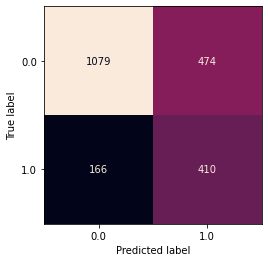

In [1426]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator=mlp_clf, X = test_pca, y_true = y_test, cmap = 'rocket', colorbar=False)
plt.savefig('test_confusion_mtrx.jpeg', dpi = 500, pad_inches = 0.5)
plt.show()

## Grid Search

In [256]:
param_grid = {'hidden_layer_sizes': [(52,52,52), (75,75,75), (77,77,77), (50,75,50), (100,100,100)],
              'batch_size': [50, 100, 200, 400, 600, 800, 1000, 1200, 1500, 1400, 2100],
              'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]}

mlp_clf = MLPClassifier(max_iter = 1000, random_state=101)
mlp_clf_gs = GridSearchCV(estimator = mlp_clf, param_grid=param_grid, 
                              cv = 5, verbose = 10, scoring = 'accuracy')

mlp_clf_gs.fit(X_important_train, y_train_shuffle)

train_pred = mlp_clf_gs.predict(X_important_train)
val_pred = mlp_clf_gs.predict(X_important_val)
test_pred = mlp_clf_gs.predict(X_important_test)

train_prob = mlp_clf_gs.predict_proba(X_important_train)
val_prob = mlp_clf_gs.predict_proba(X_important_val)
test_prob = mlp_clf_gs.predict_proba(X_important_test)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
[CV 1/5; 1/220] START batch_size=50, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001
[CV 1/5; 1/220] END batch_size=50, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001;, score=0.734 total time= 1.6min
[CV 2/5; 1/220] START batch_size=50, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001
[CV 2/5; 1/220] END batch_size=50, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001;, score=0.745 total time= 1.4min
[CV 3/5; 1/220] START batch_size=50, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001
[CV 3/5; 1/220] END batch_size=50, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001;, score=0.731 total time= 1.2min
[CV 4/5; 1/220] START batch_size=50, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001
[CV 4/5; 1/220] END batch_size=50, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001;, score=0.726 total time= 1.3min
[CV 5/5; 1/220] START batch_size=50, hidden_

[CV 3/5; 8/220] END batch_size=50, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1;, score=0.500 total time=   3.9s
[CV 4/5; 8/220] START batch_size=50, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1
[CV 4/5; 8/220] END batch_size=50, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1;, score=0.500 total time=   3.8s
[CV 5/5; 8/220] START batch_size=50, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1
[CV 5/5; 8/220] END batch_size=50, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1;, score=0.500 total time=   3.8s
[CV 1/5; 9/220] START batch_size=50, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.0001
[CV 1/5; 9/220] END batch_size=50, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.0001;, score=0.741 total time= 1.4min
[CV 2/5; 9/220] START batch_size=50, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.0001
[CV 2/5; 9/220] END batch_size=50, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.0001;, score=0.730 total time= 1.8

[CV 5/5; 15/220] END batch_size=50, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01;, score=0.723 total time=  12.5s
[CV 1/5; 16/220] START batch_size=50, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.1
[CV 1/5; 16/220] END batch_size=50, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.1;, score=0.684 total time=   3.3s
[CV 2/5; 16/220] START batch_size=50, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.1
[CV 2/5; 16/220] END batch_size=50, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.1;, score=0.500 total time=   3.3s
[CV 3/5; 16/220] START batch_size=50, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.1
[CV 3/5; 16/220] END batch_size=50, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.1;, score=0.544 total time=   3.2s
[CV 4/5; 16/220] START batch_size=50, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.1
[CV 4/5; 16/220] END batch_size=50, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.1;, score=0.662 total time=   6.9

[CV 2/5; 23/220] END batch_size=100, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.735 total time=   9.4s
[CV 3/5; 23/220] START batch_size=100, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 3/5; 23/220] END batch_size=100, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.730 total time=  13.5s
[CV 4/5; 23/220] START batch_size=100, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 4/5; 23/220] END batch_size=100, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.707 total time=   7.0s
[CV 5/5; 23/220] START batch_size=100, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 5/5; 23/220] END batch_size=100, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.741 total time=  20.0s
[CV 1/5; 24/220] START batch_size=100, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 1/5; 24/220] END batch_size=100, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.689 to

[CV 4/5; 30/220] END batch_size=100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001;, score=0.747 total time=  41.2s
[CV 5/5; 30/220] START batch_size=100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001
[CV 5/5; 30/220] END batch_size=100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001;, score=0.742 total time=  21.3s
[CV 1/5; 31/220] START batch_size=100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01
[CV 1/5; 31/220] END batch_size=100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01;, score=0.727 total time=  12.3s
[CV 2/5; 31/220] START batch_size=100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01
[CV 2/5; 31/220] END batch_size=100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01;, score=0.725 total time=  11.1s
[CV 3/5; 31/220] START batch_size=100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01
[CV 3/5; 31/220] END batch_size=100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01;, score=0.7

[CV 1/5; 38/220] END batch_size=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001;, score=0.750 total time= 1.2min
[CV 2/5; 38/220] START batch_size=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001
[CV 2/5; 38/220] END batch_size=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001;, score=0.760 total time=  53.9s
[CV 3/5; 38/220] START batch_size=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001
[CV 3/5; 38/220] END batch_size=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001;, score=0.737 total time=  29.8s
[CV 4/5; 38/220] START batch_size=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001
[CV 4/5; 38/220] END batch_size=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001;, score=0.743 total time=  59.0s
[CV 5/5; 38/220] START batch_size=100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001
[CV 5/5; 38/220] END batch_size=100, hidden_layer_sizes=(100, 100, 100), lea

[CV 3/5; 45/220] END batch_size=200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001;, score=0.726 total time=  36.9s
[CV 4/5; 45/220] START batch_size=200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001
[CV 4/5; 45/220] END batch_size=200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001;, score=0.725 total time=  43.1s
[CV 5/5; 45/220] START batch_size=200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001
[CV 5/5; 45/220] END batch_size=200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001;, score=0.738 total time=  55.4s
[CV 1/5; 46/220] START batch_size=200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001
[CV 1/5; 46/220] END batch_size=200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001;, score=0.742 total time=  15.9s
[CV 2/5; 46/220] START batch_size=200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001
[CV 2/5; 46/220] END batch_size=200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001;

[CV 5/5; 52/220] END batch_size=200, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1;, score=0.606 total time=   3.7s
[CV 1/5; 53/220] START batch_size=200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001
[CV 1/5; 53/220] END batch_size=200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001;, score=0.736 total time= 1.0min
[CV 2/5; 53/220] START batch_size=200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001
[CV 2/5; 53/220] END batch_size=200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001;, score=0.745 total time=  41.6s
[CV 3/5; 53/220] START batch_size=200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001
[CV 3/5; 53/220] END batch_size=200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001;, score=0.737 total time=  53.3s
[CV 4/5; 53/220] START batch_size=200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001
[CV 4/5; 53/220] END batch_size=200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001

[CV 2/5; 60/220] END batch_size=200, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1;, score=0.680 total time=   2.8s
[CV 3/5; 60/220] START batch_size=200, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1
[CV 3/5; 60/220] END batch_size=200, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1;, score=0.696 total time=   4.1s
[CV 4/5; 60/220] START batch_size=200, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1
[CV 4/5; 60/220] END batch_size=200, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1;, score=0.694 total time=   2.3s
[CV 5/5; 60/220] START batch_size=200, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1
[CV 5/5; 60/220] END batch_size=200, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1;, score=0.678 total time=   3.2s
[CV 1/5; 61/220] START batch_size=400, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001
[CV 1/5; 61/220] END batch_size=400, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0

[CV 4/5; 67/220] END batch_size=400, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.01;, score=0.721 total time=   6.2s
[CV 5/5; 67/220] START batch_size=400, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.01
[CV 5/5; 67/220] END batch_size=400, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.01;, score=0.726 total time=   7.2s
[CV 1/5; 68/220] START batch_size=400, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1
[CV 1/5; 68/220] END batch_size=400, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1;, score=0.706 total time=   4.6s
[CV 2/5; 68/220] START batch_size=400, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1
[CV 2/5; 68/220] END batch_size=400, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1;, score=0.671 total time=   3.9s
[CV 3/5; 68/220] START batch_size=400, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1
[CV 3/5; 68/220] END batch_size=400, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1;, score=0.643 total 

[CV 1/5; 75/220] END batch_size=400, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01;, score=0.714 total time=   4.0s
[CV 2/5; 75/220] START batch_size=400, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01
[CV 2/5; 75/220] END batch_size=400, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01;, score=0.732 total time=   3.9s
[CV 3/5; 75/220] START batch_size=400, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01
[CV 3/5; 75/220] END batch_size=400, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01;, score=0.724 total time=   6.9s
[CV 4/5; 75/220] START batch_size=400, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01
[CV 4/5; 75/220] END batch_size=400, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01;, score=0.716 total time=   5.4s
[CV 5/5; 75/220] START batch_size=400, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01
[CV 5/5; 75/220] END batch_size=400, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01;, score=0.722 

[CV 3/5; 82/220] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001;, score=0.734 total time=   9.1s
[CV 4/5; 82/220] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001
[CV 4/5; 82/220] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001;, score=0.719 total time=   5.5s
[CV 5/5; 82/220] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001
[CV 5/5; 82/220] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001;, score=0.730 total time=  13.5s
[CV 1/5; 83/220] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 1/5; 83/220] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.733 total time=   4.8s
[CV 2/5; 83/220] START batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 2/5; 83/220] END batch_size=600, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0

[CV 5/5; 89/220] END batch_size=600, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.0001;, score=0.734 total time=  51.8s
[CV 1/5; 90/220] START batch_size=600, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001
[CV 1/5; 90/220] END batch_size=600, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001;, score=0.738 total time=  10.9s
[CV 2/5; 90/220] START batch_size=600, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001
[CV 2/5; 90/220] END batch_size=600, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001;, score=0.757 total time=  16.9s
[CV 3/5; 90/220] START batch_size=600, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001
[CV 3/5; 90/220] END batch_size=600, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001;, score=0.717 total time=  12.4s
[CV 4/5; 90/220] START batch_size=600, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001
[CV 4/5; 90/220] END batch_size=600, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001;, sc

[CV 2/5; 97/220] END batch_size=600, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001;, score=0.741 total time=  52.0s
[CV 3/5; 97/220] START batch_size=600, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001
[CV 3/5; 97/220] END batch_size=600, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001;, score=0.730 total time=  31.9s
[CV 4/5; 97/220] START batch_size=600, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001
[CV 4/5; 97/220] END batch_size=600, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001;, score=0.725 total time= 1.0min
[CV 5/5; 97/220] START batch_size=600, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001
[CV 5/5; 97/220] END batch_size=600, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001;, score=0.732 total time=  41.9s
[CV 1/5; 98/220] START batch_size=600, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001
[CV 1/5; 98/220] END batch_size=600, hidden_layer_sizes=(100, 100, 10

[CV 3/5; 104/220] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.698 total time=   2.9s
[CV 4/5; 104/220] START batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 4/5; 104/220] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.715 total time=   1.8s
[CV 5/5; 104/220] START batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 5/5; 104/220] END batch_size=800, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.716 total time=   2.8s
[CV 1/5; 105/220] START batch_size=800, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001
[CV 1/5; 105/220] END batch_size=800, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001;, score=0.733 total time=  38.4s
[CV 2/5; 105/220] START batch_size=800, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001
[CV 2/5; 105/220] END batch_size=800, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001;, 

[CV 5/5; 111/220] END batch_size=800, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01;, score=0.712 total time=   2.6s
[CV 1/5; 112/220] START batch_size=800, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1
[CV 1/5; 112/220] END batch_size=800, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1;, score=0.713 total time=   4.0s
[CV 2/5; 112/220] START batch_size=800, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1
[CV 2/5; 112/220] END batch_size=800, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1;, score=0.721 total time=   3.6s
[CV 3/5; 112/220] START batch_size=800, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1
[CV 3/5; 112/220] END batch_size=800, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1;, score=0.654 total time=   2.2s
[CV 4/5; 112/220] START batch_size=800, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1
[CV 4/5; 112/220] END batch_size=800, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1;, score=0.701

[CV 1/5; 119/220] END batch_size=800, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01;, score=0.722 total time=   6.1s
[CV 2/5; 119/220] START batch_size=800, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01
[CV 2/5; 119/220] END batch_size=800, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01;, score=0.729 total time=   5.2s
[CV 3/5; 119/220] START batch_size=800, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01
[CV 3/5; 119/220] END batch_size=800, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01;, score=0.720 total time=   4.3s
[CV 4/5; 119/220] START batch_size=800, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01
[CV 4/5; 119/220] END batch_size=800, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01;, score=0.713 total time=   3.6s
[CV 5/5; 119/220] START batch_size=800, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01
[CV 5/5; 119/220] END batch_size=800, hidden_layer_sizes=(100, 100, 100), le

[CV 2/5; 126/220] END batch_size=1000, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001;, score=0.741 total time=   8.8s
[CV 3/5; 126/220] START batch_size=1000, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001
[CV 3/5; 126/220] END batch_size=1000, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001;, score=0.714 total time=   9.9s
[CV 4/5; 126/220] START batch_size=1000, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001
[CV 4/5; 126/220] END batch_size=1000, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001;, score=0.725 total time=  11.0s
[CV 5/5; 126/220] START batch_size=1000, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001
[CV 5/5; 126/220] END batch_size=1000, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001;, score=0.726 total time=  11.1s
[CV 1/5; 127/220] START batch_size=1000, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.01
[CV 1/5; 127/220] END batch_size=1000, hidden_layer_sizes=(75, 75, 75), learning_rate

[CV 3/5; 133/220] END batch_size=1000, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001;, score=0.724 total time=  43.7s
[CV 4/5; 133/220] START batch_size=1000, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001
[CV 4/5; 133/220] END batch_size=1000, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001;, score=0.726 total time= 1.0min
[CV 5/5; 133/220] START batch_size=1000, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001
[CV 5/5; 133/220] END batch_size=1000, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001;, score=0.733 total time=  48.2s
[CV 1/5; 134/220] START batch_size=1000, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.001
[CV 1/5; 134/220] END batch_size=1000, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.001;, score=0.736 total time=  15.9s
[CV 2/5; 134/220] START batch_size=1000, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.001
[CV 2/5; 134/220] END batch_size=1000, hidden_layer_sizes=(50, 75, 50), learnin

[CV 4/5; 140/220] END batch_size=1000, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1;, score=0.689 total time=   5.3s
[CV 5/5; 140/220] START batch_size=1000, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1
[CV 5/5; 140/220] END batch_size=1000, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1;, score=0.718 total time=   5.0s
[CV 1/5; 141/220] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001
[CV 1/5; 141/220] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001;, score=0.729 total time=  42.2s
[CV 2/5; 141/220] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001
[CV 2/5; 141/220] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001;, score=0.743 total time= 1.0min
[CV 3/5; 141/220] START batch_size=1200, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.0001
[CV 3/5; 141/220] END batch_size=1200, hidden_layer_sizes=(52, 52, 52), lear

[CV 5/5; 147/220] END batch_size=1200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.01;, score=0.719 total time=   4.8s
[CV 1/5; 148/220] START batch_size=1200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1
[CV 1/5; 148/220] END batch_size=1200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1;, score=0.701 total time=   2.8s
[CV 2/5; 148/220] START batch_size=1200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1
[CV 2/5; 148/220] END batch_size=1200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1;, score=0.697 total time=   2.0s
[CV 3/5; 148/220] START batch_size=1200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1
[CV 3/5; 148/220] END batch_size=1200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1;, score=0.705 total time=   2.0s
[CV 4/5; 148/220] START batch_size=1200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1
[CV 4/5; 148/220] END batch_size=1200, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.1;, sc

[CV 1/5; 155/220] END batch_size=1200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01;, score=0.727 total time=   4.9s
[CV 2/5; 155/220] START batch_size=1200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01
[CV 2/5; 155/220] END batch_size=1200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01;, score=0.733 total time=   4.9s
[CV 3/5; 155/220] START batch_size=1200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01
[CV 3/5; 155/220] END batch_size=1200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01;, score=0.714 total time=   4.5s
[CV 4/5; 155/220] START batch_size=1200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01
[CV 4/5; 155/220] END batch_size=1200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01;, score=0.720 total time=   3.6s
[CV 5/5; 155/220] START batch_size=1200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.01
[CV 5/5; 155/220] END batch_size=1200, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0

[CV 2/5; 162/220] END batch_size=1500, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001;, score=0.738 total time=  14.8s
[CV 3/5; 162/220] START batch_size=1500, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001
[CV 3/5; 162/220] END batch_size=1500, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001;, score=0.736 total time=  15.5s
[CV 4/5; 162/220] START batch_size=1500, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001
[CV 4/5; 162/220] END batch_size=1500, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001;, score=0.724 total time=  11.3s
[CV 5/5; 162/220] START batch_size=1500, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001
[CV 5/5; 162/220] END batch_size=1500, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.001;, score=0.722 total time=  11.1s
[CV 1/5; 163/220] START batch_size=1500, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01
[CV 1/5; 163/220] END batch_size=1500, hidden_layer_sizes=(52, 52, 52), learning_rate

[CV 3/5; 169/220] END batch_size=1500, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.0001;, score=0.732 total time=  45.3s
[CV 4/5; 169/220] START batch_size=1500, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.0001
[CV 4/5; 169/220] END batch_size=1500, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.0001;, score=0.727 total time=  47.8s
[CV 5/5; 169/220] START batch_size=1500, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.0001
[CV 5/5; 169/220] END batch_size=1500, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.0001;, score=0.734 total time=  53.0s
[CV 1/5; 170/220] START batch_size=1500, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001
[CV 1/5; 170/220] END batch_size=1500, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001;, score=0.730 total time=  12.3s
[CV 2/5; 170/220] START batch_size=1500, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.001
[CV 2/5; 170/220] END batch_size=1500, hidden_layer_sizes=(77, 77, 77), learnin

[CV 4/5; 176/220] END batch_size=1500, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.1;, score=0.716 total time=   3.9s
[CV 5/5; 176/220] START batch_size=1500, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.1
[CV 5/5; 176/220] END batch_size=1500, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.1;, score=0.665 total time=   2.1s
[CV 1/5; 177/220] START batch_size=1500, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001
[CV 1/5; 177/220] END batch_size=1500, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001;, score=0.735 total time= 1.2min
[CV 2/5; 177/220] START batch_size=1500, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001
[CV 2/5; 177/220] END batch_size=1500, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001;, score=0.736 total time= 1.2min
[CV 3/5; 177/220] START batch_size=1500, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001
[CV 3/5; 177/220] END batch_size=1500, hidden_layer_sizes=(100, 100, 1

[CV 5/5; 183/220] END batch_size=1400, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.01;, score=0.730 total time=   3.4s
[CV 1/5; 184/220] START batch_size=1400, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 1/5; 184/220] END batch_size=1400, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.721 total time=   2.7s
[CV 2/5; 184/220] START batch_size=1400, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 2/5; 184/220] END batch_size=1400, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.728 total time=   2.6s
[CV 3/5; 184/220] START batch_size=1400, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 3/5; 184/220] END batch_size=1400, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, score=0.705 total time=   1.4s
[CV 4/5; 184/220] START batch_size=1400, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1
[CV 4/5; 184/220] END batch_size=1400, hidden_layer_sizes=(52, 52, 52), learning_rate_init=0.1;, sc

[CV 1/5; 191/220] END batch_size=1400, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01;, score=0.724 total time=   3.3s
[CV 2/5; 191/220] START batch_size=1400, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01
[CV 2/5; 191/220] END batch_size=1400, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01;, score=0.731 total time=   3.8s
[CV 3/5; 191/220] START batch_size=1400, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01
[CV 3/5; 191/220] END batch_size=1400, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01;, score=0.719 total time=   3.8s
[CV 4/5; 191/220] START batch_size=1400, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01
[CV 4/5; 191/220] END batch_size=1400, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01;, score=0.715 total time=   5.0s
[CV 5/5; 191/220] START batch_size=1400, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.01
[CV 5/5; 191/220] END batch_size=1400, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0

[CV 2/5; 198/220] END batch_size=1400, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001;, score=0.739 total time=  17.5s
[CV 3/5; 198/220] START batch_size=1400, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001
[CV 3/5; 198/220] END batch_size=1400, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001;, score=0.734 total time=  14.5s
[CV 4/5; 198/220] START batch_size=1400, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001
[CV 4/5; 198/220] END batch_size=1400, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001;, score=0.726 total time=  15.3s
[CV 5/5; 198/220] START batch_size=1400, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001
[CV 5/5; 198/220] END batch_size=1400, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001;, score=0.743 total time=  28.6s
[CV 1/5; 199/220] START batch_size=1400, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01
[CV 1/5; 199/220] END batch_size=1400, hidden_layer_sizes=(10

[CV 3/5; 205/220] END batch_size=2100, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001;, score=0.723 total time=  53.4s
[CV 4/5; 205/220] START batch_size=2100, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001
[CV 4/5; 205/220] END batch_size=2100, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001;, score=0.719 total time=  58.1s
[CV 5/5; 205/220] START batch_size=2100, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001
[CV 5/5; 205/220] END batch_size=2100, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.0001;, score=0.716 total time=  27.3s
[CV 1/5; 206/220] START batch_size=2100, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001
[CV 1/5; 206/220] END batch_size=2100, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001;, score=0.730 total time=  13.3s
[CV 2/5; 206/220] START batch_size=2100, hidden_layer_sizes=(75, 75, 75), learning_rate_init=0.001
[CV 2/5; 206/220] END batch_size=2100, hidden_layer_sizes=(75, 75, 75), learnin

[CV 4/5; 212/220] END batch_size=2100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1;, score=0.706 total time=   2.0s
[CV 5/5; 212/220] START batch_size=2100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1
[CV 5/5; 212/220] END batch_size=2100, hidden_layer_sizes=(77, 77, 77), learning_rate_init=0.1;, score=0.658 total time=   2.4s
[CV 1/5; 213/220] START batch_size=2100, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001
[CV 1/5; 213/220] END batch_size=2100, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001;, score=0.712 total time=  11.5s
[CV 2/5; 213/220] START batch_size=2100, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001
[CV 2/5; 213/220] END batch_size=2100, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001;, score=0.715 total time=   5.8s
[CV 3/5; 213/220] START batch_size=2100, hidden_layer_sizes=(50, 75, 50), learning_rate_init=0.0001
[CV 3/5; 213/220] END batch_size=2100, hidden_layer_sizes=(50, 75, 50), learning_rate

[CV 5/5; 219/220] END batch_size=2100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01;, score=0.724 total time=   6.3s
[CV 1/5; 220/220] START batch_size=2100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1
[CV 1/5; 220/220] END batch_size=2100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1;, score=0.714 total time=   4.3s
[CV 2/5; 220/220] START batch_size=2100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1
[CV 2/5; 220/220] END batch_size=2100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1;, score=0.724 total time=   4.9s
[CV 3/5; 220/220] START batch_size=2100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1
[CV 3/5; 220/220] END batch_size=2100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1;, score=0.689 total time=   2.3s
[CV 4/5; 220/220] START batch_size=2100, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1
[CV 4/5; 220/220] END batch_size=2100, hidden_layer_sizes=(100, 100, 100), 

In [257]:
# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

# Get Initial Logistic Regression Model Parameters
print(mlp_clf_gs.best_params_)

# Get AUC Score
auc_mlp_grid_search = roc_auc_score(y_test, test_prob[:,1])
fpr_mlp_grid_search, tpr_mlp_grid_search, threshold_mlp_grid_search = roc_curve(y_test,test_prob[:,1], pos_label=1)

######################################################################################
#{'batch_size': 200, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate_init': 0.001}
######################################################################################
#Train Accuracy: 0.7475855674882176
#Train AUC: 0.8238575961190451

#Validation Accuracy: 0.7103340292275574
#Validation AUC: 0.747785743798046

#Test Accuracy: 0.7144199154532644
#Test AUC: 0.7441265114116048
######################################################################################


Train Accuracy: 0.7650853743336167
Train AUC: 0.8418087964470704

Validation Accuracy: 0.7202505219206681
Validation AUC: 0.7412404490197335

Test Accuracy: 0.7256928135274777
Test AUC: 0.7367024844387208

{'batch_size': 50, 'hidden_layer_sizes': (77, 77, 77), 'learning_rate_init': 0.001}


In [1373]:
# Fit best model from grid search
mlp_clf = MLPClassifier(max_iter = 1000, random_state=101, learning_rate_init=0.001, hidden_layer_sizes = (77,77,77),
                       batch_size=50)

mlp_clf.fit(X_important_train, y_train_shuffle)

train_pred = mlp_clf.predict(X_important_train)
val_pred = mlp_clf.predict(X_important_val)
test_pred = mlp_clf.predict(X_important_test)

train_prob = mlp_clf.predict_proba(X_important_train)
val_prob = mlp_clf.predict_proba(X_important_val)
test_prob = mlp_clf.predict_proba(X_important_test)

# Train Accuracy and AUC
print("Train Accuracy:", accuracy_score(y_train_shuffle,train_pred))
print("Train AUC:", roc_auc_score(y_train_shuffle, train_prob[:,1]))
print()

# Validation Accuracy and AUC
print("Validation Accuracy:", accuracy_score(y_val,val_pred))
print("Validation AUC:", roc_auc_score(y_val, val_prob[:,1]))
print()

# Test Accuracy and AUC
print("Test Accuracy:", accuracy_score(y_test,test_pred))
print("Test AUC:", roc_auc_score(y_test, test_prob[:,1]))
print()

print(mlp_clf.get_params())

# Get AUC Score
auc_mlp_gridsearch_best = roc_auc_score(y_test, test_prob[:,1])
fpr_mlp_gridsearch_best, tpr_mlp_gridsearch_best, threshold_mlp_gridsearch_best = roc_curve(y_test,test_prob[:,1], pos_label=1)

mlp_grid_search_recall = recall_score(y_test, test_pred)

Train Accuracy: 0.7650853743336167
Train AUC: 0.8418087964470704

Validation Accuracy: 0.7202505219206681
Validation AUC: 0.7412404490197335

Test Accuracy: 0.7256928135274777
Test AUC: 0.7367024844387208

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 50, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (77, 77, 77), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 101, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


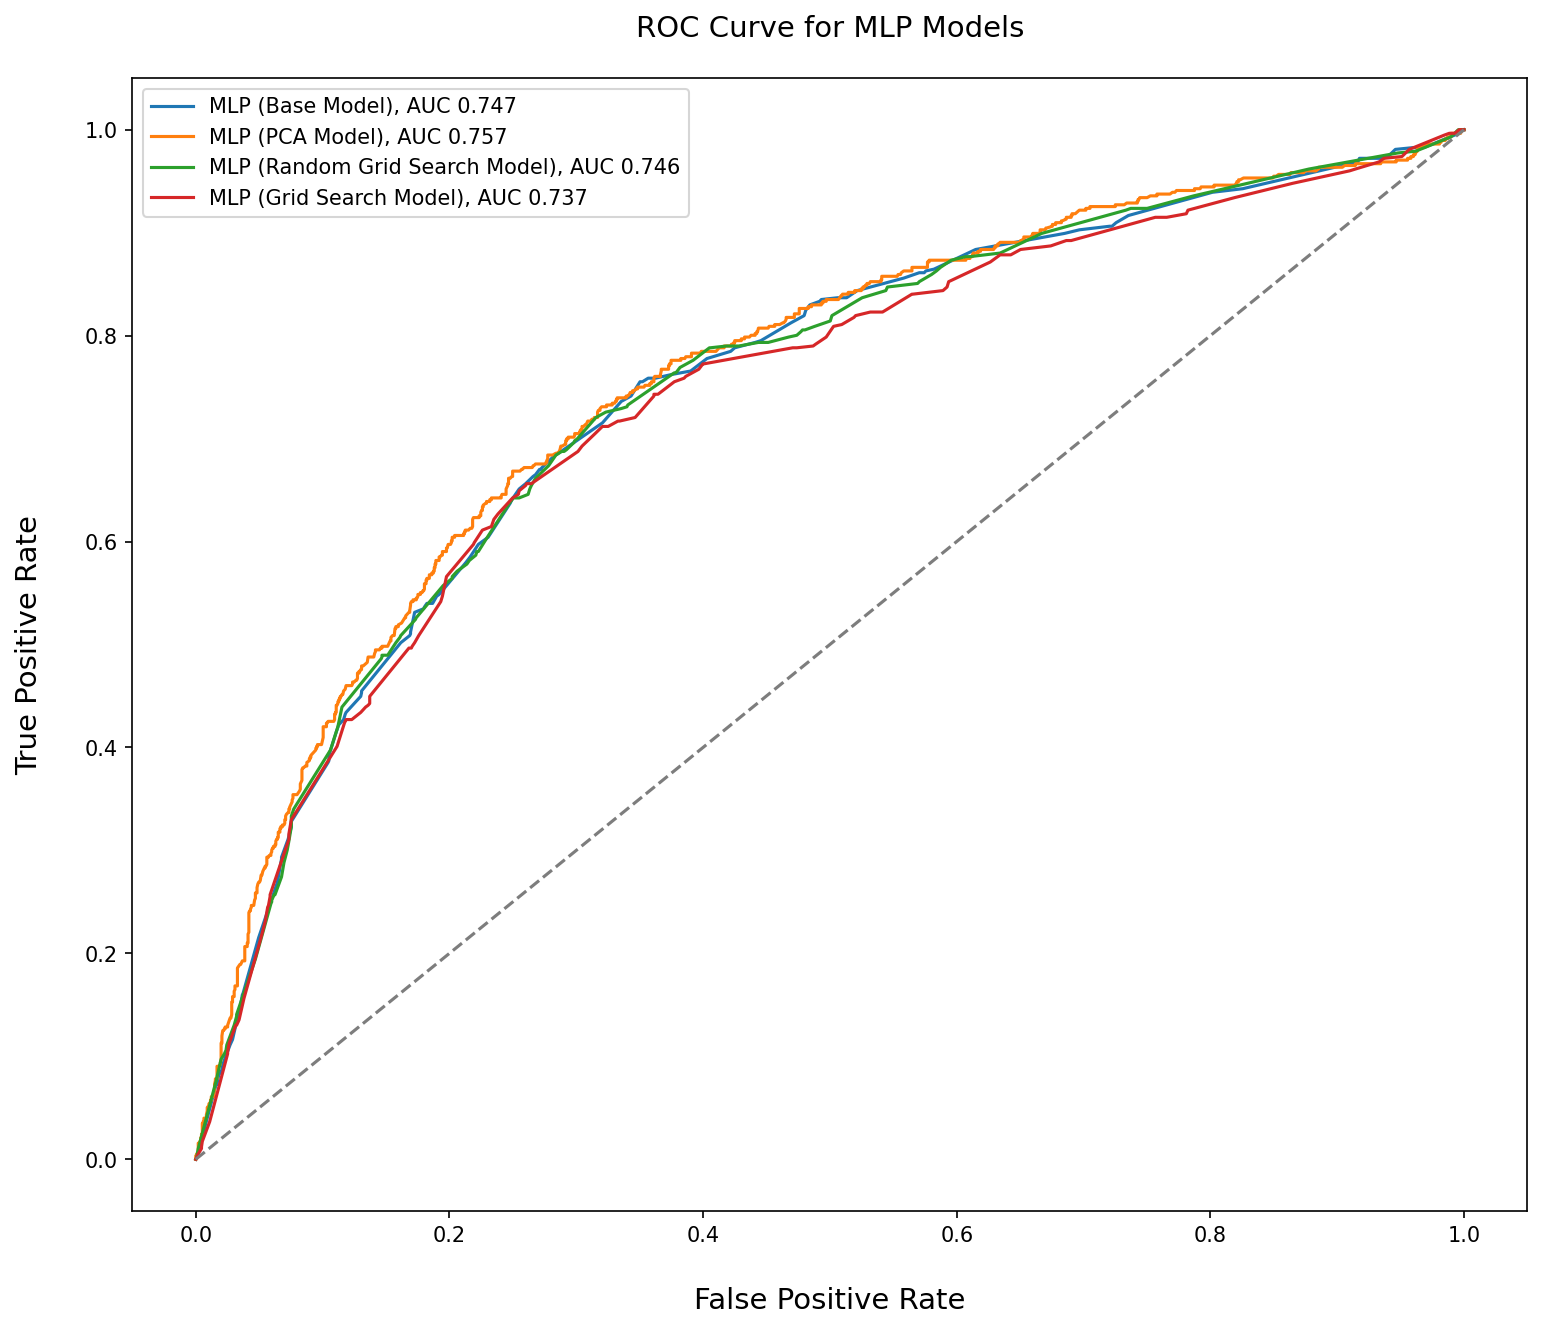

In [1410]:
# Generate ROC curve for mlp fits
plt.subplots(1, figsize=(12,10), dpi = 150)
plt.title('ROC Curve for MLP Models', size = 14, pad = 20)

plt.plot(fpr_mlp, tpr_mlp, label = 'MLP (Base Model), AUC {}'.format(round(auc_mlp,3)))
plt.plot(fpr_mlp_pca, tpr_mlp_pca, label = 'MLP (PCA Model), AUC {}'.format(round(auc_mlp_pca,3)))
plt.plot(fpr_mlp_rgrid_best, tpr_mlp_rgrid_best, label = 'MLP (Random Grid Search Model), AUC {}'.format(round(auc_mlp_rgrid_best,3)))
plt.plot(fpr_mlp_gridsearch_best, tpr_mlp_gridsearch_best, label = 'MLP (Grid Search Model), AUC {}'.format(round(auc_mlp_gridsearch_best,3)))

plt.legend()
plt.plot([0, 1], ls="--", color = '#7D7D7D')
plt.ylabel('True Positive Rate', size = 14, labelpad = 20)
plt.xlabel('False Positive Rate', size = 14, labelpad = 20)

plt.savefig('auc_curve_mlp_models.jpeg', dpi = 500, pad_inches = 0.25)
plt.show()

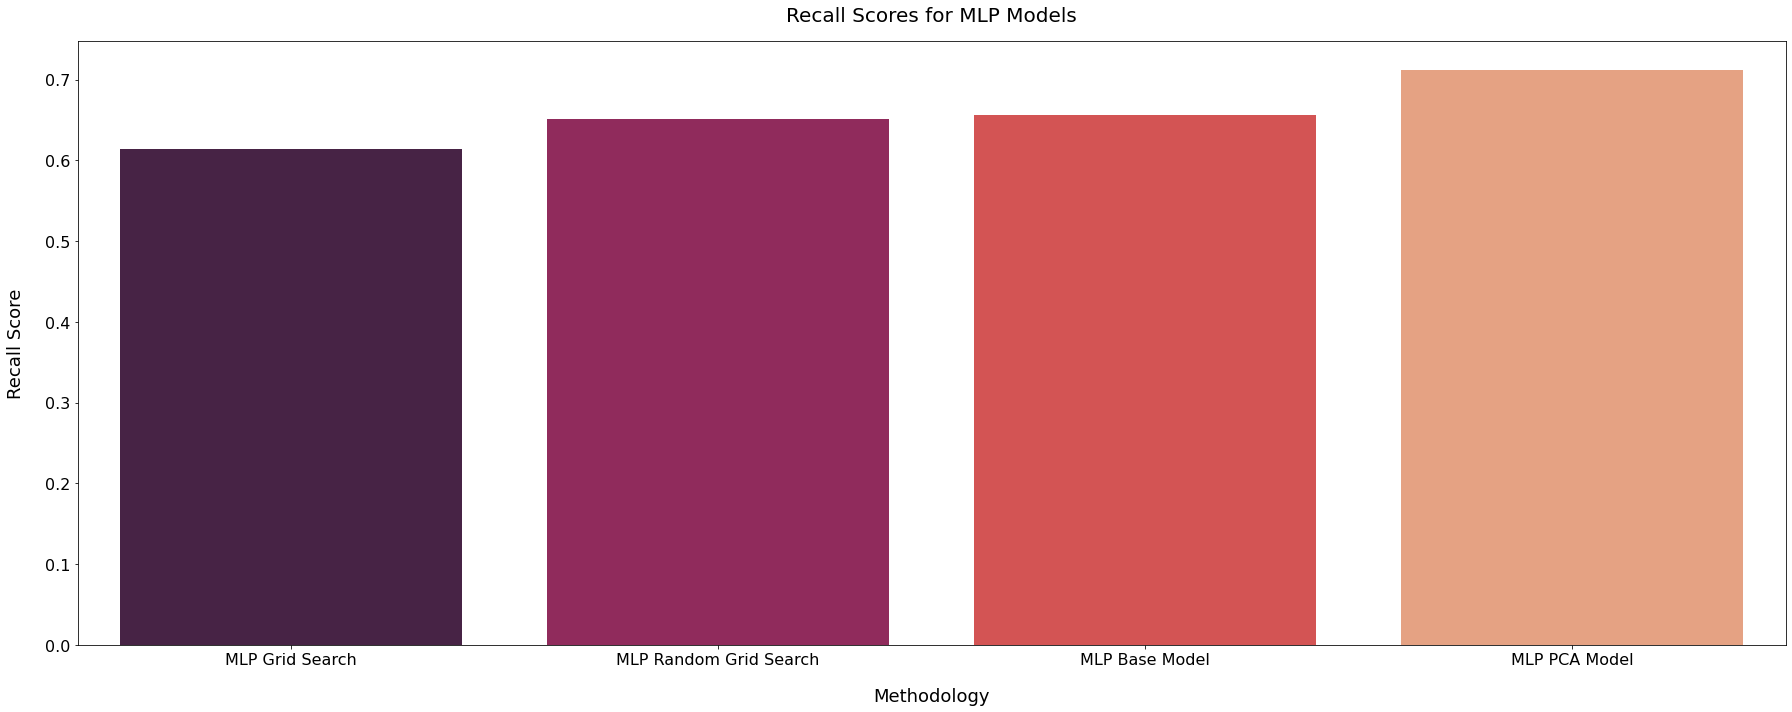

In [1378]:
from sklearn.metrics import recall_score

# Create bar plot to compare the recall scores of all of the MLP models

methods = ['MLP Base Model', 'MLP Random Grid Search', 'MLP PCA Model', 'MLP Grid Search']
all_recall_scores_mlp_models = [mlp_base_recall, mlp_rgrid_recall, 
                                 mlp_pca_recall, mlp_grid_search_recall]

all_recall_scores_mlp_models = pd.DataFrame([methods, all_recall_scores_mlp_models]).transpose()
all_recall_scores_mlp_models.columns = ['Methodology', 'Recall']

all_recall_scores_mlp_models.sort_values(by = 'Recall', inplace = True)

plt.figure(figsize = (25,10))

sns.barplot(x = 'Methodology', y = 'Recall', data = all_recall_scores_mlp_models, palette='rocket')


plt.title("Recall Scores for MLP Models", pad=20, size = 20)
plt.xlabel('Methodology', size = 18, labelpad = 20)
plt.ylabel('Recall Score', size = 18, labelpad = 20)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.tight_layout()
plt.savefig('recall_scores_mlp_models.jpeg', dpi = 500, pad_inches = 0.5)
plt.show()

In [1376]:
# Recall scores on all of the MLP models
all_recall_scores_mlp_models

Methodology    Recall
3         MLP Grid Search  0.614583
1  MLP Random Grid Search  0.651042
0          MLP Base Model   0.65625
2           MLP PCA Model  0.711806

In [1408]:
auc_mlp_scores = [auc_mlp, auc_mlp_rgrid_best, auc_mlp_gridsearch_best, auc_mlp_pca]
recall_mlp_scores = [mlp_base_recall, mlp_rgrid_recall, mlp_grid_search_recall, mlp_pca_recall]
methods = ['MLP Base Model', 'MLP Random Grid Search', 'MLP Grid Search', 'MLP PCA Model']
mlp_metrics = pd.DataFrame([methods,auc_mlp_scores,recall_mlp_scores]).transpose()
mlp_metrics.columns = ['Methodology', 'AUC', 'Recall']

In [1409]:
# MLP comparison with AUC and Recall between model with NO parameter tuning, random grid search, grid search, and PCA
mlp_metrics

Methodology       AUC    Recall
0          MLP Base Model  0.746627   0.65625
1  MLP Random Grid Search  0.746485  0.651042
2         MLP Grid Search  0.736702  0.614583
3           MLP PCA Model  0.757313  0.711806